# 06_OverviewFig_Buoys

Overview figures

### Import packages

In [2]:
%load_ext autoreload
%autoreload 2

from common_imports import *

sys.path.append('./scripts/')
from LIB_iceage_NSIDC0611 import grab_iceage

sys.path.append('../Libraries_functions/')
from LIB_ASI_SIC_UniB import grab_ASI_SIC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Find mean March-April SIC data

In [ ]:
#==================================
TI = datetime(2021, 3, 1)
TF = datetime(2021, 4, 30)
#==================================
all_sic_dates = [TI + timedelta(days=day) for day in range((TF-TI).days+1)]
print(f'find mean across all dates {all_sic_dates[0].date()} --> {all_sic_dates[-1].date()}')

#==================================
# crop to region of interest
# ai = 1700 
# af = -950
# bi = 350
# bf = -3600

ai = 0 
af = -1
bi = 0
bf = -1
# spacing between points of imported data 
sp = 1
#==================================

for dd, date in enumerate(all_sic_dates):

    # save cumulatively to all_sic array
    if dd == 0:
        
        # grab data
        out = grab_SIC_MODISAMSR(date=date, 
                                 file_datapath='/Volumes/Seagate_Jewell/KenzieStuff/UniB-ASI-modis-amsr2-SIC/', 
                                 file_name=f'{date.year}/'+'sic_modis-aqua_amsr2-gcom-w1_merged_nh_1000m_{}.nc', 
                                 geo_file='coordinates_npstere_1km_arctic.nc', 
                                 return_vars=['lon', 'lat', 'sic_merged'])
        lon, lat, sic_merge = out[0], out[1], out[2]
        
#         out = grab_ASI_SIC(date=date, 
#                                  main_path='/Volumes/Jewell_EasyStore/UniB-ASI-SIC-n6250/', 
#                                  return_vars=['lon', 'lat', 'sic'], 
#                                  include_units=False, annual_folders=True, return_dict=False, quiet=True)
#         lon, lat, sic_merge = out[0], out[1], out[2]
        
        
        # crop
        lon_sic = lon#[ai:af, bi:bf][::sp, ::sp]
        lat_sic = lat#[ai:af, bi:bf][::sp, ::sp]
        SIC = sic_merge#[ai:af, bi:bf][::sp, ::sp]

        # save
        all_sic = SIC.astype(np.int32)
        num_open = (SIC < 80).astype(np.int32)
        
    else:
         # grab data
        sic_merge = grab_SIC_MODISAMSR(date=date, 
                                         file_datapath='/Volumes/Seagate_Jewell/KenzieStuff/UniB-ASI-modis-amsr2-SIC/', 
                                         file_name=f'{date.year}/'+'sic_modis-aqua_amsr2-gcom-w1_merged_nh_1000m_{}.nc', 
                                         geo_file='coordinates_npstere_1km_arctic.nc', 
                                         return_vars=['sic_merged'])

#         sic_merge = grab_ASI_SIC(date=date, 
#                                  main_path='/Volumes/Jewell_EasyStore/UniB-ASI-SIC-n6250/', 
#                                  return_vars=['sic'], 
#                                  include_units=False, annual_folders=True, return_dict=False, quiet=True)
        
        # crop
        SIC = sic_merge#[ai:af, bi:bf][::sp, ::sp]
        
        # save
        all_sic += SIC.astype(np.int32)
        num_open += (SIC < 80).astype(np.int32)

# find mean across time
mean_sic_2021 = all_sic/len(all_sic_dates)
freq_open_2021 = num_open.astype(np.float32)/len(all_sic_dates)


In [ ]:

for year in [2018, 2019, 2020, 2021, 2022, 2023, 2024]:

    #==================================
    TI = datetime(year, 3, 1)
    TF = datetime(year, 4, 30)
    #==================================
    all_sic_dates = [TI + timedelta(days=day) for day in range((TF-TI).days+1)]
    print(f'find mean across all dates {all_sic_dates[0].date()} --> {all_sic_dates[-1].date()}')

    #==================================
    # crop to region of interest
    # ai = 1700 
    # af = -950
    # bi = 350
    # bf = -3600

    ai = 0 
    af = -1
    bi = 0
    bf = -1
    # spacing between points of imported data 
    sp = 1
    #==================================

    for dd, date in enumerate(all_sic_dates):

        # save cumulatively to all_sic array
        if dd == 0:

            # grab data
            out = grab_SIC_MODISAMSR(date=date, 
                                     file_datapath='/Volumes/Seagate_Jewell/KenzieStuff/UniB-ASI-modis-amsr2-SIC/', 
                                     file_name=f'{date.year}/'+'sic_modis-aqua_amsr2-gcom-w1_merged_nh_1000m_{}.nc', 
                                     geo_file='coordinates_npstere_1km_arctic.nc', 
                                     return_vars=['lon', 'lat', 'sic_merged'])
            lon, lat, sic_merge = out[0], out[1], out[2]

#             out = grab_ASI_SIC(date=date, 
#                                      main_path='/Volumes/Jewell_EasyStore/UniB-ASI-SIC-n6250/', 
#                                      return_vars=['lon', 'lat', 'sic'], 
#                                      include_units=False, annual_folders=True, return_dict=False, quiet=True)
#             lon, lat, sic_merge = out[0], out[1], out[2]


            # crop
            lon_sic = lon#[ai:af, bi:bf][::sp, ::sp]
            lat_sic = lat#[ai:af, bi:bf][::sp, ::sp]
            SIC = sic_merge#[ai:af, bi:bf][::sp, ::sp]

            # save
            all_sic = SIC.astype(np.int32)
            num_open = (SIC < 80).astype(np.int32)

        else:
            
            try:
                 # grab data
                sic_merge = grab_SIC_MODISAMSR(date=date, 
                                             file_datapath='/Volumes/Seagate_Jewell/KenzieStuff/UniB-ASI-modis-amsr2-SIC/', 
                                             file_name=f'{date.year}/'+'sic_modis-aqua_amsr2-gcom-w1_merged_nh_1000m_{}.nc', 
                                             geo_file='coordinates_npstere_1km_arctic.nc', 
                                             return_vars=['sic_merged'])
                
#                 sic_merge = grab_ASI_SIC(date=date, 
#                                          main_path='/Volumes/Jewell_EasyStore/UniB-ASI-SIC-n6250/', 
#                                          return_vars=['sic'], 
#                                          include_units=False, annual_folders=True, return_dict=False, quiet=True)

                # crop
                SIC = sic_merge#[ai:af, bi:bf][::sp, ::sp]

                # save
                all_sic += SIC.astype(np.int32)
                num_open += (SIC < 80).astype(np.int32)
                
            except:
                print(f'{date} missing file')

# find mean across time
mean_sic_all = all_sic/len(all_sic_dates)
freq_open_all = num_open.astype(np.float32)/len(all_sic_dates)


[None]

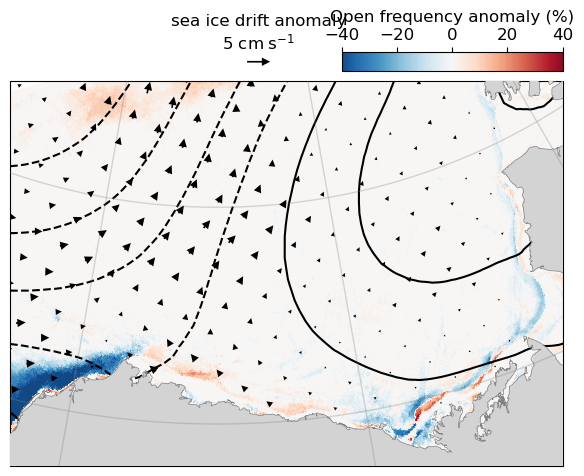

In [89]:
# create figure in NorthPolarStereo projection
#---------------------------------------------
map_projection = ccrs.NorthPolarStereo(central_longitude=210)
lat_range = [68.5, 77]
lon_range = [197, 232]
fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection), 
                       figsize=(8,5), facecolor='white')

# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.spines['geo'].set_edgecolor('k')
add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=17)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=16)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.3, zorder=18)

sp = 3

# ax.pcolormesh(lon[::sp,::sp], lat[::sp,::sp], mean_sic_2021[::sp,::sp], vmin=80, vmax = 100, cmap='Blues_r', transform=ccrs.PlateCarree())

# ax.pcolormesh(lon[::sp,::sp], lat[::sp,::sp], freq_open_2021[::sp,::sp], vmin=0, vmax = 0.25, cmap='magma', transform=ccrs.PlateCarree())


# ax.pcolormesh(lon[::sp,::sp], lat[::sp,::sp], (mean_sic_2021-mean_sic_all)[::sp,::sp], 
#               vmin=-20, vmax = 20, 
#               cmap='RdBu_r', transform=ccrs.PlateCarree())


# freq_anom = ax.pcolormesh(lon[::sp,::sp], lat[::sp,::sp], (freq_open_2021-freq_open_all)[::sp,::sp], 
#               vmin=-0.5, vmax = 0.5, 
#               cmap='RdBu_r', transform=ccrs.PlateCarree())


# freq_anom = ax.pcolormesh(lon[::sp,::sp], lat[::sp,::sp], (mean_sic_2021-mean_sic_all)[::sp,::sp], 
#               vmin=-20, vmax = 20, 
#               cmap='RdBu_r', transform=ccrs.PlateCarree())

# add_colorbar(fig, ax,[freq_anom], cb_ticks = [-20,0,20], cb_extend = 'neither', 
#                                cb_length_fraction = [0.6,1], cb_width = 'auto', cb_pad = 0.02, cb_placement = 'top', 
#                                cb_labelsize = 12, cb_label = r'SIC anomaly (%)',draw_edges=False)


# cmap = cmocean.tools.crop_by_percent(cmocean.cm.balance, 30, which='both', N=None)
import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = truncate_colormap(cm.RdBu_r, 0.05, 0.95)
freq_anom = ax.pcolormesh(lon[1500:3800, 100:1500][::sp,::sp], lat[1500:3800, 100:1500][::sp,::sp], 
                        100*(freq_open_2021-freq_open_all)[1500:3800, 100:1500][::sp,::sp], 
                        vmin=-40, vmax = 40, cmap=cmap, transform=ccrs.PlateCarree())

# freq_anom = ax.contourf(lon[1500:3800, 100:1500][::sp,::sp], lat[1500:3800, 100:1500][::sp,::sp], 
#                         100*(freq_open_2021-freq_open_all)[1500:3800, 100:1500][::sp,::sp], 
#                         levels = np.arange(-32.5,36,5), extend='both', vmin=-30, vmax = 30, cmap=cmap, transform=ccrs.PlateCarree())

add_colorbar(fig, ax,[freq_anom], cb_ticks = [-40,-20,0,20,40], cb_extend = 'neither', 
                               cb_length_fraction = [0.6,1], cb_width = 'auto', cb_pad = 0.02, cb_placement = 'top', 
                               cb_labelsize = 12, cb_label = r'Open frequency anomaly (%)',draw_edges=False)

#==========================================================================
# Data sources of climatological data
Clim_ERA5 = f'/Users/mackenziejewell/Desktop/polynya_clim/mean_ERA5_Mar-Apr_2018-2022.nc'
Clim_PPD  = f'/Users/mackenziejewell/Desktop/polynya_clim/mean_PPdrift_Mar-Apr_2018-2022.nc'

# Data sources of specific year data
ev_ERA5 = f'/Volumes/Jewell_EasyStore/SIDEx/OverviewData/mean_ERA5_Mar-Apr_2021.nc'
ev_PPD  = f'/Volumes/Jewell_EasyStore/SIDEx/OverviewData/mean_PPdrift_Mar-Apr_2021.nc'
#==========================================================================


#///////////////////////////
# atmospheric conditions //
#/////////////////////////////////////////////////////////////////////////////////////////////

# open ERA5 data
#---------------
ds_ERA5 = xr.open_dataset(Clim_ERA5)
ds_ERA5.close()
lon_wind, lat_wind = ds_ERA5.longitude.values, ds_ERA5.latitude.values
longrid_wind, latgrid_wind = np.meshgrid(lon_wind, lat_wind)
u10_clim = ds_ERA5.u10.values
v10_clim = ds_ERA5.v10.values
msl_clim = ds_ERA5.msl.values/100
wind_sp_clim = ds_ERA5.speed10.values


ds_ERA5 = xr.open_dataset(ev_ERA5)
ds_ERA5.close()
u10_event = ds_ERA5.u10.values
v10_event = ds_ERA5.v10.values
msl_event = ds_ERA5.msl.values/100
wind_sp_event = ds_ERA5.speed10.values

CS = ax.contour(longrid_wind, latgrid_wind, msl_event-msl_clim,
           levels = np.arange(-5,6,0.5), lw = 1, colors = 'black',
           zorder = 10, transform = ccrs.PlateCarree())

ax.clabel(CS, [-1,0,1], inline=True)# fontsize=10)


#//////////////////
# sea ice drift //
#/////////////////////////////////////////////////////////////////////////////////////////////
        
# open NSIDC-derived drift data
#------------------------------
ds_PPD = xr.open_dataset(Clim_PPD)
ds_PPD.close()
longrid_ice = ds_PPD.longitude.values
latgrid_ice = ds_PPD.latitude.values
u_ice_clim = ds_PPD.u.values
v_ice_clim = ds_PPD.v.values
ice_speed_of_mean = np.sqrt(u_ice_clim**2+v_ice_clim**2)
ice_mean_of_speed = ds_PPD.speed.values


ds_PPD = xr.open_dataset(ev_PPD)
ds_PPD.close()
u_ice_event = ds_PPD.u.values
v_ice_event = ds_PPD.v.values
speed_ice_event = ds_PPD.speed.values


# plot wind vectors
#-----------------------  
# windvec = ax.quiver(longrid_wind, latgrid_wind, 
#                    *fix_cartopy_vectors((u10_event-u10_clim), (v10_event-v10_clim), 
#                                         latgrid_wind), regrid_shape=10, 
#                    color='gray', width=0.003, headwidth=5, headlength=5, headaxislength=5,
#                    scale=60, zorder=100, transform=ccrs.PlateCarree())

# key = ax.quiverkey(windvec, X=0.45, Y=1.05, U=5, label = 'Wind anomaly\n5 $\mathrm{cm\;{s}^{-1}}$', 
#                    labelpos='N', fontproperties={'size':12}, transform=ccrs.PlateCarree())
# key.set(zorder = 100)


# plot ice drift vectors
#-----------------------  
sp = 3
icevec = ax.quiver(longrid_ice[::sp,::sp], latgrid_ice[::sp,::sp], 
                   *fix_cartopy_vectors((u_ice_event-u_ice_clim)[::sp,::sp], (v_ice_event-v_ice_clim)[::sp,::sp], 
                                        latgrid_ice[::sp,::sp]),
                   color='k', width=0.003, headwidth=5, headlength=5, headaxislength=5,
                   scale=120, zorder=100, transform=ccrs.PlateCarree())
key = ax.quiverkey(icevec, X=0.45, Y=1.05, U=5, label = 'sea ice drift anomaly\n5 $\mathrm{cm\;{s}^{-1}}$', 
                   labelpos='N', fontproperties={'size':12}, transform=ax.transAxes)
key.set(zorder = 100)




In [76]:
df2 = pd.read_csv('./data/SBS_drift_wind_Jan-May_across-years_v1.csv')
df_dates = pd.to_datetime(df2.date.values)

df2.div_ice

0     -0.000015
1     -0.000004
2     -0.000005
3     -0.000018
4     -0.000014
         ...   
751   -0.000002
752    0.000009
753   -0.000008
754   -0.000015
755    0.000026
Name: div_ice, Length: 756, dtype: float64

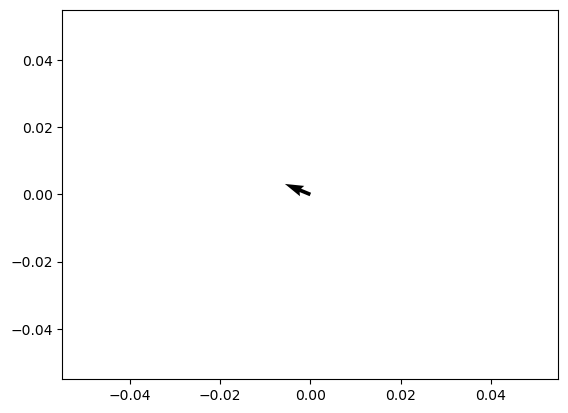

In [3]:


df = pd.read_csv('./data/SBS_drift_across_years_v6.csv')
df_drift_dates = pd.to_datetime(df.date.values)

from metpy.calc import wind_components
from metpy.units import units

(U, V) = wind_components(1. * units('cm/s'), (360-67.5 - 180) * units.deg)

u_comp = U.magnitude
v_comp = V.magnitude
plt.quiver(0,0, u_comp, v_comp)


Text(0, 0.5, 'Sea ice drift\n$\\mathrm{(cm\\;s^{-1})}$')

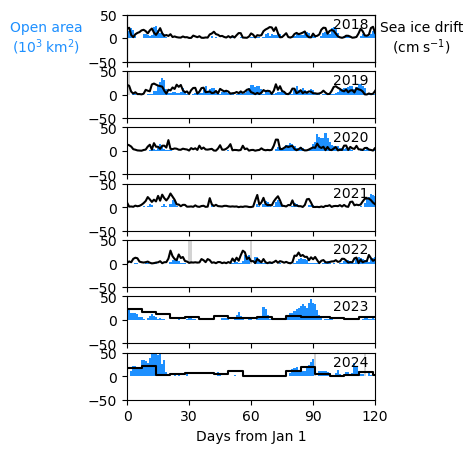

In [333]:
ds = xr.open_dataset('./data/SBS_open_area_v6.nc')
ds.close()

years = np.arange(2018,2025)

fig, axs = plt.subplots(len(years), 1, figsize=(3.2, 5))

for year, ax in zip(years, axs):

    dt = (pd.to_datetime(ds.time.sel(time = slice(datetime(year-1, 11, 1), datetime(year, 5, 31))).values) - datetime(year, 1, 1)).days.values
    open_extent = ds.N_oa_g20.sel(time = slice(datetime(year-1, 11, 1), datetime(year, 5, 31))).values

    ax.bar(dt, open_extent/1000, width = 1, color='dodgerblue')
#     ax.bar(dt[:-1], np.diff(open_extent)/500, width = 1, color='dodgerblue')
    
    ax.set_xlim(0, 120)
    ax.set_ylim(-50, 50)
    ax.set_xticks(np.arange(0,121,30))
    ax.set_xticklabels([])
    
    ax.text(0.975, 0.95, year, ha='right', va='top', transform=ax.transAxes)
    
    
    ax.bar(dt[np.isnan(open_extent)], np.full_like(dt[np.isnan(open_extent)], 50), width = 1, color='lightgray')

#     ax.plot(dt, open_extent/1000,  color='dodgerblue')


    if year < 2023:
        # grab ice drift data
        ii = np.where(df_drift_dates == datetime(year-1, 11, 1))[0][0]
        ff = np.where(df_drift_dates == datetime(year, 5, 31))[0][0]

        speed = np.sqrt(df.iloc[ii:ff+1].u.values**2+ df.iloc[ii:ff+1].v.values**2)
        comp_WNW = (df.iloc[ii:ff+1].u.values * u_comp + df.iloc[ii:ff+1].v.values * v_comp)
        
        ax.plot(dt, speed, c='k')
        
#         # grab ice divergence data from df2
#         dt2 = (pd.to_datetime(df_dates) - datetime(year, 1, 1)).days.values
#         div = df2.div_ice.values
#         ax.plot(dt2, 1000000*div, c='r')

        
    
    if year == 2023:
        # grab ice drift data
        ii = np.where(df_drift_dates == datetime(year-1, 11, 1))[0][0]
        ff = -2
        speed = np.sqrt(df.iloc[ii:ff+1].u.values**2+ df.iloc[ii:ff+1].v.values**2)
        comp_WNW = (df.iloc[ii:ff+1].u.values * u_comp + df.iloc[ii:ff+1].v.values * v_comp)
        ax.plot(dt[:np.where(dt==0)[0][0]-1], speed, c='k')
        
    
axs[-1].set_xticklabels(np.arange(0,121,30));

df3 = pd.read_csv('./data/SBS_drift_202324_v6.csv')

axs[-2].step(df3.dt.values, np.sqrt(df3.u.values**2+df3.v.values**2), where='post', c='k')

axs[-1].step(df3.dt.values[:np.where(df3.dt.values==365)[0][0]+1]-365, 
             np.sqrt(df3.u.values**2+df3.v.values**2)[:np.where(df3.dt.values==365)[0][0]+1], where='post', c='k')

axs[-1].step(df3.dt.values[np.where(df3.dt.values==365)[0][0]:]-365, 
             np.sqrt(df3.u.values**2+df3.v.values**2)[np.where(df3.dt.values==365)[0][0]:], where='post', c='k')

axs[-1].set_xlabel('Days from Jan 1')

axs[0].set_ylabel('Open area\n$\mathrm{(10^3\;km^2)}$', rotation = 0, labelpad=30, color='dodgerblue', va='center')
# axs[0].set_ylabel('Open area\n$\mathrm{(10^3\;km^2)}$', rotation = 0, labelpad=30, va='center')


ax2 = axs[0].twinx()
ax2.set_yticks([])
ax2.set_ylabel('Sea ice drift\n$\mathrm{(cm\;s^{-1})}$', rotation = 0, labelpad=30, va='center')


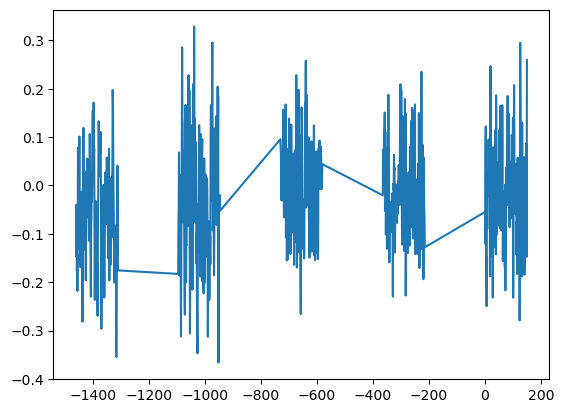

In [82]:
plt.plot(dt2, 10000*div)

In [80]:
dt2 = (pd.to_datetime(df_dates) - datetime(year, 1, 1)).days.values
div = df2.div_ice.values
ax.plot(dt2, div)

In [78]:
len(dt2)


756

In [79]:
len(div)

756

In [770]:
import matplotlib.patches as patches 


def box_plot(ax, var, x=2, width = 1, lw = 1, alpha=0.5, edge_alpha=1,  c='k', edgecolor='k', show_whiskers=True, whiskers = (5,95), show_median=True):
    
    
# # add box plots
# #--------------
# VARS = [VAR1, VAR2]
# HGTS = [0, H0.52]
# COLORS = [[0.6,0.6,0.6], 'royalblue']

# for vv, var in enumerate(VARS):

#     h = HGTS[vv]
#     c = COLORS[vv]

    # median
    if show_median:
        ax.hlines(np.nanpercentile(var, 50), x-width/2, x+width/2, linewidths=lw*2.5, colors=edgecolor, clip_on=False)

    # box facecolor
    ax.add_patch(plt.Rectangle((x-width/2, np.nanpercentile(var, 25)), 
                               width, np.nanpercentile(var, 75)-np.nanpercentile(var, 25),
                               facecolor=c, alpha=alpha, edgecolor='none', linewidth = lw))
    # box outline
    ax.add_patch(plt.Rectangle((x-width/2, np.nanpercentile(var, 25)), 
                               width, np.nanpercentile(var, 75)-np.nanpercentile(var, 25),
                               facecolor='None', alpha=edge_alpha, edgecolor=edgecolor, linewidth = lw))
    
#     # whiskers

    if show_whiskers:
        ax.vlines(x, np.nanpercentile(var, 75), np.nanpercentile(var, whiskers[1]), linewidths=lw, colors=edgecolor, clip_on=False)
        ax.vlines(x, np.nanpercentile(var, whiskers[0]), np.nanpercentile(var, 25), linewidths=lw, colors=edgecolor, clip_on=False)

        for whisker in whiskers:
            ax.hlines(np.nanpercentile(var, whisker), x-width/2, x+width/2, linewidths=lw, colors=edgecolor, clip_on=False)
            ax.hlines(np.nanpercentile(var, whisker), x-width/2, x+width/2, linewidths=lw, colors=edgecolor, clip_on=False)
    
#     ax.vlines(np.nanpercentile(var, 95), h-ht/4, h+ht/4, linewidths=1, colors=c, clip_on=False)
#     ax.hlines(h, np.nanpercentile(var, 5), np.nanpercentile(var, 25), linewidths=1, colors=c, clip_on=False)
#     ax.vlines(np.nanpercentile(var, 5), h-ht/4, h+ht/4, linewidths=1, colors=c, clip_on=False)

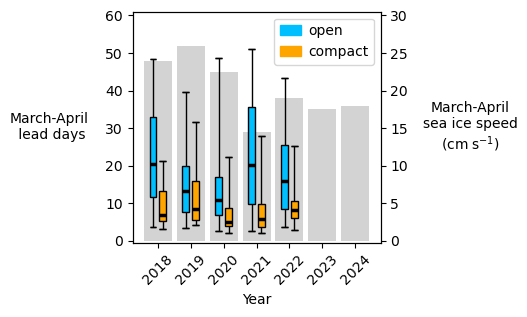

In [771]:
ds = xr.open_dataset('./data/SBS_open_area_v6.nc')
ds.close()

ds.sel(time=datetime(2020,2,17))



fig, ax = plt.subplots(figsize=(3.2,3))

# ax.set_ylim(0,35)

ax2 = ax.twinx()
ax2.set_ylim(-0.25,30.5)
# ax2.set_ylim(-0.5,61)
# ax2.set_ylim(0,3)

all_ws = np.array([])
all_is = np.array([])
all_oa = np.array([])

ax.set_ylim(-0.5,61)

# ax2.bar(np.arange(2018, 2022+1), MYI_fractions[-5:], color='dodgerblue', alpha=0.2)
# ax2.bar(np.arange(2018, 2022+1), 1-MYI_fractions[-5:], bottom = MYI_fractions[-5:],  color='orange', alpha=0.2)

for year in years:
    
    all_open = (ds.sel(time = slice(datetime(year,3,1), datetime(year,4,30))).ext_g20)/1000
    
    mean_open = np.nanmean(all_open)
    
    w = 0.05
#     plt.scatter(np.linspace(year-w, year+w, len(all_open)), all_open, s=2, c='lightgray')
    
#     ax.bar(year, np.nanmean(all_open), color='r', zorder=10)
#     ax.bar(year, np.nansum(np.diff(all_open)), color='gray', alpha=0.5,zorder=10)
#     std_open = np.nanstd((ds.sel(time = slice(datetime(year,3,1), datetime(year,4,30))).ext_g20)/1000)

    perc_50 = np.nanpercentile(all_open, 50)
    perc_75 = np.nanpercentile(all_open, 75)
    perc_25 = np.nanpercentile(all_open, 25)
    
#     ax.scatter(year, np.nanmean(all_open),  c='k')
    
    
    ax.bar(year, np.sum(all_open>1), width=0.85, color='lightgray')
#     ax.scatter(year, np.sum(all_open>1)/2, color='k', zorder=100)

    if year < 2023:
        all_oa = np.append(all_oa, all_open)
#     plt.scatter(year, perc_50, c='k')
    
    
#     plt.plot([year,year], 
#              [perc_25, perc_75], color='k')

#     box_plot(ax, all_open, x=year-0.2, width = 0.2, lw = 1, alpha=1, edge_alpha=1,  
#              c=[0.7,0.7,0.7], edgecolor='k', show_whiskers=True, show_median=True)
    
    if year < 2023:
#         grab ice drift data
        ii = np.where(df_dates == datetime(year, 3, 1))[0][0]
        ff = np.where(df_dates == datetime(year, 4, 30))[0][0]

#         speed = np.sqrt(df2.iloc[ii:ff+1].u_ice.values**2+ df2.iloc[ii:ff+1].v_ice.values**2)
        ice_speed = df2.iloc[ii:ff+1].sp_ice.values
        all_is = np.append(all_is, ice_speed)
        
        ice_div =df2.iloc[ii:ff+1].div_ice.values
        
        wind_speed = df2.iloc[ii:ff+1].sp10.values
        all_ws = np.append(all_ws, wind_speed)

#         ax.scatter(year, np.nanmean(ice_speed),  c='dodgerblue', label='ice speed', zorder=10)
#         ax.scatter(year, -1000000*np.nanmean(ice_div),  c='k', label='ice speed', zorder=10)
        
#         ax.scatter(year, -1000000*np.nanmean(ice_div),  c='k', label='ice speed', zorder=10)
#         box_plot(ax, -1000000*ice_div, x=year-0.15, width = 0.25, lw = 1, alpha=1, edge_alpha=1,  
#              c=[0.7,0.7,0.7], edgecolor='k', show_whiskers=True, show_median=True)


        box_plot(ax2, (ice_speed)[all_open >= 1], x=year-0.15, width = 0.2, lw = 1, alpha=1, edge_alpha=1,  
             c='deepskyblue', edgecolor='k', show_whiskers=True, whiskers=(1, 99), show_median=True)
        box_plot(ax2, (ice_speed)[all_open < 1], x=year+0.15, width = 0.2, lw = 1, alpha=1, edge_alpha=1,  
             c='orange', edgecolor='k', show_whiskers=True, whiskers=(1, 99), show_median=True)
        
#         bin_edges = np.arange(0,31,1)
#         counts, edges = np.histogram((ice_speed[all_open >= 1]), bins=bin_edges)
#         bin_centers = bin_edges[:-1] + (bin_edges[1]-bin_edges[0])/2
#         ax2.barh(bin_centers, 2.5*counts/61, left = year - 0.2 - 2.5*(counts/61)/2, height=1*0.9,  align='center', color='deepskyblue')

#         bin_edges = np.arange(0,31,1)
#         counts, edges = np.histogram((ice_speed[all_open < 1]), bins=bin_edges)
#         bin_centers = bin_edges[:-1] + (bin_edges[1]-bin_edges[0])/2
#         ax2.barh(bin_centers, 2.5*counts/61, left = year + 0.2 - 2.5*(counts/61)/2, height=1*0.9,  align='center', color='orange')

        
#         bin_edges = np.arange(0,31,1)
#         counts, edges = np.histogram((ice_speed), bins=bin_edges)
#         bin_centers = bin_edges[:-1] + (bin_edges[1]-bin_edges[0])/2
#         ax2.barh(bin_centers, 3.5*counts/61, left = year - 3.5*(counts/61)/2, height=1*0.9,  align='center', color='k')


#         print(year, np.sum(counts))
#         print(f'  sub 5 cm/s: {np.sum(counts[bin_centers < 5])}')
#         print(f'  sub 5-10 cm/s: {np.sum(counts[(bin_centers > 5)&(bin_centers < 15)])}')
#         print(f'  abv 20 cm/s: {np.sum(counts[(bin_centers > 15)])}')
        
        
#         bin_edges = np.arange(0,31,1)
#         counts, edges = np.histogram((ice_speed[all_open < 1]), bins=bin_edges)
#         bin_centers = bin_edges[:-1] + (bin_edges[1]-bin_edges[0])/2
#         ax2.barh(bin_centers, 2.*counts/61, left = year + 0.25 - 2.*(counts/61)/2, height=1*0.9,  color='orange')
        
        
        
#         ax2.scatter(year, np.nanmean(ice_speed), c='k')
#         ax2.scatter(year-0.25, np.nanmean(ice_speed[all_open >= 1]), c='deepskyblue')
#         ax2.scatter(year+0.25, np.nanmean(ice_speed[all_open < 1]), c='orange')

        
#         ax2.vlines(year, np.nanmean(ice_speed)-np.nanstd(ice_speed), np.nanmean(ice_speed)+np.nanstd(ice_speed), 
#                   colors='k',)
#         ax2.vlines(year-0.25, np.nanmean(ice_speed[all_open >= 1])-np.nanstd(ice_speed[all_open >= 1]), np.nanmean(ice_speed[all_open >= 1])+np.nanstd(ice_speed[all_open >= 1]), 
#                   colors='deepskyblue',)
#         ax2.vlines(year+0.25, np.nanmean(ice_speed[all_open < 1])-np.nanstd(ice_speed[all_open < 1]), np.nanmean(ice_speed[all_open < 1])+np.nanstd(ice_speed[all_open < 1]), 
#                   colors='orange',)
        
#         ax2.scatter(year-0.15, np.nanmean((ice_speed)[all_open > 1]), c='lightskyblue')
#         ax2.scatter(year+0.15, np.nanmean((ice_speed)[all_open <= 1]), c='orange')
#         box_plot(ax2, (ice_speed/wind_speed)[all_open < 1], x=year+0.15, width = 0.2, lw = 1, alpha=1, edge_alpha=1,  
#              c='orange', edgecolor='k', show_whiskers=False, show_median=True)

#         scale = 15
#         ax2.quiver(year, 1, np.nanmean(df2.iloc[ii:ff+1].u10.values), np.nanmean(df2.iloc[ii:ff+1].v10.values), 
#                    scale=scale, scale_units='xy',  units='xy', pivot='tip', color='gray', width=0.08, zorder=100)
#         ax2.quiver(year, 1, np.nanmean(df2.iloc[ii:ff+1].u_ice.values), np.nanmean(df2.iloc[ii:ff+1].v_ice.values), 
#                    scale=scale, scale_units='xy',  units='xy', pivot='tip', color='k', width=0.08, zorder=100)
        
#         ice_u = df2.iloc[ii:ff+1].u_ice.values
#         ice_v = df2.iloc[ii:ff+1].v_ice.values
        
#         u_no_nan = np.copy(ice_u)
#         v_no_nan = np.copy(ice_v)

#         u_no_nan[np.isnan(ice_u)] = np.nan
#         u_no_nan[np.isnan(ice_v)] = np.nan

#         v_no_nan[np.isnan(ice_u)] = np.nan
#         v_no_nan[np.isnan(ice_v)] = np.nan

#         U = np.mean(u_no_nan)
#         V = np.mean(v_no_nan)

#         N_no_nan = np.sum(np.isfinite(v_no_nan))

#         sxy = np.sum((u_no_nan - U) * (v_no_nan - V))/(N_no_nan-1)

#         sxx = np.sum((u_no_nan - U)**2)/(N_no_nan-1)
#         syy = np.sum((v_no_nan - V)**2)/(N_no_nan-1)

#         # thetam is the variance ellipse rotation (principal angle). clockwise. (P2.9)
#         thetam = (-1)*0.5*np.arctan2(2*sxy,sxx-syy)

#         # major and minor axes of ellipse (P2.12)
#         amaj = (0.5*(sxx+syy+((sxx-syy)**2 +4*sxy**2)**(0.5) ))**(0.5)
#         bmin = (0.5*(sxx+syy-((sxx-syy)**2 +4*sxy**2)**(0.5) ))**(0.5)

#         print(year, amaj / bmin)
#         rad = np.linspace(0,2*np.pi,100)

#         # ellipse points in the rotated reference frame
#         xell = amaj*np.cos(rad) / scale
#         yell = bmin*np.sin(rad) / scale

#         # ellipse points in the longitude/latitude frame (rotate by thetam)
#         # this ellipse is in units of scaled data ($vscl)
#         xellp = xell*np.cos(thetam) + yell*np.cos(thetam-np.pi/2)
#         yellp = xell*np.cos(thetam+np.pi/2) + yell*np.cos(thetam)

#         # dist = ((xellp-U)**2 + (yellp-V)**2)**(0.5)
#         # size = ((xellp)**2 + (yellp)**2)**(0.5)

#         ax2.plot(xellp + year, yellp + 1, c='gray', lw=1)

    
ax.set_xticks(years)
# ax.set_xticklabels([f"'{str(year)[-2:]}" for year in years], rotation=45)
ax.set_xticklabels(years, rotation=45)
ax.set_xlabel('Year')
# ax.set_ylabel('March-April\nopen extent\n'+'($\mathrm{10^{3}\;{km}^{2}}$)', rotation=0, labelpad = 40)
ax.set_ylabel('March-April\n lead days', rotation=0, labelpad = 40, va='center')

# ax2.set_ylabel('Average\n$\mathrm{u_{ice} (u_{wind})^{-1}}$', rotation=0, labelpad = 35, va='center')
ax2.set_ylabel('March-April\nsea ice speed\n($\mathrm{cm\;{s}^{-1}}$)', rotation=0, labelpad = 45, va='center')
# ax2.yaxis.set_major_locator(plt.MultipleLocator(5))
# ax2.yaxis.set_minor_locator(plt.MultipleLocator(1))
# ax2.yaxis.set_major_formatter('{x:.0f}%')

import matplotlib.patches as mpatches

# blue, orange legend
#------------
blue_patch = mpatches.Patch(color='deepskyblue', label='open')
orng_patch = mpatches.Patch(color='orange', label='compact')
plt.legend(handles=[blue_patch, orng_patch], labelspacing=0.5, handlelength=1.5, handletextpad=0.5)

# days legend
#------------
# from matplotlib.patches import Rectangle, FancyBboxPatch
# rounded_rect = FancyBboxPatch((0.65,0.8), 0.2,0.075, boxstyle='Round, pad=0.1, rounding_size=0.05', 
#                               facecolor='None', edgecolor='lightgray', alpha = 1, transform=ax.transAxes)
# ax.add_patch(rounded_rect)
# ax.text(2022.5, 55, '1 day ', va = 'center', ha='left', clip_on = False)
# ax.text(2022.5, 51, '5 days ', va = 'center', ha='left', clip_on = False)
# ax.text(2022.5, 47, '10 days ', va = 'center', ha='left', clip_on = False)
# ax.barh(55, 3.5*1/61, left = 2022.3 - 3.5*1/61, height=1*0.9*1.2,  color='k', clip_on=False)
# ax.barh(51, 3.5*5/61, left = 2022.3 - 3.5*5/61, height=1*0.9*1.2,  color='k', clip_on=False)
# ax.barh(47, 3.5*10/61, left = 2022.3 - 3.5*10/61, height=1*0.9*1.2,  color='k', clip_on=False)

# plt.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], bbox_to_anchor=(1,1), loc='upper left')
fig.savefig('/Users/mackenziejewell/Desktop/Fig10.png', dpi=300, pad_inches=0.1, bbox_inches='tight')

In [702]:
np.sum(counts[bin_centers < 5])

25

In [697]:
bin_edges <= 5

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [632]:
counts

array([0, 4, 6, 9, 6, 7, 5, 3, 2, 1, 3, 3, 2, 1, 3, 0, 2, 1, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

<BarContainer object of 29 artists>

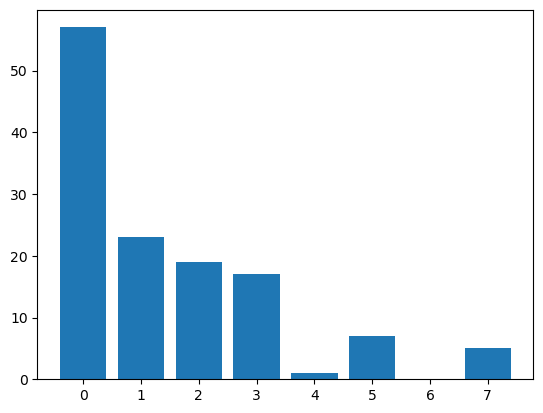

In [587]:
plt.bar(counts, bin_centers)

In [ ]:
# VARIANCE ELLIPSES

# https://www.pmel.noaa.gov/maillists/tmap/ferret_users/fu_2005/msg00315.html
# https://www.cawcr.gov.au/projects/verification/Koh/EllipticalVectorError.html#:~:text=The%20variance%20of%20a%202D,the%20direction%20of%20the%20eigenvectors.
    

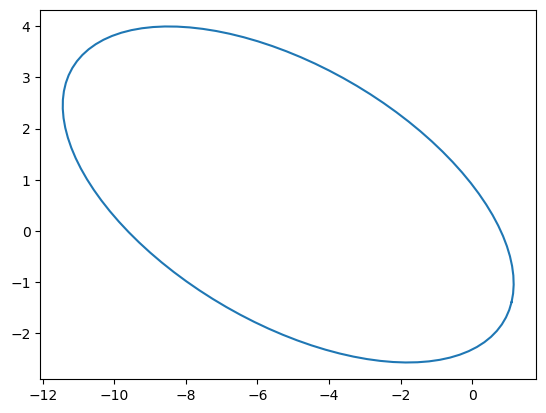

In [505]:
ice_u = df2.iloc[ii:ff+1].u_ice.values
ice_v = df2.iloc[ii:ff+1].v_ice.values

u_no_nan = np.copy(ice_u)
v_no_nan = np.copy(ice_v)

u_no_nan[np.isnan(ice_u)] = np.nan
u_no_nan[np.isnan(ice_v)] = np.nan

v_no_nan[np.isnan(ice_u)] = np.nan
v_no_nan[np.isnan(ice_v)] = np.nan

U = np.mean(u_no_nan)
V = np.mean(v_no_nan)

N_no_nan = np.sum(np.isfinite(v_no_nan))

sxy = np.sum((u_no_nan - U) * (v_no_nan - V))/(N_no_nan-1)

sxx = np.sum((u_no_nan - U)**2)/(N_no_nan-1)
syy = np.sum((v_no_nan - V)**2)/(N_no_nan-1)

# thetam is the variance ellipse rotation (principal angle). clockwise. (P2.9)
thetam = (-1)*0.5*np.arctan2(2*sxy,sxx-syy)

# major and minor axes of ellipse (P2.12)
amaj = (0.5*(sxx+syy+((sxx-syy)**2 +4*sxy**2)**(0.5) ))**(0.5)
bmin = (0.5*(sxx+syy-((sxx-syy)**2 +4*sxy**2)**(0.5) ))**(0.5)

rad = np.linspace(0,2*np.pi,100)

# ellipse points in the rotated reference frame
xell = amaj*np.cos(rad) 
yell = bmin*np.sin(rad)

# ellipse points in the longitude/latitude frame (rotate by thetam)
# this ellipse is in units of scaled data ($vscl)
xellp = xell*np.cos(thetam) + yell*np.cos(thetam-np.pi/2)
yellp = xell*np.cos(thetam+np.pi/2) + yell*np.cos(thetam)

# dist = ((xellp-U)**2 + (yellp-V)**2)**(0.5)
# size = ((xellp)**2 + (yellp)**2)**(0.5)

plt.plot(xellp+U, yellp+V)

In [500]:
size[np.where(dist == np.min(dist))]

array([5.63429466])

In [501]:
np.sqrt(U**2+V**2)

5.189216770156123

(-20.0, 20.0)

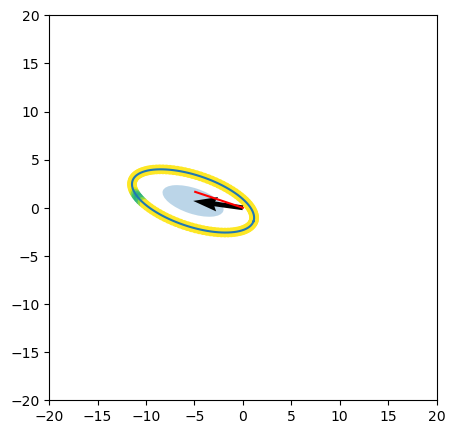

In [502]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(5,5))

ax.quiver(0, 0, U, V, units='xy',
          scale=1, color='k', width=0.5, zorder=100)

ax.plot([0, np.sqrt(U**2 +V**2)*np.cos(np.pi-thetam)], [0, np.sqrt(U**2 +V**2)*np.sin(np.pi-thetam)], c='r', zorder=100)

ellipse = Ellipse((U, V), amaj, bmin, angle=-thetam*180/np.pi, alpha=0.3)
ax.add_artist(ellipse)

ax.plot(xellp+U, yellp+V)

ax.scatter(xellp+U, yellp+V, c=dist, vmin=0, vmax=1)

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)


7.658437672904448
6.024716994749676
1.6381076373208583
6.319774460713595
3.30435950706238


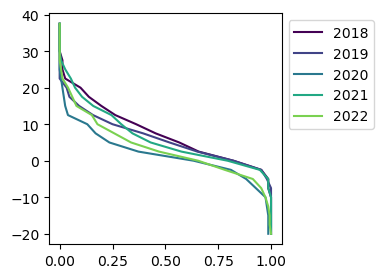

In [772]:

fig, ax = plt.subplots(figsize=(3,3))

df = pd.read_csv('./data/SBS_drift_across_years_v6.csv')
df_drift_dates = pd.to_datetime(df.date.values)

years = [2018, 2019, 2020, 2021, 2022]

speed_bins = np.arange(-20, 40, 2.5)


for yy, year in enumerate(years):
    
    bin_frequencies = np.array([])
    
    ii = np.where(df_drift_dates == datetime(year-1, 12, 15))[0][0]
    ff = np.where(df_drift_dates == datetime(year, 5, 15))[0][0]
    
    ice_speed_ = -df.iloc[ii:ff+1].u.values
    print(np.nanmean(ice_speed_))

        
    for speed_bin in speed_bins:
        
        bin_frequencies = np.append(bin_frequencies, np.nansum(ice_speed_ > speed_bin)/np.sum(np.isfinite(ice_speed_)))
        
    plt.plot(bin_frequencies, speed_bins, color=cm.viridis(yy/len(years)), label=year)
        

plt.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], bbox_to_anchor=(1,1), loc='upper left')




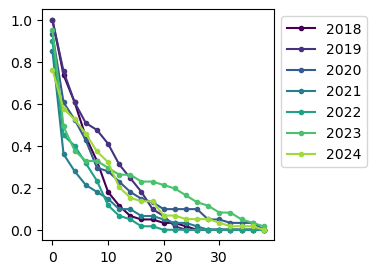

In [336]:

fig, ax = plt.subplots(figsize=(3,3))

years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]


for yy, year in enumerate(years):
    
    all_open = (ds.sel(time = slice(datetime(year,3,1), datetime(year,4,30))).ext_g20)/1000
    
    open_bins = np.arange(0, 40, 2)
    bin_frequencies = np.array([])
        
    for open_bin in open_bins:
        
        bin_frequencies = np.append(bin_frequencies, np.nansum(all_open > open_bin)/np.sum(np.isfinite(all_open)))
        
    plt.plot(open_bins,  bin_frequencies, color=cm.viridis(yy/len(years)), marker='.', label=year)
        

plt.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], bbox_to_anchor=(1,1), loc='upper left')




11.615257537027574
9.38150613600353
7.5873523080293
9.798066959279408
7.856790638082965


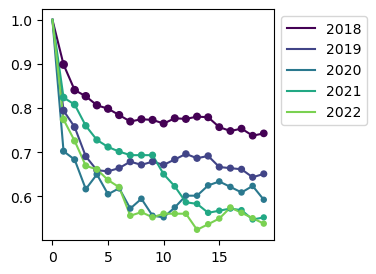

In [791]:
wind_thresh = 5.6
ice_thresh = 5#7.6


fig, ax = plt.subplots(figsize=(3,3))
# ax.set_ylim(0,1)


df = pd.read_csv('./data/SBS_drift_across_years_v6.csv')
df_drift_dates = pd.to_datetime(df.date.values)

years = [2018, 2019, 2020, 2021, 2022]


for yy, year in enumerate(years):
    
    q_frequencies = np.array([])
    sum_i = np.array([])
    
    ii = np.where(df_drift_dates == datetime(year-1, 11, 1))[0][0]
    ff = np.where(df_drift_dates == datetime(year, 5, 31))[0][0]
    
    ice_speed_ = df.iloc[ii:ff+1].sp.values
    print(np.nanmean(ice_speed_))
    
    all_q = np.arange(1,20)
    
    for q in all_q:

        numI_followI = 0
        numI = 0

        for ii, ice in enumerate(ice_speed_[:-q]):

            if ice > ice_thresh:
                numI += 1

                if ice_speed_[ii+q] > ice_thresh:
                    numI_followI+=1

        q_frequencies = np.append(q_frequencies, numI_followI/numI)
        sum_i = np.append(sum_i, numI_followI)
        
    plt.plot(np.append(0, all_q), np.append(1, q_frequencies), color=cm.viridis(yy/len(years)), label=year)
    plt.scatter(all_q, q_frequencies, color=cm.viridis(yy/len(years)), s=sum_i/5, zorder=10)    
        

plt.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], bbox_to_anchor=(1,1), loc='upper left')




(0.0, 1.05)

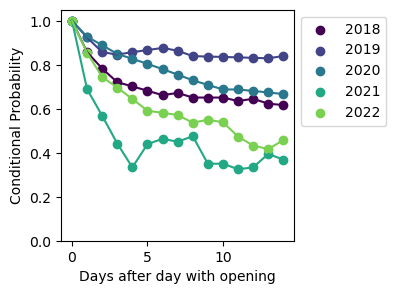

In [790]:

fig, ax = plt.subplots(figsize=(3,3))
open_thresh = 1

for yy, year in enumerate(years):
    
    all_open = (ds.sel(time = slice(datetime(year,1,1), datetime(year,4,30))).ext_g20)/1000
    
    q_frequencies = np.array([])
    
    all_q = np.arange(1,15)
    
    for q in all_q:

        numO_followO = 0
        numO = 0

        for ii in range(len(all_open[:-q])):

            if all_open[ii] > open_thresh:
                numO += 1

                if all_open[ii+q] > open_thresh:
                    numO_followO+=1

        q_frequencies = np.append(q_frequencies, numO_followO/numO)
      
    plt.plot(np.append(0, all_q), np.append(1, q_frequencies), color=cm.viridis(yy/len(years)), label=year)
    plt.scatter(np.append(0, all_q), np.append(1, q_frequencies), color=cm.viridis(yy/len(years)), label=year)

plt.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], bbox_to_anchor=(1,1), loc='upper left')

ax.set_ylabel('Conditional Probability')
ax.set_xlabel('Days after day with opening')

ax.set_ylim(0,1.05)

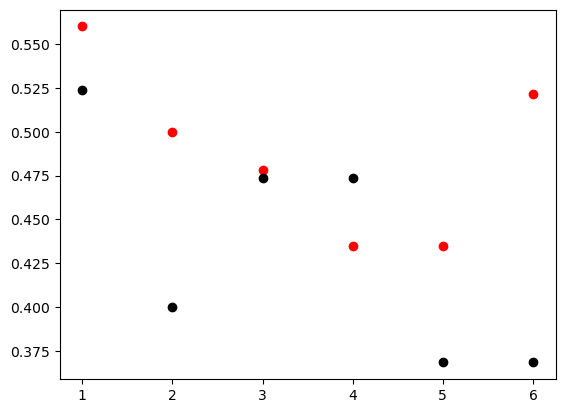

In [225]:

for q in [1, 2, 3, 4, 5, 6]:

    numW_followW = 0
    numW = 0

    for ww, wind in enumerate(wind_speed[:-q]):

        if wind > wind_thresh:
            numW += 1

            if wind_speed[ww+q] > wind_thresh:
                numW_followW+=1

    numI_followI = 0
    numI = 0

    for ii, ice in enumerate(ice_speed[:-q]):

        if ice > ice_thresh:
            numI += 1

            if ice_speed[ii+q] > ice_thresh:
                numI_followI+=1

    plt.scatter(q, numW_followW/numW, c='r')
    plt.scatter(q, numI_followI/numI, c='k')

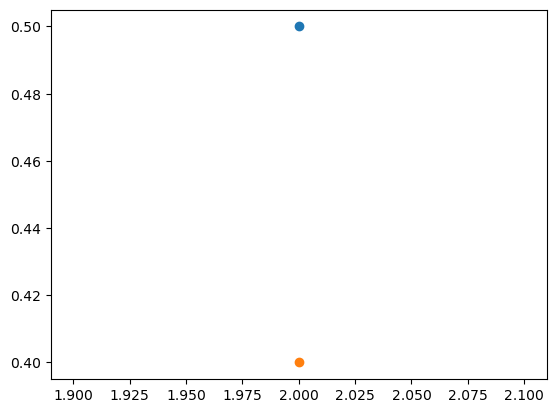

In [221]:
plt.scatter(q, numW_followW/numW)
plt.scatter(q, numI_followI/numI)

In [219]:
numW_followW/numW

0.5

In [220]:
numI_followI/numI

0.4

In [209]:
wind_speed

array([ 8.1686554 ,  6.47052765,  3.82171321,  3.36508632,  4.37174463,
        5.06812763,  5.89750576,  3.16094398,  4.89222813,  2.64973044,
        4.41665459,  4.25974894,  4.49373531,  6.28218794,  5.25660467,
        6.5366025 ,  4.37408018,  3.91110802,  6.83625269,  5.57582903,
        2.77466559,  3.58042955,  7.53736973,  9.8861351 , 11.31015873,
       10.90410709,  9.15829468,  9.46164227,  9.05429935,  5.96483755,
        6.2966094 ,  6.71923733,  6.14169121,  5.82190704,  3.67512918,
        2.2180891 ,  5.23383379,  5.32434559,  4.17769003,  7.11672401,
        3.81122065,  3.38801622,  3.29888415,  6.01473141,  4.42039633,
        6.3260026 ,  7.08170891,  4.63245249,  3.41910028,  2.53524184,
        4.06798553,  4.40002108,  7.33686209,  3.26046443,  2.99525094,
        4.76781702,  4.51516628,  5.04547405,  6.32470274,  6.72357702,
        3.01529264])

In [431]:
df2

,Unnamed: 0,dt,u,v,sp
0,0,0,21.827639,10.296864,24.777647
1,1,7,13.070087,11.815094,18.067602
2,2,14,8.662108,8.341593,12.139303
3,3,21,2.576068,3.619658,4.845021
4,4,28,5.795724,3.859544,7.220550
...,...,...,...,...,...
69,69,484,1.256695,2.585186,3.308551
70,70,491,4.841598,2.472649,5.502616
71,71,498,6.288035,-0.211681,6.590160
72,72,505,5.062679,4.460968,6.867221


In [403]:
74+16

90

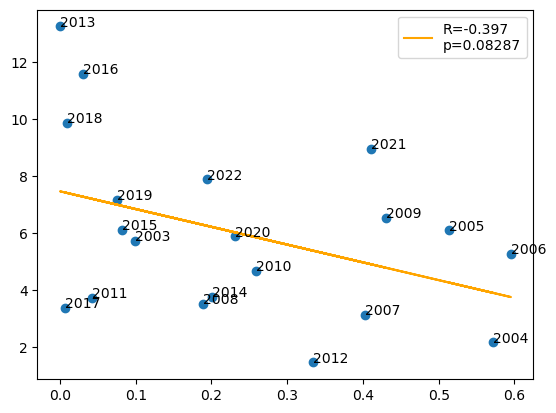

In [424]:
import scipy.stats



ice_speeds = pd.read_csv('./data/SBS_drift_across_20032022_March.csv').sp
wind_speeds = pd.read_csv('./data/SBS_wind_across_20032022_March.csv').sp

plt.scatter(oldMYI_fractions[19:], ice_speeds)

MYI_years = np.arange(1984,2023)


for yy, year in enumerate(MYI_years[19:]):
    plt.text(oldMYI_fractions[19:][yy], (ice_speeds)[yy], year)
    
    
X1 = oldMYI_fractions[19:]
X2 = ice_speeds

result = scipy.stats.linregress(X1, X2)
plt.plot(X1, result.intercept + result.slope * X1, linestyle='solid', c='orange', label=f'R={result.rvalue:.3f}\np={result.pvalue:.5f}')

plt.legend()


In [397]:
years = np.arange(1984,2023)

years[19:]

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [394]:
MYI_fractions

array([0.57142857, 0.50833938, 0.51486584, 0.47208122, 0.18781726,
       0.33575054, 0.43292241, 0.56997825, 0.57650471, 0.47353154,
       0.33575054, 0.34735315, 0.1044235 , 0.56200145, 0.08846991,
       0.2066715 , 0.50616389, 0.40029007, 0.20449601, 0.10949964,
       0.66207397, 0.55692531, 0.66642495, 0.45250181, 0.21609862,
       0.51559101, 0.3306744 , 0.1044235 , 0.38651197, 0.        ,
       0.30601885, 0.13705584, 0.04060914, 0.00652647, 0.04496012,
       0.14865845, 0.34155185, 0.56635243, 0.28281363])

In [366]:
year, np.nanmean(all_open)

(2024, 7.109983050847458)

In [364]:
np.nanmean(all_open)

7.109983050847458

In [331]:
np.nanpercentile(all_oa, 30)

0.9330999999999999

In [332]:
np.nanpercentile(all_ws, 30)

4.113869857788086

In [335]:
np.nanpercentile(all_is, 30)

3.526437520980835

In [313]:
np.nanmean(all_is)

7.6310459047067365

In [307]:
np.nanmean(all_oa)

6.038345394736843

In [ ]:
np.nanmean(all_oa)

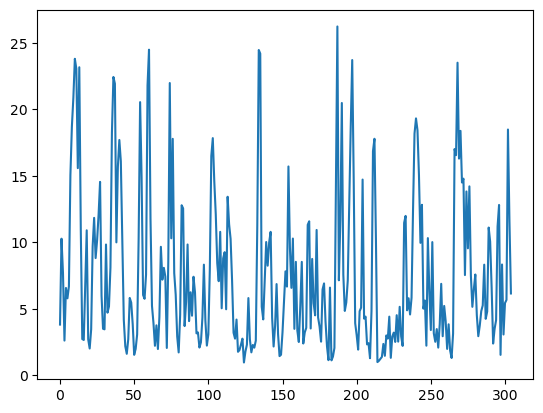

In [308]:
plt.plot(all_is)

<xarray.Dataset>
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 2020-02-17
Data variables:
    doa          float64 ...
    oa           float64 ...
    noa_inc      float64 ...
    noa_inc_g20  float64 ...
    oa_inc_g20   float64 ...
    N_oa_g20     float64 ...
    ext_g20      float64 ...
    oa_g20       float64 ...
    N_oa_g10     float64 ...
    ext_g10      float64 ...
    oa_g10       float64 ...
Attributes:
    description:  open area in coastal polygon

In [301]:
ds.sel(time=datetime(2021,3,5))

<xarray.Dataset>
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 2021-03-05
Data variables:
    doa          float64 ...
    oa           float64 ...
    noa_inc      float64 ...
    noa_inc_g20  float64 ...
    oa_inc_g20   float64 ...
    N_oa_g20     float64 ...
    ext_g20      float64 ...
    oa_g20       float64 ...
    N_oa_g10     float64 ...
    ext_g10      float64 ...
    oa_g10       float64 ...
Attributes:
    description:  open area in coastal polygon

In [285]:
dt[:np.where(dt==0)[0][0]]

array([-61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49,
       -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36,
       -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23,
       -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,
        -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1])

In [272]:
df2.dt.values[:np.where(df2.dt.values==365)[0][0]+1]-365

array([-365, -358, -351, -344, -337, -330, -323, -316, -309, -302, -295,
       -288, -281, -274, -267, -260, -253, -246, -239, -232, -225, -218,
       -211, -204, -197, -190, -183, -176, -169, -162, -155, -148, -141,
       -134, -127, -120, -113, -106,  -99,  -92,  -85,  -78,  -71,  -64,
        -57,  -50,  -43,  -36,  -29,  -22,  -15,   -8,    0])

In [262]:
df2.dt.values[np.where(df2.dt.values==365)[0][0]:]

array([365, 372, 379, 386, 393, 400, 407, 414, 421, 428, 435, 442, 449,
       456, 463, 470, 477, 484, 491, 498, 505, 512])

In [227]:

out = grab_icedrift_range(start_date=datetime(2000, 1, 1), 
                    end_date=datetime(2000, 1, 7), 
                    PPD_drift_path='/Volumes/Jewell_EasyStore/NSIDC-0116_PPdrift/', 
                    PPD_filename='icemotion_daily_nh_25km_{}0101_{}1231_v4.1.nc', 
                    return_vars=['lon', 'lat', 'proj', 'ds'], 
                    lat_range=[0, 90], lon_range=[0, 360])
dft_lons = out[0]
dft_lats = out[1]

dft_within_poly = np.full(np.shape(dft_lons), False)
for ii in range(np.shape(dft_lons)[0]):
    for jj in range(np.shape(dft_lons)[1]):
        
        if dft_lons[ii,jj] > 180:
            lon = dft_lons[ii,jj] - 360
        else:
            lon = dft_lons[ii,jj]
        if coast_poly.contains(Point(lon, dft_lats[ii,jj])):
            dft_within_poly[ii,jj] = True
            

            
# set map extent, add grid and geo features
#------------------------------------------
map_projection = ccrs.NorthPolarStereo(central_longitude=210)
fig, ax = plt.subplots(figsize=(4,4), tight_layout=True, subplot_kw = {'projection':map_projection})
lat_range = [68.5, 77]
lon_range = [197, 232]
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=16)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.3, zorder=18)

# polygons
#---------
ax.add_geometries([coast_poly], edgecolor='k', linestyle='dashed', facecolor='none',
                  alpha=1, lw=1,  crs= ccrs.PlateCarree(), zorder=10)

ax.scatter(dft_lons[dft_within_poly], dft_lats[dft_within_poly], transform=ccrs.PlateCarree())
    

/Users/mackenziejewell/Documents/GitHub/SIDEx-MYI-transport_rev/./scripts/LIB_PPdrift_NSIDC0116.py:406: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = CFTime.to_datetimeindex()


NameError: name 'coast_poly' is not defined

# Open buoy data

In [339]:
ds = xr.open_dataset('./data/BuoyCoordinates_cln_v0.nc')
ds.close()
ds

<xarray.Dataset>
Dimensions:    (buoyID: 23, time: 4609)
Coordinates:
  * time       (time) datetime64[ns] 2021-02-25 ... 2021-06-01
  * buoyID     (buoyID) object '23' '24' '25' '26' '27' ... '50' '51' '52' '53'
Data variables:
    latitude   (buoyID, time) float64 ...
    longitude  (buoyID, time) float64 ...
Attributes:
    description:  half-hourly interpolated buoy positions from cleaned Hutchi...

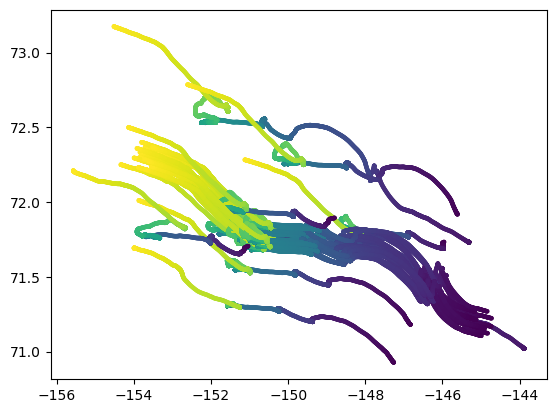

In [340]:
#==================================================
TI = datetime(2021, 3, 1, 0, 0)
TF = datetime(2021, 5, 1, 23, 0)
#==================================================
timess = pd.to_datetime(ds.sel(time=slice(TI, TF)).time)
buoy_time = pd.to_datetime(ds.time.values)
buoy_IDs = ds.buoyID.values

days_since_TI = (timess - timess[0]).total_seconds() / (60 * 60 * 24)

for buoy in ds.buoyID.values:
    plt.scatter(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)), 
                ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)),
                c=days_since_TI, s=5)

In [341]:
marker_dict = {}

for buoy in ['24', '53']:
    marker_dict[buoy] = {}
    marker_dict[buoy]['group'] = 'NW'
    marker_dict[buoy]['shape'] = 's'
    marker_dict[buoy]['size'] = 20
    
for buoy in ['23', '25', '26', '29', '30', '35', '38', '40', '41', '43', '49']:
    marker_dict[buoy] = {}
    marker_dict[buoy]['group'] = 'W'
    marker_dict[buoy]['shape'] = 'v'
    marker_dict[buoy]['size'] = 30    
    
for buoy in ['28', '32', '33', '36', '46', '48', '50', '51','45','27']:
    marker_dict[buoy] = {}
    marker_dict[buoy]['group'] = 'E'
    marker_dict[buoy]['shape'] = 'o'
    marker_dict[buoy]['size'] = 25 

for buoy in ['31','52']:
    marker_dict[buoy] = {}
    marker_dict[buoy]['group'] = 'SE'
    marker_dict[buoy]['shape'] = 'd'
    marker_dict[buoy]['size'] = 40 


In [77]:

total_areas = np.array([])
MYI_areas = np.array([])
times = np.array([], dtype='datetime64')

for year in np.arange(2002, 2023):

    ds = xr.open_dataset(f'/Volumes/Jewell_EasyStore/NSIDC-0611_seaice_age/iceage_nh_12.5km_{year}0101_{year}1231_v4.1.nc')

    ds['time'] = ds.indexes['time'].to_datetimeindex()


    DS = ds.sel(time=slice(datetime(year,1,1), datetime(year,4,30)))

    print(DS.time.values[0], DS.time.values[-1])


    

    for tt in range(len(DS.time.values)):

        SBSage = (DS.age_of_sea_ice.values[tt,:,:][poly_mask]).astype(np.float64)
        SBSage[ SBSage >= 20 ] = np.nan

        total_area_inSBS = np.sum(np.isfinite(SBSage))
        total_areas = np.append(total_areas, total_area_inSBS)
        MYI_area_inSBS = np.nansum(SBSage > 1)
        MYI_areas = np.append(MYI_areas, MYI_area_inSBS)
        
        times = np.append(times, DS.time.values[tt])
        

/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()


2002-01-01T00:00:00.000000000 2002-04-30T00:00:00.000000000


/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()


2003-01-01T00:00:00.000000000 2003-04-30T00:00:00.000000000
2004-01-01T00:00:00.000000000 2004-04-29T00:00:00.000000000


/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses 

2005-01-01T00:00:00.000000000 2005-04-30T00:00:00.000000000
2006-01-01T00:00:00.000000000 2006-04-30T00:00:00.000000000
2007-01-01T00:00:00.000000000 2007-04-30T00:00:00.000000000


/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses 

2008-01-01T00:00:00.000000000 2008-04-29T00:00:00.000000000
2009-01-01T00:00:00.000000000 2009-04-30T00:00:00.000000000
2010-01-01T00:00:00.000000000 2010-04-30T00:00:00.000000000


/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses 

2011-01-01T00:00:00.000000000 2011-04-30T00:00:00.000000000
2012-01-01T00:00:00.000000000 2012-04-29T00:00:00.000000000
2013-01-01T00:00:00.000000000 2013-04-30T00:00:00.000000000


/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()


2014-01-01T00:00:00.000000000 2014-04-30T00:00:00.000000000
2015-01-01T00:00:00.000000000 2015-04-30T00:00:00.000000000


/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses 

2016-01-01T00:00:00.000000000 2016-04-29T00:00:00.000000000
2017-01-01T00:00:00.000000000 2017-04-30T00:00:00.000000000
2018-01-01T00:00:00.000000000 2018-04-30T00:00:00.000000000
2019-01-01T00:00:00.000000000 2019-04-30T00:00:00.000000000
2020-01-01T00:00:00.000000000 2020-04-29T00:00:00.000000000
2021-01-01T00:00:00.000000000 2021-04-30T00:00:00.000000000
2022-01-01T00:00:00.000000000 2022-04-30T00:00:00.000000000


/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()
/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_16219/3262647971.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses 

In [84]:
OUTPUT_FILE = './data/SBS_MYI_2003-2024_with2012.nc'

ds = xr.Dataset(
        data_vars=dict(
            MYI =(["time"], MYI_areas, {"long_name": "MYI area counts", "units": "#"}),
            total = (["time"], total_areas, {"long_name": "total area counts", "units": "#"}),

        ),
        coords=dict(time = (["time"], times)),
        attrs=dict(description="MYI area in SBS polygon JFMA 2003-2024"),
    )

ds.to_netcdf(path=OUTPUT_FILE, 
             mode='w', format="NETCDF4")    

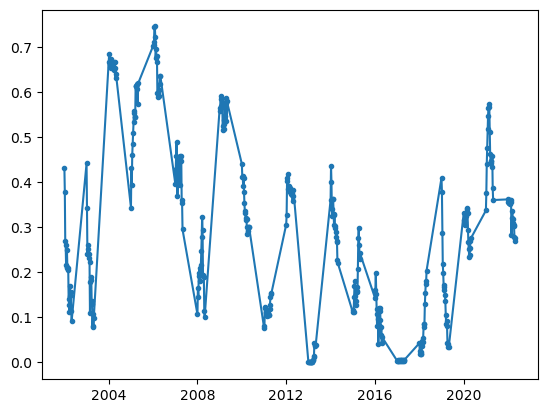

In [83]:
plt.plot(times, MYI_areas/total_areas, marker='.')

In [75]:
DS.time.values[tt]

numpy.datetime64('2022-04-30T00:00:00.000000000')

 - select nearest date before 2003-03-01 >>> 2003-02-26
 - select nearest date before 2004-03-01 >>> 2004-02-26
 - select nearest date before 2005-03-01 >>> 2005-02-26
 - select nearest date before 2006-03-01 >>> 2006-02-26
 - select nearest date before 2007-03-01 >>> 2007-02-26
 - select nearest date before 2008-03-01 >>> 2008-02-26
 - select nearest date before 2009-03-01 >>> 2009-02-26
 - select nearest date before 2010-03-01 >>> 2010-02-26
 - select nearest date before 2011-03-01 >>> 2011-02-26
 - select nearest date before 2012-03-01 >>> 2012-02-26
 - select nearest date before 2013-03-01 >>> 2013-02-26
 - select nearest date before 2014-03-01 >>> 2014-02-26
 - select nearest date before 2015-03-01 >>> 2015-02-26
 - select nearest date before 2016-03-01 >>> 2016-02-26
 - select nearest date before 2017-03-01 >>> 2017-02-26
 - select nearest date before 2018-03-01 >>> 2018-02-26
 - select nearest date before 2019-03-01 >>> 2019-02-26
 - select nearest date before 2020-03-01 >>> 202

/Users/mackenziejewell/Documents/GitHub/SIDEx-MYI-transport_rev/./scripts/LIB_iceage_NSIDC0611.py:73: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = ds.indexes['time'].to_datetimeindex()
/opt/anaconda3/envs/geoenvOSU/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


 - select nearest date to 2021-03-01 >>> 2021-02-26


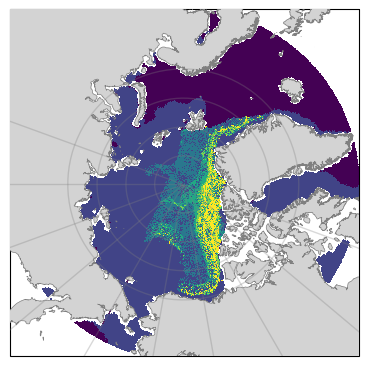

In [5]:
import warnings

    
#============================================
month = '03'
day = '01'

years = np.arange(2003,2023)
#============================================

for yy, YEAR in enumerate(years):
    
    # grab nearest sea ice age data
    date = datetime(YEAR, int(month), int(day), 0, 0)
    
    # ignore runtime warning for re-indexing dates
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        warnings.warn("RuntimeWarning", RuntimeWarning)
        
        lon, lat, age, ice_ds, nearest_date = grab_iceage(date=date, select_date='before', 
                                                          iceage_datapath='/Volumes/Jewell_EasyStore/NSIDC-0611_seaice_age/',
                                                          return_vars=['lon', 'lat', 'age', 'ds', 'selected_date'], mask_flags=True, quiet=False)
        if yy == 0:
            AGE = age
        else:
            AGE =  np.dstack((AGE, age))
            
# convert to floats for later operation
AGE = (AGE.data).astype(np.float64)
AGE[ AGE >= 20 ] = np.nan


# grab nearest sea ice age data
date = datetime(2021, int(month), int(day), 0, 0)
lon, lat, age, ice_ds, nearest_date = grab_iceage(date=date, select_date='nearest',
                                return_vars=['lon', 'lat', 'age', 'ds', 'selected_date'], 
                                mask_flags=True, quiet=False)        
# convert to floats for later operation
age = (age.data).astype(np.float64)
age[ age >= 20 ] = np.nan

# create figure in NorthPolarStereo projection
#---------------------------------------------
map_projection = ccrs.NorthPolarStereo(central_longitude=210)
lat_range = [60, 90]
lon_range = [0, 300]
fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection), 
                       figsize=(4.5,8), facecolor='white')

# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.set_aspect('equal')
ax.spines['geo'].set_edgecolor('k')
add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=17)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=16)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.3, zorder=18)


year = 2020
# ax.scatter(lon[lat>70], lat[lat>70], transform=ccrs.PlateCarree())
ax.pcolormesh(lon, lat, ma.masked_where(lat<60, AGE[:,:,np.where(np.array(years==year))[0][0]]), transform=ccrs.PlateCarree(), vmin=0, vmax=5)


## Import March 1 ice age data

 - select nearest date before 1984-03-01 >>> 1984-02-26
 - select nearest date before 1985-03-01 >>> 1985-02-26
 - select nearest date before 1986-03-01 >>> 1986-02-26
 - select nearest date before 1987-03-01 >>> 1987-02-26
 - select nearest date before 1988-03-01 >>> 1988-02-26
 - select nearest date before 1989-03-01 >>> 1989-02-26
 - select nearest date before 1990-03-01 >>> 1990-02-26
 - select nearest date before 1991-03-01 >>> 1991-02-26
 - select nearest date before 1992-03-01 >>> 1992-02-26
 - select nearest date before 1993-03-01 >>> 1993-02-26
 - select nearest date before 1994-03-01 >>> 1994-02-26
 - select nearest date before 1995-03-01 >>> 1995-02-26
 - select nearest date before 1996-03-01 >>> 1996-02-26
 - select nearest date before 1997-03-01 >>> 1997-02-26
 - select nearest date before 1998-03-01 >>> 1998-02-26
 - select nearest date before 1999-03-01 >>> 1999-02-26
 - select nearest date before 2000-03-01 >>> 2000-02-26
 - select nearest date before 2001-03-01 >>> 200

/Users/mackenziejewell/Documents/GitHub/SIDEx-MYI-transport_rev/./scripts/LIB_iceage_NSIDC0611.py:73: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = ds.indexes['time'].to_datetimeindex()
/opt/anaconda3/envs/geoenvOSU/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


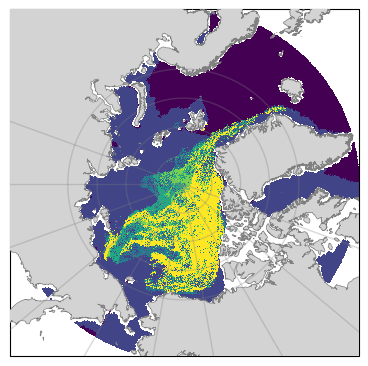

In [342]:
import warnings

    
#============================================
month = '03'
day = '01'

years = np.arange(1984,2023)
#============================================

for yy, YEAR in enumerate(years):
    
    # grab nearest sea ice age data
    date = datetime(YEAR, int(month), int(day), 0, 0)
    
    # ignore runtime warning for re-indexing dates
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        warnings.warn("RuntimeWarning", RuntimeWarning)
        
        lon, lat, age, ice_ds, nearest_date = grab_iceage(date=date, select_date='before', 
                                                          iceage_datapath='/Volumes/Jewell_EasyStore/NSIDC-0611_seaice_age/',
                                                          return_vars=['lon', 'lat', 'age', 'ds', 'selected_date'], mask_flags=True, quiet=False)
        if yy == 0:
            AGE = age
        else:
            AGE =  np.dstack((AGE, age))
            
# convert to floats for later operation
AGE = (AGE.data).astype(np.float64)
AGE[ AGE >= 20 ] = np.nan


# grab nearest sea ice age data
date = datetime(2021, int(month), int(day), 0, 0)
lon, lat, age, ice_ds, nearest_date = grab_iceage(date=date, select_date='nearest',
                                return_vars=['lon', 'lat', 'age', 'ds', 'selected_date'], 
                                mask_flags=True, quiet=False)        
# convert to floats for later operation
age = (age.data).astype(np.float64)
age[ age >= 20 ] = np.nan

# create figure in NorthPolarStereo projection
#---------------------------------------------
map_projection = ccrs.NorthPolarStereo(central_longitude=210)
lat_range = [60, 90]
lon_range = [0, 300]
fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection), 
                       figsize=(4.5,8), facecolor='white')

# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.set_aspect('equal')
ax.spines['geo'].set_edgecolor('k')
add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=17)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=16)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.3, zorder=18)


year = 2000
# ax.scatter(lon[lat>70], lat[lat>70], transform=ccrs.PlateCarree())
ax.pcolormesh(lon, lat, ma.masked_where(lat<60, AGE[:,:,np.where(np.array(years==year))[0][0]]), transform=ccrs.PlateCarree(), vmin=0, vmax=5)


### Import coastal polygon

In [20]:
# coast polygons
ds_mask = xr.open_dataset('./data/coast_mask_regions.nc')
ds_mask.close()
polyR1 = wkt.loads(str(ds_mask.R1_poly_str.values))
polyR2 = wkt.loads(str(ds_mask.R2_poly_str.values))
coast_poly = wkt.loads(str(ds_mask.coast_poly_masked_str.values))

# find indices within coast_poly
poly_indices = within_polygon_indices(coast_poly, lat, lon, quiet=True)


KeyboardInterrupt



In [46]:
poly_mask = np.full(ds.latitude.shape, False)

for ii in range(poly_mask.shape[0]):
    for jj in range(poly_mask.shape[1]):
        if coast_poly.contains(Point(ds.longitude.values[ii,jj], ds.latitude.values[ii,jj])):
            poly_mask[ii, jj] = True

In [ ]:
AGE = (AGE.data).astype(np.float64)
AGE[ AGE >= 20 ] = np.nan

In [48]:
DS

<xarray.Dataset>
Dimensions:         (x: 722, y: 722, time: 18)
Coordinates:
  * x               (x) float32 -4.518e+06 -4.506e+06 ... 4.506e+06 4.518e+06
  * y               (y) float32 -4.518e+06 -4.506e+06 ... 4.506e+06 4.518e+06
  * time            (time) datetime64[ns] 2022-01-01 2022-01-08 ... 2022-04-30
Data variables:
    crs             int32 -2147483647
    age_of_sea_ice  (time, y, x) uint8 ...
    latitude        (y, x) float32 29.8 29.9 29.99 30.08 ... 29.99 29.9 29.8
    longitude       (y, x) float32 -45.0 -44.92 -44.84 ... 135.2 135.1 135.0
Attributes:
    version:       4.1
    release_date:  Jun 2023
    Conventions:   CF-1.4
    dataset_doi:   10.5067/UTAV7490FEPB

In [72]:
SBSage

array([nan, nan, nan, ...,  1.,  1., nan])

<BarContainer object of 18 artists>

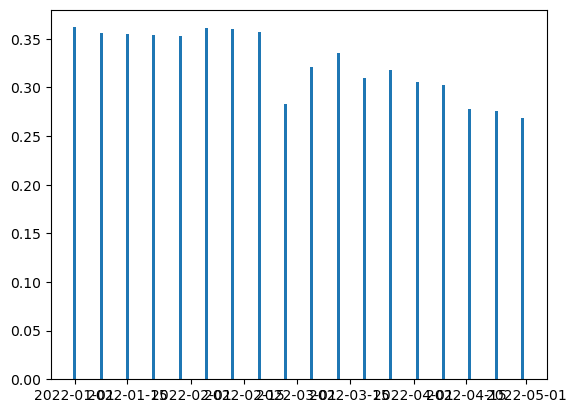

In [74]:
plt.bar(DS.time.values, MYI_areas/total_areas)

### Find MYI fraction within SBS region
MYI is ice of age 2 years or older

In [344]:
MYI_fractions = np.array([])
oldMYI_fractions = np.array([])
ARC_MYI_areas = np.array([])
SBS_MYI_areas = np.array([])

for ii in range(len(years)):
    
    # grab data from given year
    current_age = AGE[:,:,ii]
    
    ARC_ages = current_age[(lat>=60)&(current_age>0)]
    ARC_FYI_area = np.sum(ARC_ages == 1)
    ARC_MYI_area = np.sum(ARC_ages > 1)
    ARC_MYI_areas = np.append(ARC_MYI_areas, ARC_MYI_area)
    
    # find all ages within SBS
    ages_within_poly = np.array([])
    for index in poly_indices:
        ages_within_poly = np.append(ages_within_poly, current_age[index[0], index[1]])

    # find fraction of SBS region covered in MYI
    MYI_area_inSBS = np.nansum(ages_within_poly > 1)
    SBS_MYI_areas = np.append(SBS_MYI_areas, MYI_area_inSBS)
    
    # find fraction of SBS region covered in MYI
    non_nan_area_inSBS = np.sum(np.isnan(ages_within_poly) == False)
    MYI_fractions = np.append(MYI_fractions, MYI_area_inSBS/non_nan_area_inSBS)
    
    
    # find fraction of SBS region covered in MYI 3+
    oldMYI_area_inSBS = np.nansum(ages_within_poly >= 3)
    oldMYI_fractions = np.append(oldMYI_fractions, oldMYI_area_inSBS/non_nan_area_inSBS)
    
# percentage of Arctic MYI in SBS
SBS_MYperc_ARC = 100*SBS_MYI_areas/ARC_MYI_areas

print(f'Percentage of SBS area covered in MYI\n - 1984-2022 average: {100*np.nanmean(MYI_fractions):.1f}%')
print(f' - 2021: {100*MYI_fractions[np.where(years == 2021)[0][0]]:.1f}%')
print(f'>>> SBS MYI fraction in 2021 was {MYI_fractions[np.where(years == 2021)[0][0]]/np.nanmean(MYI_fractions):.2f}X greater than average')


Percentage of SBS area covered in MYI
 - 1984-2022 average: 34.0%
 - 2021: 56.6%
>>> SBS MYI fraction in 2021 was 1.66X greater than average


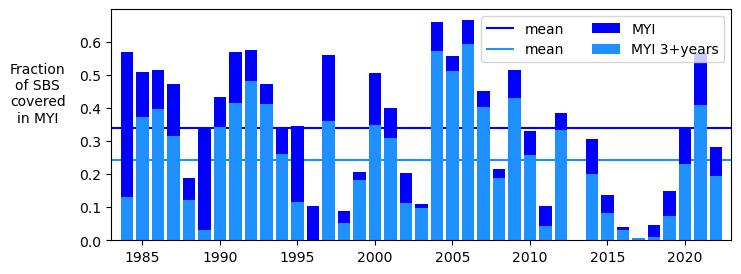

In [345]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set_xlim(1983,2023)
ax.set_ylabel('Fraction\nof SBS\ncovered\nin MYI', rotation=0, labelpad=30)
ax.bar(years, MYI_fractions, label='MYI', color='blue')
ax.bar(years, oldMYI_fractions, label='MYI 3+years', color='dodgerblue')
ax.hlines(np.nanmean(MYI_fractions), years[0]-1,years[-1]+1, label='mean', color='blue', zorder=-1)
ax.hlines(np.nanmean(oldMYI_fractions), years[0]-1,years[-1]+1, label='mean', color='dodgerblue', zorder=-1)
plt.legend(ncol=2);

### Plot

99th percentile: 5.1
median: 2.1
mean +- std: 2.0 +- 1.2
2021: 5.5

2021: 2.9 std above the mean



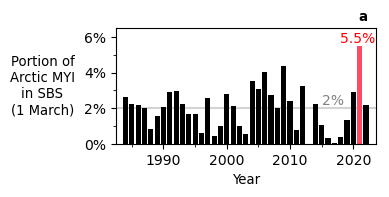

linear regression:
 LinregressResult(slope=0.0007865686670519732, intercept=0.42767425839089857, rvalue=0.007253130951954837, pvalue=0.9650458202698295, stderr=0.017827844516831646, intercept_stderr=35.70973626561998)


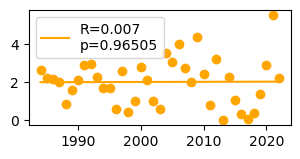

In [12]:
FS = 9.5

fig, ax = plt.subplots(figsize=(3.35,1.5))

# label panel
ax.text(0.95, 1.1, 'a', fontsize=FS, weight='bold', 
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, zorder=100)

ax.set_ylim(0,6.5)
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.set_ylabel('Portion of\nArctic MYI\nin SBS\n(1 March)', rotation=0, fontsize=FS, 
              labelpad=30, verticalalignment='center')
ax.yaxis.set_major_formatter('{x:.0f}%')

ax.set_xlim(1982.5,2023.5)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.set_xlabel('Year', rotation=0, fontsize=FS)

# ax.set_xticks(np.arange(1990,2021,5))
# ax.set_xticklabels(np.arange(1990,2021,5), fontsize=FS,)


ax.bar(years, SBS_MYperc_ARC, color='k')
ax.bar(2021, SBS_MYperc_ARC[-2], color=[255/255, 75/255, 100/255])

# ax.hlines(np.percentile(SBS_MYperc_ARC,99),  ax.get_xlim()[0], ax.get_xlim()[-1], 
#           colors='lightgray',linewidths=1, linestyles='dashed', zorder=-1)
# ax.text(1985, 1.05*np.percentile(SBS_MYperc_ARC,99), f'99th percentile', c='gray',
#         horizontalalignment='left')

ax.text(2015, 1.1*np.mean(SBS_MYperc_ARC), f'{np.mean(SBS_MYperc_ARC):.0f}%', c='gray',
        horizontalalignment='left')
ax.hlines(np.mean(SBS_MYperc_ARC),  ax.get_xlim()[0], ax.get_xlim()[-1], 
          colors='lightgray',linewidths=1.5, linestyles='solid', zorder=-1)
# ax.fill_between(np.linspace(ax.get_xlim()[0], ax.get_xlim()[-1],10),  
#                 np.mean(SBS_MYperc_ARC)-np.std(SBS_MYperc_ARC), np.mean(SBS_MYperc_ARC)+np.std(SBS_MYperc_ARC), 
#                 color='lightgray',linewidths=0, alpha=0.25,  linestyles='solid', zorder=-1)



ax.text(2021, 1.03*SBS_MYperc_ARC[np.where(years==2021)[0][0]], f'{SBS_MYperc_ARC[np.where(years==2021)[0][0]]:.1f}% ', c='r',
        horizontalalignment='center')

# ax.hlines(np.percentile(SBS_MYperc_ARC,50),  ax.get_xlim()[0], ax.get_xlim()[-1], 
#           colors='lightgray',linewidths=1, linestyles='dashed', zorder=-1)

# ax.hlines(np.mean(SBS_MYperc_ARC),  ax.get_xlim()[0], ax.get_xlim()[-1], 
#           colors=[0.7,0.7,0.7],linewidths=1, linestyles='dashed', zorder=-1)

# ax.text(2021, 1.05*SBS_MYperc_ARC[np.where(years==2021)[0][0]], f'{SBS_MYperc_ARC[np.where(years==2021)[0][0]]:.1f}%', c='r',
#         horizontalalignment='center')

# ax.text(2013, 1.2*np.mean(SBS_MYperc_ARC), f'{np.mean(SBS_MYperc_ARC):.1f}%', c='gray',
#         horizontalalignment='left')

print(f'99th percentile: {np.percentile(SBS_MYperc_ARC,99):.1f}')
print(f'median: {np.percentile(SBS_MYperc_ARC,50):.1f}')
print(f'mean +- std: {np.mean(SBS_MYperc_ARC):.1f} +- {np.std(SBS_MYperc_ARC):.1f}')
print(f'2021: {SBS_MYperc_ARC[np.where(years==2021)[0][0]]:.1f}\n')
print(f'2021: {(SBS_MYperc_ARC[np.where(years==2021)[0][0]] - np.mean(SBS_MYperc_ARC))/np.std(SBS_MYperc_ARC):.1f} std above the mean\n')

# save image
#-----------
# saveimage = './figures/KeyFigs/FigH/ArcticMYI_v_time_v3.png'
# if saveimage != False:
#     print(f'Saving image as >>> {saveimage}')
#     fig.savefig(saveimage, transparent=True, bbox_inches="tight", pad_inches = 0.05, dpi=300)


plt.show()

import scipy.stats

X1 = years
X2 = 100*SBS_MYI_areas/ARC_MYI_areas

fig, ax = plt.subplots(figsize=(3.385,1.5))
result = scipy.stats.linregress(X1, X2)
print(f'linear regression:\n', result)
ax.plot(X1, result.intercept + result.slope * X1, linestyle='solid', c='orange', label=f'R={result.rvalue:.3f}\np={result.pvalue:.5f}')
ax.scatter(X1, X2, c='orange')
ax.legend()
plt.show()



In [13]:
def map_background(ax):
    lat_range = [67.75, 90]
    lon_range = [184, 232]
    ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
    ax.set_aspect('equal')
    ax.spines['geo'].set_edgecolor('k')
    ax.spines['geo'].set_facecolor('lightgray')
    add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=17)
    add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=16)
    add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,360,20), linewidth=0.5, color=[0.55,0.55,0.55], alpha=1, zorder=18)
    
    #/////////////
    # polygons //
    #/////////////////////////////////////////////////////////////////////////////////////////////
    # plot ice-side edges of polygon only
    xx, yy = coast_poly.exterior.coords.xy
    poly_lon = xx.tolist()
    poly_lat = yy.tolist()
    ax.plot(poly_lon[:-36], poly_lat[:-36], 
            c='k', linestyle='dashed', alpha=1, lw=1,  transform= ccrs.PlateCarree(), zorder=18)
    ax.plot(poly_lon[-10:], poly_lat[-10:], 
            c='k', linestyle='dashed', alpha=1, lw=1,  transform= ccrs.PlateCarree(), zorder=18)
    #/////////////////////////////////////////////////////////////////////////////////////////////
    
def label_seas(ax):
    ax.text(225, 84, 'Central\nArctic', fontsize=FS, weight='normal', color='k',
            horizontalalignment='center', transform = ccrs.PlateCarree(), zorder=100)
    ax.text(218, 75.75, 'Beaufort\nSea', fontsize=FS, weight='normal', color='k',
            horizontalalignment='center', transform = ccrs.PlateCarree(), zorder=100)
    ax.text(192, 71.25, 'Chukchi\nSea', fontsize=FS, weight='normal', color='k',
            horizontalalignment='center', transform = ccrs.PlateCarree(), zorder=100)
    ax.text(209.5, 68.25, 'Alaska', fontsize=FS, weight='normal', color='gray',
            horizontalalignment='center', transform = ccrs.PlateCarree(), zorder=100)

def label_SBS(ax):
    ax.text(226, 72, 'SBS', fontsize=FS+1, weight='normal', color='k',
        horizontalalignment='center', transform = ccrs.PlateCarree(), zorder=100)

    
def plot_MYI(ax, iceage):
    bounds = [0.5, 1.5, 2.5, 3.5]
    norm = matplotlib.colors.BoundaryNorm(bounds, len(bounds)-1)
#     color_map1 = [[89/255,160/255,206/255], [186/255,216/255,232/255], [245/255,245/255,255/255]]
    color_map1 = [[100/255,170/255,216/255], [195/255,226/255,242/255], [245/255,245/255,255/255]]
    color_map = matplotlib.colors.ListedColormap(color_map1) 
    ice_age = ax.pcolormesh(lon, lat, ma.masked_where(lon<110, iceage),
              cmap = color_map, norm = norm, zorder=3, transform=ccrs.PlateCarree())
    return ice_age

def label_panel(ax, x, y, label, FS):
    # label panel
    ax.text(x, y, label, fontsize=FS, weight='bold', 
            horizontalalignment='left', verticalalignment='top', transform = ax.transAxes, zorder=100)

def panel_title(ax, x, y, label, FS, color='k'):
    ax.text(x, y, label, fontsize=FS, weight='bold', color=color,
            horizontalalignment='right', verticalalignment='bottom', transform = ax.transAxes, zorder=100)
    



### Manuscript version

/opt/anaconda3/envs/geoenvOSU/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


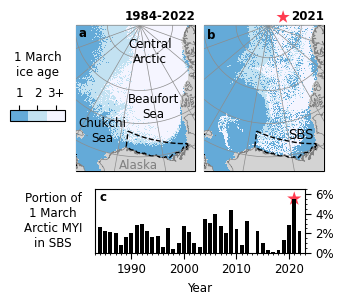

In [14]:

FS = 8.5
fig = plt.figure(figsize=(3.2,4.5))
gs = fig.add_gridspec(2,5, height_ratios=[6,1], width_ratios = [1.5,7,1,7,1.5])
map_projection = ccrs.NorthPolarStereo(central_longitude=210)


# top panel, 1984-2022 median
#----------------------------
ax1 = fig.add_subplot(gs[0,0:2], projection=map_projection)
ax = ax1

map_background(ax)
label_seas(ax)
label_panel(ax, 0.025, 0.985, 'a', FS)
panel_title(ax, 1, 1.015, '1984-2022', FS, color='k')


ice_age = plot_MYI(ax, np.nanmedian(AGE[:,:,:], axis=2))

add_colorbar(fig, ax, [ice_age], cb_placement='top', cb_orientation='auto', cb_width=0.025, 
             cb_length_fraction=[-0.6, -0.1], cb_pad=-0.325, cb_ticks=[1,2,3], cb_ticklabels=[1,2,'3+'],
#              cb_length_fraction=[0.5, 0.9], cb_pad=0.025, cb_ticks=[1,2,3], cb_ticklabels=[1,2,'3+'],
             cb_extend='neither', cb_label='1 March\nice age', labelpad=8, cb_label_placement='auto', 
             cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])


# middle panel, 2021 median
#----------------------------
ax2 = fig.add_subplot(gs[0,3:], projection=map_projection)
ax = ax2

map_background(ax)
label_SBS(ax)
label_panel(ax, 0.025, 0.975, 'b', FS)
panel_title(ax, 1, 1.015, '2021', FS, color='k')
ax.scatter(0.66, 1.055, marker='*', s=100, color=[255/255, 60/255, 80/255], 
           clip_on=False, edgecolor='None', transform=ax.transAxes)

age_2021 = AGE[:,:,np.where(years==2021)[0][0]]
ice_age = plot_MYI(ax, age_2021)
    


# plot SBS fraction over time
#----------------------------
ax3 = fig.add_subplot(gs[1,1:-1])
ax = ax3
label_panel(ax, 0.025, 0.975, 'c', FS)


ax.set_ylim(0,6.5)
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.set_ylabel('Portion of\n1 March\nArctic MYI\nin SBS', rotation=0, fontsize=FS, labelpad=30, verticalalignment='center')
ax.yaxis.set_major_formatter('{x:.0f}%')
ax.yaxis.tick_right()


ax.set_xlim(1983,2023)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.tick_params(which='major', length=4, labelsize=FS)
ax.tick_params(which='minor', length=1.5, labelsize=FS)
ax.set_xlabel('Year', rotation=0, fontsize=FS)

# ax.bar(years, SBS_MYperc_ARC, color='k')
# ax.bar(2021, SBS_MYperc_ARC[-2], color=[255/255, 60/255, 80/255])

ax.bar(years, SBS_MYperc_ARC, color='k', width=0.75)
ax.scatter(2021, SBS_MYperc_ARC[-2], marker='*', s=115, color=[255/255, 60/255, 80/255], edgecolor='None', zorder=-1)


gs.update(wspace=-0.05, hspace=-0.45)

# save figure
# ------------   
# savename = f"./figures/KeyFigs/FigH/Fig01_v2.png"
# print(f'>>> save as: {savename}')
# fig.savefig(savename, 
#             transparent=False, bbox_inches="tight", pad_inches = 0.025, dpi=300)


### Presentation version

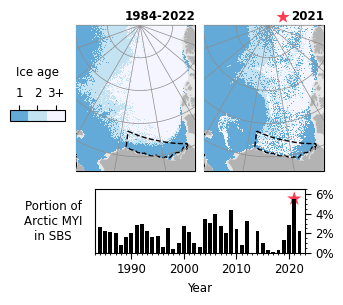

In [15]:
FS = 8.5
fig = plt.figure(figsize=(3.2,4.5))
gs = fig.add_gridspec(2,5, height_ratios=[6,1], width_ratios = [1.5,7,1,7,1.5])
map_projection = ccrs.NorthPolarStereo(central_longitude=210)


def map_background(ax):
    lat_range = [67.75, 90]
    lon_range = [184, 232]
    ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
    ax.set_aspect('equal')
    ax.spines['geo'].set_edgecolor('k')
    ax.spines['geo'].set_facecolor([0.9,0.9,0.9])
#     add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=17)
    add_land(ax,  scale='50m', color=[0.7,0.7,0.7], alpha=1, fill_dateline_gap=True, zorder=16)
    add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,360,20), linewidth=0.5, color=[0.55,0.55,0.55], alpha=1, zorder=18)
    
    #/////////////
    # polygons //
    #/////////////////////////////////////////////////////////////////////////////////////////////
    # plot ice-side edges of polygon only
    xx, yy = coast_poly.exterior.coords.xy
    poly_lon = xx.tolist()
    poly_lat = yy.tolist()
    ax.plot(poly_lon[:-36], poly_lat[:-36], 
            c='k', linestyle='dashed', alpha=1, lw=1,  transform= ccrs.PlateCarree(), zorder=18)
    ax.plot(poly_lon[-10:], poly_lat[-10:], 
            c='k', linestyle='dashed', alpha=1, lw=1,  transform= ccrs.PlateCarree(), zorder=18)
    #/////////////////////////////////////////////////////////////////////////////////////////////
    
    
    
# top panel, 1984-2022 median
#----------------------------
ax1 = fig.add_subplot(gs[0,0:2], projection=map_projection)
ax = ax1

map_background(ax)
panel_title(ax, 1, 1.015, '1984-2022', FS, color='k')


ice_age = plot_MYI(ax, np.nanmedian(AGE[:,:,:], axis=2))

add_colorbar(fig, ax, [ice_age], cb_placement='top', cb_orientation='auto', cb_width=0.025, 
             cb_length_fraction=[-0.6, -0.1], cb_pad=-0.325, cb_ticks=[1,2,3], cb_ticklabels=[1,2,'3+'],
#              cb_length_fraction=[0.5, 0.9], cb_pad=0.025, cb_ticks=[1,2,3], cb_ticklabels=[1,2,'3+'],
             cb_extend='neither', cb_label='Ice age', labelpad=8, cb_label_placement='auto', 
             cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])


# middle panel, 2021 median
#----------------------------
ax2 = fig.add_subplot(gs[0,3:], projection=map_projection)
ax = ax2

map_background(ax)
panel_title(ax, 1, 1.015, '2021', FS, color='k')
ax.scatter(0.66, 1.055, marker='*', s=100, color=[255/255, 60/255, 80/255], 
           clip_on=False, edgecolor='None', transform=ax.transAxes)

age_2021 = AGE[:,:,np.where(years==2021)[0][0]]
ice_age = plot_MYI(ax, age_2021)
    


# plot SBS fraction over time
#----------------------------
ax3 = fig.add_subplot(gs[1,1:-1])
ax = ax3


ax.set_ylim(0,6.5)
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.set_ylabel('Portion of\nArctic MYI\nin SBS', rotation=0, fontsize=FS, labelpad=30, verticalalignment='center')
ax.yaxis.set_major_formatter('{x:.0f}%')
ax.yaxis.tick_right()


ax.set_xlim(1983,2023)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.tick_params(which='major', length=4, labelsize=FS)
ax.tick_params(which='minor', length=1.5, labelsize=FS)
ax.set_xlabel('Year', rotation=0, fontsize=FS)

# ax.bar(years, SBS_MYperc_ARC, color='k')
# ax.bar(2021, SBS_MYperc_ARC[-2], color=[255/255, 60/255, 80/255])

ax.bar(years, SBS_MYperc_ARC, color='k', width=0.75)
ax.scatter(2021, SBS_MYperc_ARC[-2], marker='*', s=115, color=[255/255, 60/255, 80/255], edgecolor='None', zorder=-1)


gs.update(wspace=-0.05, hspace=-0.45)

# save figure
# ------------   
# savename = f"/Users/mackenziejewell/Desktop/Fig01_v2.png"
# print(f'>>> save as: {savename}')
# fig.savefig(savename, 
#             transparent=False, bbox_inches="tight", pad_inches = 0.025, dpi=300)

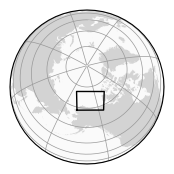

In [16]:
# map_projection = ccrs.NorthPolarStereo(central_longitude=205)
map_projection2 = ccrs.NearsidePerspective(central_longitude=210, 
                                          central_latitude=80, 
                                           
                                          satellite_height=8000000)
# map_projection = ccrs.Orthographic(central_longitude=205.0, central_latitude=80)

fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection2),figsize=(2,2))
ax.set_global()
# ax.background_patch.set_facecolor('white')
# ax.background_patch.set_facecolor('white')

# lat_range = [69, 80]
# lon_range = [195, 232]
# set map extent, add grid and geo features
#------------------------------------------
# ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())

# add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=6)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=1)
add_grid(ax, lats=np.arange(0,90,10), lons=np.arange(0,360,45), linewidth=0.5, color=[0.6,0.6,0.6], alpha=1, zorder=2)

map_projection = ccrs.NorthPolarStereo(central_longitude=210)
wide_extent = (-546375.2620637438, 909868.0432746647, -2366611.265934788, -1351863.133394557)

ax.plot([wide_extent[0],wide_extent[0],wide_extent[1],wide_extent[1],wide_extent[0]], 
        [wide_extent[2],wide_extent[3],wide_extent[3],wide_extent[2],wide_extent[2]], 
        c='k', lw=1, alpha=1, transform = map_projection, 
        zorder=3)

ax.imshow(np.tile(np.array([[[250, 250, 250]]], 
          dtype=np.uint8), [2, 2, 1]),
          origin='upper',
          transform=ccrs.PlateCarree(), extent=[-180,180, -180, 180])

# save figure
# ------------   
# savename = f"/Users/mackenziejewell/Desktop/zoom.png"
# print(f'>>> save as: {savename}')
# fig.savefig(savename, 
#             transparent=True, bbox_inches="tight", pad_inches = 0.1, dpi=300)


### Find MYI fraction within SBS region across all years and months

In [17]:

MYI_fractions = np.array([])
ARC_MYI_areas = np.array([])
SBS_MYI_areas = np.array([])
all_dates = np.array([])

years = np.arange(1984,2023)

# grab data form given year
for year in years:
    
    print(year)
    
    # ignore runtime warning for re-indexing dates
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        warnings.warn("RuntimeWarning", RuntimeWarning)
        
        ds_age = xr.open_dataset(f'/Volumes/Jewell_EasyStore/NSIDC-0611_seaice_age/iceage_nh_12.5km_{year}0101_{year}1231_v4.1.nc')
        ds_age.close()
        datetimeindex = ds_age.indexes['time'].to_datetimeindex()
        ds_age['time'] = datetimeindex

        # for each week in time series, grab sea ice age
        for time in ds_age.time:

            all_dates = np.append(all_dates, pd.to_datetime(time.data))
            ds_spec = ds_age.sel(time=time)
            age = ds_spec.age_of_sea_ice.values
            lat = ds_spec.latitude.values
            lon = ds_spec.longitude.values

            current_age = (age).astype(np.float64)
            current_age[ current_age >= 20 ] = np.nan

            # find ice age fractions in whole Arctic
            ARC_ages = current_age[(lat>=60)&(current_age>0)]
            ARC_FYI_area = np.sum(ARC_ages == 1)
            ARC_MYI_area = np.sum(ARC_ages > 1)
            ARC_MYI_areas = np.append(ARC_MYI_areas, ARC_MYI_area)

            # find all ages within SBS
            ages_within_poly = np.array([])
            for index in poly_indices:
                ages_within_poly = np.append(ages_within_poly, current_age[index[0], index[1]])

            # find fraction of SBS region covered in MYI
            MYI_area = np.nansum(ages_within_poly > 1)
            SBS_MYI_areas = np.append(SBS_MYI_areas, MYI_area)

            non_nan_area = np.sum(np.isnan(ages_within_poly) == False)
            MYI_fractions = np.append(MYI_fractions, MYI_area/non_nan_area)


# percentage of Arctic MYI in SBS
SBS_MYperc_ARC = 100*SBS_MYI_areas/ARC_MYI_areas


1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


### Plot

max value of 5.6%, occuring on 2009-05-07 00:00:00, is 3.45 STDs above the mean of 1.5%


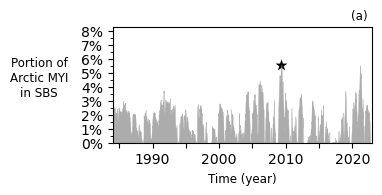

linear regression:
 LinregressResult(slope=-0.0001737966276185716, intercept=1.7158015509952083, rvalue=-0.08751291897991598, pvalue=7.942111568548463e-05, stderr=4.3952140388293806e-05, intercept_stderr=0.05144304978542288)


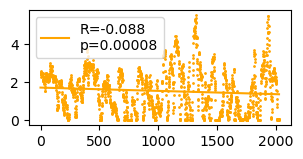

In [18]:
from pandas import Timestamp


max_value = np.max(SBS_MYperc_ARC)
date_of_max = all_dates[np.where(SBS_MYperc_ARC==max_value)[0][0]]
mean_frac = np.mean(SBS_MYperc_ARC)
std_frac = np.std(SBS_MYperc_ARC)
STDs_above_mean = (max_value - mean_frac)/std_frac
print(f'max value of {max_value:.1f}%, occuring on {date_of_max}, is {STDs_above_mean:.2f} STDs above the mean of {mean_frac:.1f}%')



fig, ax = plt.subplots(figsize=(3.35,1.5))

# label panel
ax.text(0.95, 1.1, '(a)', fontsize=FS, weight='normal', 
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, zorder=100)

ax.set_ylim(0,8.25)
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.set_ylabel('Portion of\nArctic MYI\nin SBS\n', rotation=0, fontsize=FS, 
              labelpad=30, verticalalignment='center')
ax.yaxis.set_major_formatter('{x:.0f}%')

ax.set_xlim(Timestamp('1984-01-01 00:00:00'),Timestamp('2022-12-24 00:00:00'))
ax.set_xticks([Timestamp(f'{year}-01-01 00:00:00') for year in np.arange(1985,2021,5)])
tick_labels = np.array([f'{year}' for year in np.arange(1985,2021,5)])
tick_labels[::2] =''
ax.set_xticklabels(tick_labels)
# ax.xaxis.set_major_locator(plt.MultipleLocator(10))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.set_xlabel('Time (year)', rotation=0, fontsize=FS)

text_color = 'k'#'red'
text_alpha = 1#0.7
bar_color = [0.675,0.675,0.675]
ax.fill_between(all_dates, 0, SBS_MYperc_ARC, lw=0.25, color=bar_color)
# ax.bar(all_dates, SBS_MYperc_ARC, width=all_dates[1]-all_dates[0], color=bar_color)
ax.scatter(date_of_max, max_value, color=text_color, marker='*', s=80, lw=0,alpha=text_alpha, zorder=-1)
# ax.text(date_of_max, 0.1+max_value, '1 March, 2021  ', alpha=text_alpha,verticalalignment='center', 
#         horizontalalignment='right', c= text_color, size=FS, weight='normal', zorder=2)

# ax.hlines(np.mean(SBS_MYperc_ARC),  ax.get_xlim()[0], ax.get_xlim()[-1], 
#           colors=[0.7,0.7,0.7],linewidths=1, linestyles='solid', zorder=-1)
# ax.vlines(date_of_max, 0, max_value, colors='k',linewidths=1, linestyles='solid', zorder=1)


# save image
#-----------
# saveimage = './figures/KeyFigs/FigH/ArcticMYI_v_time_v2.png'
# if saveimage != False:
#     print(f'Saving image as >>> {saveimage}')
#     fig.savefig(saveimage, transparent=True, bbox_inches="tight", pad_inches = 0.05, dpi=300)


plt.show()

import scipy.stats

X1 = np.arange(len(all_dates))
X2 = SBS_MYperc_ARC

fig, ax = plt.subplots(figsize=(3.385,1.5))
result = scipy.stats.linregress(X1, X2)
print(f'linear regression:\n', result)
ax.plot(X1, result.intercept + result.slope * X1, linestyle='solid', c='orange', label=f'R={result.rvalue:.3f}\np={result.pvalue:.5f}')
ax.scatter(X1, X2, s=1, c='orange')
ax.legend()
plt.show()



## check for linear trend in sea ice age

wind:
 LinregressResult(slope=-0.19777327935222674, intercept=402.7296221322538, rvalue=-0.5479973343651079, pvalue=0.0003047675474784276, stderr=0.049629958161036825, intercept_stderr=99.41037544562042)


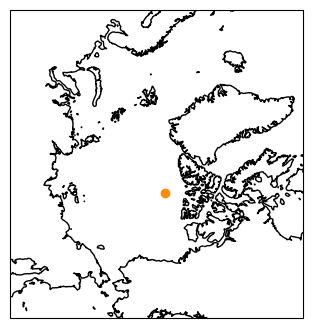

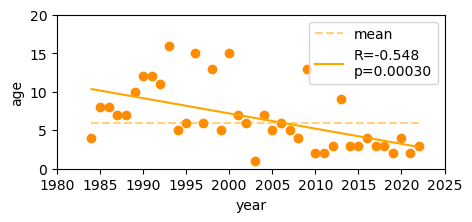

In [19]:
import scipy.stats

# for single point
#=================

#-----------------
X1 = years
X2 = AGE[400, 300]
#-----------------

# create figure
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=205)),
                       figsize=(4,4), facecolor='white')
ax.set_extent([150, 360, 60, 90], crs=ccrs.PlateCarree())  
ax.coastlines()
ax.scatter(lon[400,300], lat[400,300], c='darkorange', transform=ccrs.PlateCarree())

# create figure
fig, ax = plt.subplots(figsize=(5,2))
ax.set_ylabel('age')
ax.set_ylim(0,20)
ax.set_xlabel('year')
ax.set_xlim(1980,2025)

# plot original points
ax.scatter(X1, X2, c='darkorange')

# plot mean values
ax.plot(X1, np.full_like(X1, np.mean(X2)), linestyle='dashed', c='orange', alpha=0.5,label=f'mean')

# plot linear regressions
result2 = scipy.stats.linregress(X1, X2)
print(f'wind:\n', result2)
ax.plot(X1, result2.intercept + result2.slope * X1, linestyle='solid', c='orange', label=f'R={result2.rvalue:.3f}\np={result2.pvalue:.5f}')

ax.legend(bbox_to_anchor=(1,1));


# for full grid
#===============
slope_ = np.zeros(np.shape(AGE[:,:,0]))
intercept_ = np.zeros(np.shape(AGE[:,:,0]))
rvalue_ = np.zeros(np.shape(AGE[:,:,0]))
pvalue_ = np.zeros(np.shape(AGE[:,:,0]))
stderr_ = np.zeros(np.shape(AGE[:,:,0]))
intercept_stderr_ = np.zeros(np.shape(AGE[:,:,0]))


for ii in range(np.shape(slope_)[0]):
    for jj in range(np.shape(slope_)[1]):
        
        # assign data
        X1 = years
        X2 = AGE[ii,jj]
        
        # perform linear regression
        result = scipy.stats.linregress(X1, X2)
        
        # save to arrays
        slope_[ii,jj] = result.slope
        intercept_[ii,jj] = result.intercept
        rvalue_[ii,jj] = result.rvalue
        pvalue_[ii,jj] = result.pvalue
        stderr_[ii,jj] = result.stderr
        intercept_stderr_[ii,jj] = result.intercept_stderr

trend_age = intercept_ + slope_*2021
plt.pcolormesh(age-trend_age, vmin=-5, vmax=5, cmap='RdBu_r')

# Import data

In [11]:

#================================================================
# Data sources of climatological data
Clim_ERA5 = f'/Volumes/Jewell_EasyStore/SIDEx/OverviewData/mean_ERA5_Mar-Apr_2021.nc'
Clim_PPD  = f'/Volumes/Jewell_EasyStore/SIDEx/OverviewData/mean_PPdrift_Mar-Apr_2021.nc'
#================================================================

# open ERA5 data
#---------------
ds_ERA5 = xr.open_dataset(Clim_ERA5)
ds_ERA5.close()
lon_wind, lat_wind = ds_ERA5.longitude.values, ds_ERA5.latitude.values
longrid_wind, latgrid_wind = np.meshgrid(lon_wind, lat_wind)
u10_clim = ds_ERA5.u10.values
v10_clim = ds_ERA5.v10.values
msl_clim = ds_ERA5.msl.values/100
wind_sp_clim = ds_ERA5.speed10.values


# //////////////////
# sea ice drift //
#/////////////////////////////////////////////////////////////////////////////////////////////
        
# open NSIDC-derived drift data
#------------------------------
ds_PPD = xr.open_dataset(Clim_PPD)
ds_PPD.close()
longrid_ice = ds_PPD.longitude.values
latgrid_ice = ds_PPD.latitude.values
u_ice = ds_PPD.u.values
v_ice = ds_PPD.v.values

## Plot March and April drift

Text(-0.05, 0.95, '$\\mathrm{80^{\\circ}N}$')

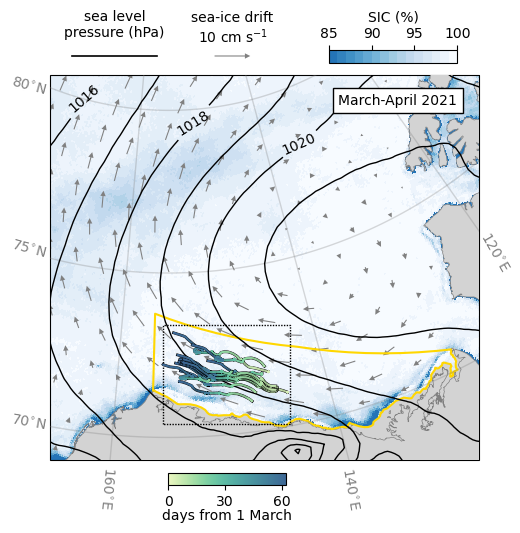

In [13]:
#================================================================
# fontsize plot-wide
FS = 10
#================================================================

# ignore warnings about shading style with pcolormesh
warnings.filterwarnings("ignore")

#/////////////////
# start figure //
#/////////////////////////////////////////////////////////////////////////////////////////////

# create figure in NorthPolarStereo projection
#---------------------------------------------
map_projection = ccrs.NorthPolarStereo(central_longitude=205)
lat_range = [69, 80]
lon_range = [195, 232]
fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection),figsize=(10,5), facecolor='white')
plt.subplots_adjust(wspace=0.05, hspace=0)

# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.set_aspect('equal')
ax.spines['geo'].set_edgecolor('k')
add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=4)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=3)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.3, zorder=10)


#///////////////////////////
# atmospheric conditions //
#/////////////////////////////////////////////////////////////////////////////////////////////

# open ERA5 data
#---------------
ds_ERA5 = xr.open_dataset(Clim_ERA5)
ds_ERA5.close()
lon_wind, lat_wind = ds_ERA5.longitude.values, ds_ERA5.latitude.values
longrid_wind, latgrid_wind = np.meshgrid(lon_wind, lat_wind)
u10_clim = ds_ERA5.u10.values
v10_clim = ds_ERA5.v10.values
msl_clim = ds_ERA5.msl.values/100
wind_sp_clim = ds_ERA5.speed10.values

# msl contours
#-------------
CS = ax.contour(longrid_wind, latgrid_wind, msl_clim, levels = np.arange(1000,1060,1), 
                linewidths=1,
                colors='k', zorder=15, transform=ccrs.PlateCarree())

# label contours with manual labels 
x_labels = np.array([180,190,200,210,218,225,230])[1::2]
y_labels = np.array([80,80,80,79,79,78,75])[1::2]
Coords = map_projection.transform_points(ccrs.PlateCarree(), x_labels, y_labels)
manual_points=[]
for spot in Coords[:,0:2]:
    manual_points.append((spot[0],spot[1]))
ax.clabel(CS, CS.levels, inline=True, 
          inline_spacing=15, 
          fontsize=FS, manual=manual_points)

# msl contour legend
#-------------------
ax.text(0.15, 1.1, 'sea level\npressure (hPa)', fontsize=FS, weight='normal', 
            horizontalalignment='center', transform = ax.transAxes, zorder=100)
ax.plot([0.05,0.25], [1.05,1.05], clip_on=False, c='k', lw = 1.2, transform = ax.transAxes, zorder=100)

            
# //////////////////
# sea ice drift //
#/////////////////////////////////////////////////////////////////////////////////////////////
        
# open NSIDC-derived drift data
#------------------------------
ds_PPD = xr.open_dataset(Clim_PPD)
ds_PPD.close()
longrid_ice = ds_PPD.longitude.values
latgrid_ice = ds_PPD.latitude.values
u_ice = ds_PPD.u.values
v_ice = ds_PPD.v.values

# plot ice drift vectors
#-----------------------  
sp = 4
icevec = ax.quiver(longrid_ice[::sp,::sp], latgrid_ice[::sp,::sp], 
                   *fix_cartopy_vectors(u_ice[::sp,::sp], v_ice[::sp,::sp], latgrid_ice[::sp,::sp]),
                   color=[0.5,0.5,0.5], width=0.0025, headwidth=5, headlength=5, headaxislength=5,
                   scale=120, transform=ccrs.PlateCarree())
key = ax.quiverkey(icevec, X=0.425, Y=1.05, U=10, label = 'sea-ice drift\n10 $\mathrm{cm\;{s}^{-1}}$', labelpos='N', fontproperties={'size':FS}, transform=ccrs.PlateCarree())
key.set(zorder = 100)
#/////////////////////////////////////////////////////////////////////////////////////////////

#////////
# SIC //
#/////////////////////////////////////////////////////////////////////////////////////////////
icecmap = mpl.cm.Blues(np.linspace(0,1,20))              # cropped cmap
icecmap = mpl.colors.ListedColormap(icecmap[:-5,:-1][::-1]) # cropped cmap
sp = 1
sicc = ax.pcolormesh(lon_sic[::sp,::sp], lat_sic[::sp,::sp], ma.masked_where(mean_sic[::sp,::sp]>100, mean_sic[::sp,::sp]), 
              vmin = 85, vmax = 100, cmap=icecmap, zorder=0, transform=ccrs.PlateCarree())


add_colorbar(fig, ax, [sicc], cb_placement='top', cb_orientation='auto', cb_width=0.025, 
             cb_length_fraction=[0.65, 0.95], cb_pad=0.025, cb_ticks=[85,90,95,100], cb_ticklabels='auto',
             cb_extend='neither', cb_label='SIC (%)', labelpad='auto', cb_label_placement='auto', 
             cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])
#/////////////////////////////////////////////////////////////////////////////////////////////


#/////////////
# polygons //
#/////////////////////////////////////////////////////////////////////////////////////////////
# outline midsize region
# mid_extent = (119529.81308291278,338626.4456992191,-2137069.862989996,-1933304.0340635064)
mid_extent = (-19285.12590976479, 421676.5635386811, -2209856.5455738585, -1865956.2481513508)

ax.plot([mid_extent[0],mid_extent[0],mid_extent[1],mid_extent[1],mid_extent[0]], 
        [mid_extent[2],mid_extent[3],mid_extent[3],mid_extent[2],mid_extent[2]], 
        c='k', 
#         ls='dotted',
        dashes=[1,1],
        lw=1, alpha=1,zorder=11)

# coast polygons
ax.add_geometries([coast_poly], edgecolor='gold', linestyle='solid', facecolor='none',
                  alpha=1, lw=1.5,  crs= ccrs.PlateCarree(), zorder=10)
ax.add_geometries([polyR1], edgecolor='None', facecolor='lightgray',alpha=1, crs= ccrs.PlateCarree(), zorder=3)
ax.add_geometries([polyR2], edgecolor='None', facecolor='lightgray',alpha=1, crs= ccrs.PlateCarree(), zorder=3)
#/////////////////////////////////////////////////////////////////////////////////////////////


#//////////
# buoys //
#/////////////////////////////////////////////////////////////////////////////////////////////
# March-April drift tracks
#-------------------------
lightcmap = cmocean.tools.crop_by_percent(cmocean.cm.deep, 35, which='max', N=None)
lightcmap = cmocean.tools.crop_by_percent(lightcmap, 5, which='min', N=None)

for buoy in ds.buoyID.values:
    sp=5
    ax.plot(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp], 
               ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp],
               c='k', lw=2, transform=ccrs.PlateCarree(),zorder=15)
    buoytrack = ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp], 
               ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp],
               c=days_since_TI[::sp], s=0.1, vmin=0, vmax=days_since_TI[-1], 
               cmap=lightcmap, transform=ccrs.PlateCarree(),zorder=15)
#/////////////////////////////////////////////////////////////////////////////////////////////

add_colorbar(fig, ax, [buoytrack], cb_placement='bottom', cb_orientation='auto', cb_width=0.025, 
             cb_length_fraction=[0.275, 0.55], cb_pad=0.025, cb_ticks=[0,30,60], cb_ticklabels='auto', 
             cb_extend='neither', cb_label='days from 1 March', labelpad=0.025, cb_label_placement='auto', 
             cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])


ax.text(0.95, 0.925, 'March-April 2021', fontsize=FS,
        bbox=dict(facecolor='white', edgecolor='k'),
        horizontalalignment='right', transform = ax.transAxes, zorder=100)

# label gridlines
ax.text(0.13, -0.12, '$\mathrm{160^{\circ}E}$', fontsize=FS, c='gray', horizontalalignment='center', 
        transform = ax.transAxes, clip_on=False, rotation=-95, zorder=100)
ax.text(0.7, -0.125, '$\mathrm{140^{\circ}E}$', fontsize=FS, c='gray', horizontalalignment='center', 
        transform = ax.transAxes, clip_on=False, rotation=-80, zorder=100)
ax.text(1.035, 0.49, '$\mathrm{120^{\circ}E}$', fontsize=FS, c='gray', horizontalalignment='center', 
        transform = ax.transAxes, clip_on=False, rotation=-60, zorder=100)
ax.text(-0.05, 0.08, '$\mathrm{70^{\circ}N}$', fontsize=FS, c='gray', horizontalalignment='center', 
        transform = ax.transAxes, clip_on=False, rotation=-10, zorder=100)
ax.text(-0.05, 0.525, '$\mathrm{75^{\circ}N}$', fontsize=FS, c='gray', horizontalalignment='center', 
        transform = ax.transAxes, clip_on=False, rotation=-15, zorder=100)
ax.text(-0.05, 0.95, '$\mathrm{80^{\circ}N}$', fontsize=FS, c='gray', horizontalalignment='center', 
        transform = ax.transAxes, clip_on=False, rotation=-15, zorder=100)

# save image
#-----------
# saveimage = './figures/KeyFigs/FigA/OverviewSICbuoy.png'
# if saveimage != False:
#     print(f'Saving image as >>> {saveimage}')
#     fig.savefig(saveimage, transparent=False, bbox_inches="tight", pad_inches = 0.05, dpi=300)
    

## define small (15 km radius) and medium (100 km) buoy array boundaries

In [14]:
center_lon = 211.48
center_lat = 71.675
# ax.scatter(center_lon,center_lat, marker = 'o', c='r', transform=ccrs.PlateCarree())

smallnet_lons = np.array([])
smallnet_lats = np.array([])
dist = 15000 # m
for az in np.arange(0,361,5):
    endlon, endlat, backaz = geod.fwd(center_lon, center_lat, az, dist)
    smallnet_lons = np.append(smallnet_lons, endlon)
    smallnet_lats = np.append(smallnet_lats, endlat)
    
    
center_lon = 211.4
center_lat = 71.75
# ax.scatter(center_lon,center_lat, marker = 'o', c='r', transform=ccrs.PlateCarree())

mednet_lons = np.array([])
mednet_lats = np.array([])
dist = 100000 # m
for az in np.arange(0,361,5):
    endlon, endlat, backaz = geod.fwd(center_lon, center_lat, az, dist)
    mednet_lons = np.append(mednet_lons, endlon)
    mednet_lats = np.append(mednet_lats, endlat)

(-546375.2620637438, 909868.0432746647, -2366611.265934788, -1351863.133394557)


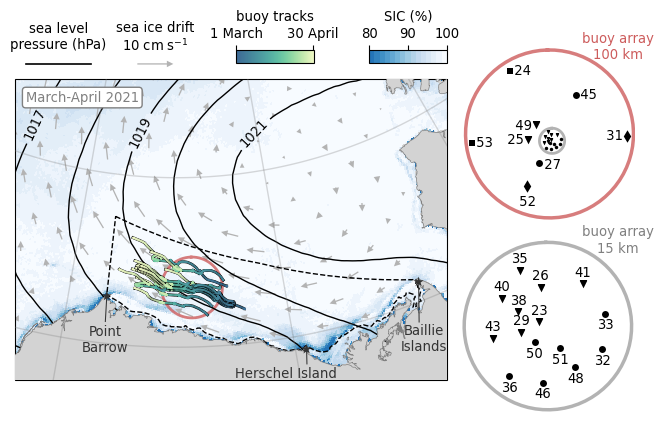

In [21]:
#================================================================
# fontsize plot-wide
FS = 9.5
#================================================================

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8,5), tight_layout=True)
gs = gridspec.GridSpec(2, 2, width_ratios=(2,0.8), wspace=0)

map_projection = ccrs.NorthPolarStereo(central_longitude=210)
ax = fig.add_subplot(gs[:, 0], projection=map_projection)
lat_range = [68.5, 77]
lon_range = [197, 232]

# set map extent, add grid and geo features
#------------------------------------------
ax.patch.set_facecolor('lightgray')
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.spines['geo'].set_edgecolor('k')
add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=17)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=16)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.3, zorder=18)

print(ax.get_extent())

# SIC
#----
icecmap = mpl.cm.Blues(np.linspace(0,1,20))              # cropped cmap
icecmap = mpl.colors.ListedColormap(icecmap[:-5,:-1][::-1]) # cropped cmap
sp = 1
sicc = ax.pcolormesh(lon_sic[::sp,::sp], lat_sic[::sp,::sp], 
                     ma.masked_where(mean_sic[::sp,::sp]<25, ma.masked_where(mean_sic[::sp,::sp]>100, mean_sic[::sp,::sp])), 
              vmin = 80, vmax = 100, cmap=icecmap, zorder=0, transform=ccrs.PlateCarree())
add_colorbar(fig, ax, [sicc], cb_placement='top', cb_orientation='auto', cb_width=0.025, 
             cb_length_fraction=[0.8, 0.975], cb_pad=0.025, cb_ticks=[80,90,100], cb_ticklabels='auto',
             cb_extend='neither', cb_label='SIC (%)', labelpad='auto', cb_label_placement='auto', 
             cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])

# icecmap = mpl.cm.Blues(np.linspace(0,1,20))              # cropped cmap
# icecmap = mpl.colors.ListedColormap(icecmap[:-5,:-1]) # cropped cmap
# sicc = ax.pcolormesh(lon_sic[::sp,::sp], lat_sic[::sp,::sp], 100*freq_open[::sp,::sp], 
#               vmin = 0, vmax = 20, cmap=icecmap, zorder=0, transform=ccrs.PlateCarree())
# add_colorbar(fig, ax, [sicc], cb_placement='top', cb_orientation='auto', cb_width=0.025, 
#              cb_length_fraction=[0.8, 0.975], cb_pad=0.025, cb_ticks=[0,10,20], cb_ticklabels=['0%','10%','20%'],
#              cb_extend='neither', cb_label='opening frequency', labelpad='auto', cb_label_placement='auto', 
#              cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])

# msl contours
#-------------
CS = ax.contour(longrid_wind, latgrid_wind, msl_clim, levels = np.arange(1000,1060,1), 
                linewidths=1,colors='k', zorder=15, transform=ccrs.PlateCarree())
# label contours with manual labels 
Coords = map_projection.transform_points(ccrs.PlateCarree(), np.array([190,205,220]), np.array([76,76.35,76]))
manual_points=[]
for spot in Coords[:,0:2]:
    manual_points.append((spot[0],spot[1]))
ax.clabel(CS, CS.levels, inline=True,  inline_spacing=5, fontsize=FS, manual=manual_points)

# plot ice drift vectors
#-----------------------  
sp = 4
icevec = ax.quiver(longrid_ice[::sp,::sp], latgrid_ice[::sp,::sp], 
                   *fix_cartopy_vectors(u_ice[::sp,::sp], v_ice[::sp,::sp], latgrid_ice[::sp,::sp]),
                   color=[0.7,0.7,0.7], width=0.003, headwidth=5, headlength=5, headaxislength=5,
                   scale=120, transform=ccrs.PlateCarree())
key = ax.quiverkey(icevec, X=0.325, Y=1.05, U=10, label = 'sea ice drift\n10 $\mathrm{cm\;{s}^{-1}}$', labelpos='N', fontproperties={'size':FS}, transform=ccrs.PlateCarree())
key.set(zorder = 100)



# msl contour legend
#-------------------
x_c = 0.1 # center
x_w = 0.15 # width
ax.text(x_c, 1.1, 'sea level\npressure (hPa)', fontsize=FS, weight='normal', 
            horizontalalignment='center', transform = ax.transAxes, zorder=100)
ax.plot([x_c-x_w/2,x_c+x_w/2], [1.05,1.05], clip_on=False, c='k', lw = 1.2, transform = ax.transAxes, zorder=100)


# polygons
#---------
ax.add_geometries([coast_poly], edgecolor='k', linestyle='dashed', facecolor='none',
                  alpha=1, lw=1,  crs= ccrs.PlateCarree(), zorder=10)

# plot ice-side edges of polygon only
# xx, yy = coast_poly.exterior.coords.xy
# poly_lon = xx.tolist()
# poly_lat = yy.tolist()
# ax.plot(poly_lon[:-36], poly_lat[:-36], 
#         c='k', linestyle='dashed', alpha=1, lw=1,  transform= ccrs.PlateCarree(), zorder=10)
# ax.plot(poly_lon[-10:], poly_lat[-10:], 
#         c='k', linestyle='dashed', alpha=1, lw=1,  transform= ccrs.PlateCarree(), zorder=10)

# ax.add_geometries([polyR1], edgecolor='None', facecolor='lightgray',alpha=1, crs= ccrs.PlateCarree(), zorder=3)
# ax.add_geometries([polyR2], edgecolor='None', facecolor='lightgray',alpha=1, crs= ccrs.PlateCarree(), zorder=3)

# buoys
#------
lightcmap = cmocean.tools.crop_by_percent(cmocean.cm.deep_r, 35, which='min', N=None)
lightcmap = cmocean.tools.crop_by_percent(lightcmap, 5, which='max', N=None)

for buoy in ds.buoyID.values:
    sp=5
    ax.plot(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp], 
               ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp],
               c='k', lw=2, transform=ccrs.PlateCarree(),zorder=15)
    buoytrack = ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp], 
               ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp],
               c=days_since_TI[::sp], s=0.1, vmin=0, vmax=days_since_TI[-1], 
               cmap=lightcmap, transform=ccrs.PlateCarree(),zorder=15)

# add_colorbar(fig, ax, [buoytrack], cb_placement='bottom', cb_orientation='auto', cb_width=0.02, 
#              cb_length_fraction=[0.3, 0.45], cb_pad=-0.075, cb_ticks=[0,61], cb_ticklabels=['1 March', '30 April'], 
#              cb_extend='neither', cb_label='buoy tracks', labelpad=2, cb_label_placement='top', 
#              cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])

add_colorbar(fig, ax, [buoytrack], cb_placement='top', cb_orientation='auto', cb_width=0.025, 
             cb_length_fraction=[0.5, 0.675], cb_pad=0.025, cb_ticks=[0,61], cb_ticklabels=['1 March', '30 April'],
             cb_extend='neither', cb_label='buoy tracks', labelpad='auto', cb_label_placement='auto', 
             cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])


# label time period
#------------------
ax.text(0.025, 0.925, 'March-April 2021', fontsize=FS,
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.25'),c='gray',
        horizontalalignment='left', transform = ax.transAxes, zorder=100)



# label locations
#------------------
# marker properties
lab_color = [0.2,0.2,0.2]

# Point Barrow
coords = (-156.4811, 71.3875)
dp = (0.125,-0.75)
label='Point\nBarrow'
ax.scatter(*coords, marker='*', s=60, facecolor=lab_color, edgecolor='None', lw=0.5,
           transform=ccrs.PlateCarree(),zorder=40)
ax.plot([coords[0], coords[0]+dp[0]], [coords[1], coords[1]+dp[1]],  
        c=lab_color, lw=0.75,transform=ccrs.PlateCarree(),zorder=20)
ax.text(coords[0]+dp[0], coords[1]+dp[1]-0.1,  label, c=lab_color, size=FS, 
        horizontalalignment='center', verticalalignment='top', transform=ccrs.PlateCarree(),zorder=20)

# Herschel Island
coords = (-139.0762, 69.5795)
dp = (-0.2,-0.425)
label='Herschel Island          '
ax.scatter(*coords, marker='*', s=60, facecolor=lab_color, edgecolor='None', lw=0.5,
           transform=ccrs.PlateCarree(),zorder=40)
ax.plot([coords[0], coords[0]+dp[0]], [coords[1], coords[1]+dp[1]],  
        c=lab_color, lw=0.75,transform=ccrs.PlateCarree(),zorder=20)
ax.text(coords[0]+dp[0], coords[1]+dp[1]-0.1,  label, c=lab_color, size=FS, 
        horizontalalignment='center', verticalalignment='top', transform=ccrs.PlateCarree(),zorder=20)

# Baillie Island
coords = (-128.2, 70.55)
dp = (-1.2,-1.1)
label='Baillie\nIslands'
ax.scatter(*coords, marker='*', s=60, facecolor=lab_color, edgecolor='None', lw=0.5,
           transform=ccrs.PlateCarree(),zorder=40)
ax.plot([coords[0], coords[0]+dp[0]], [coords[1], coords[1]+dp[1]],  
        c=lab_color, lw=0.75,transform=ccrs.PlateCarree(),zorder=20)
ax.text(coords[0]+dp[0]+0.3, coords[1]+dp[1]-0.1,  label, c=lab_color, size=FS, 
        horizontalalignment='center', verticalalignment='top', transform=ccrs.PlateCarree(),zorder=20)


ax.plot(mednet_lons, mednet_lats, c='indianred', zorder=3, lw=2, alpha=0.8, transform=ccrs.PlateCarree())


#////////////////
# medium plot //
#/////////////////////////////////////////////////////////////////////////////////////////////
ax = fig.add_subplot(gs[0, 1], projection=map_projection)
lat_range = [70.825, 72.65]
lon_range = [208.5, 214.1]
# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.set_aspect('equal')
ax.spines['geo'].set_edgecolor('None')
add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=17)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=16)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.3, zorder=18)
    
    
# ~ 150 km diameter buoy array
#-----------------------------
ax.text(0.9, 0.925, 'buoy array\n100 km', fontsize=FS, weight='normal',c='indianred', 
        horizontalalignment='center', transform = ax.transAxes, zorder=100)

ax.plot(mednet_lons, mednet_lats, c='indianred', zorder=1, lw=2.5, alpha=0.8, transform=ccrs.PlateCarree())
ax.plot(smallnet_lons, smallnet_lats, c=[0.7,0.7,0.7], zorder=1, lw=2, transform=ccrs.PlateCarree())

# look on specific date and find buoy pairs within 2 km of one another    
spec_date = datetime(2021, 3, 20, 0, 0)

for bb, buoy in enumerate(buoy_IDs):
    
    # horizontal alignments
    if buoy in ['49',]:
        VA = 'bottom'
        HA = 'right'
        Vpad = -0.075
    elif buoy in ['24','53','45']:
        VA = 'bottom'
        HA = 'left'
        Vpad = -0.075
    elif buoy in ['27']:
        VA = 'bottom'
        HA = 'left'
        Vpad = -0.1
    elif buoy in ['52']:
        VA = 'top'
        HA = 'center'
        Vpad = -0.1
    else:
        VA = 'center'
        HA = 'right'
        Vpad = 0
        
    # which buoys to label (inner / outer network) 
    if buoy in ['24', '53', '25', '49', '52', '31', '27', '45']:
#     if marker_dict[buoy]['group'] in ['NW', 'SE', 'LF'] or buoy in ['25', '49']:
        LABEL = f' {buoy} '
        sd = 1#3 #buoy size multiplication
    else:
        LABEL = ''
        sd = 0.25#0.75 #buoy size multiplication   
        
    # plot point and label
    ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
               ds.latitude.sel(buoyID=buoy).sel(time=spec_date),
               marker = marker_dict[buoy]['shape'],
               facecolor='k', lw=0, alpha=1, s=sd*marker_dict[buoy]['size'], transform=ccrs.PlateCarree(), zorder=4)
    ax.text(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
            ds.latitude.sel(buoyID=buoy).sel(time=spec_date) + Vpad,
            LABEL,  horizontalalignment = HA, verticalalignment = VA, fontsize=FS, c= 'k',
            transform=ccrs.PlateCarree(), zorder=5)

    

# #/////////////////////////////////////////////////////////////////////////////////////////////


#///////////////
# small plot //
#/////////////////////////////////////////////////////////////////////////////////////////////
ax = fig.add_subplot(gs[1, 1], projection=map_projection)
lat_range = [71.54, 71.81]
lon_range = [211.05, 211.91]
# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.set_aspect('equal')
ax.spines['geo'].set_edgecolor('None')
add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=17)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=16)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.3, zorder=18)

ax.plot(smallnet_lons, smallnet_lats, c=[0.7,0.7,0.7], zorder=1, lw=2.5, transform=ccrs.PlateCarree())

# look on specific date and find buoy pairs within 2 km of one another    
spec_date = datetime(2021, 3, 20, 0, 0)

for bb, buoy in enumerate(buoy_IDs):
    
    if buoy in ['23', '26','29', '35', '38', '40', '41', '43', ]:
        VA = 'bottom'
        pad = +0.0075
        HA = 'center'
    
    else:
        VA = 'top'
        pad = -0.0075
        HA = 'center'
        
    # which buoys to label (inner / outer network) 
    if buoy in ['24', '53', '25', '49', '52', '31', '27', '45']:
#     if marker_dict[buoy]['group'] in ['NW', 'SE', 'LF'] or buoy in ['25', '49']:
        LABEL = ''
        sd = 1 #buoy size multiplication
    
    else:
        LABEL = f'{buoy}'
        sd = 1 #buoy size multiplication   
    
        
    # plot point and label
    ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
               ds.latitude.sel(buoyID=buoy).sel(time=spec_date),
               marker = marker_dict[buoy]['shape'],
               facecolor='k', edgecolor='k', lw=0, alpha=1, s=sd*marker_dict[buoy]['size'], 
               transform=ccrs.PlateCarree(), zorder=4)
    
    ax.text(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
            ds.latitude.sel(buoyID=buoy).sel(time=spec_date)+pad,
            LABEL, horizontalalignment = HA, verticalalignment = VA, fontsize=FS, c= 'k',
            transform=ccrs.PlateCarree(), zorder=4)

    
# 15 km radius buoy array
#-----------------------------
ax.text(0.9, 0.925, 'buoy array\n15 km', fontsize=FS, weight='normal',c='gray', 
        horizontalalignment='center', transform = ax.transAxes, zorder=100)


#/////////////////////////////////////////////////////////////////////////////////////////////

gs.update(wspace=0.05, hspace=0.0)


# save image
#-----------
# saveimage = './figures/KeyFigs/FigA/FigA_v3.png'
# if saveimage != False:
#     print(f'Saving image as >>> {saveimage}')
#     fig.savefig(saveimage, transparent=False, bbox_inches="tight", pad_inches = 0.05, dpi=300)



In [ ]:
if buoy in ['24', '53', '25', '49', '52', '31', '27', '45']

['NW', 'SE', 'LF'] or buoy in ['25', '49']:

In [ ]:
for buoy in ['24', '53']:
    marker_dict[buoy] = {}
    marker_dict[buoy]['group'] = 'NW'
    marker_dict[buoy]['shape'] = 's'
    marker_dict[buoy]['size'] = 20
    
for buoy in ['23', '25', '26', '29', '30', '35', '38', '40', '41', '43', '49']:
    marker_dict[buoy] = {}
    marker_dict[buoy]['group'] = 'W'
    marker_dict[buoy]['shape'] = 'v'
    marker_dict[buoy]['size'] = 30    
    
for buoy in ['28', '32', '33', '36', '46', '48', '50', '51','45','27']:
    marker_dict[buoy] = {}
    marker_dict[buoy]['group'] = 'E'
    marker_dict[buoy]['shape'] = 'o'
    marker_dict[buoy]['size'] = 25 

for buoy in ['31','52']:
    marker_dict[buoy] = {}
    marker_dict[buoy]['group'] = 'SE'
    marker_dict[buoy]['shape'] = 'd'
    marker_dict[buoy]['size'] = 40 


200.0
Saving image as >>> ./figures/KeyFigs/FigA/OverviewSICbuoy_MidSize_v4.png


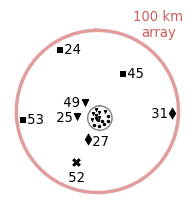

In [407]:

FS = 9.5

# create figure in NorthPolarStereo projection
#---------------------------------------------
map_projection = ccrs.NorthPolarStereo(central_longitude=210)
lat_range = [70.825, 72.675]
lon_range = [208.4, 214.25]
fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection),figsize=(2.25,2.75), facecolor='white')
plt.subplots_adjust(wspace=0.05, hspace=0)

# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.set_aspect('equal')
ax.spines['geo'].set_edgecolor('gray')
ax.spines['geo'].set_linewidth(0)
ax.spines['geo'].set_linestyle('solid')

# look on specific date and find buoy pairs within 2 km of one another    
spec_date = datetime(2021, 3, 20, 0, 0)

for bb, buoy in enumerate(buoy_IDs):
    
    # horizontal alignments
    if buoy in ['49',]:
        VA = 'bottom'
        HA = 'right'
        Vpad = -0.075
    elif buoy in ['24','53','45']:
        VA = 'bottom'
        HA = 'left'
        Vpad = -0.075
    elif buoy in ['27']:
        VA = 'bottom'
        HA = 'left'
        Vpad = -0.1
    elif buoy in ['52']:
        VA = 'top'
        HA = 'center'
        Vpad = -0.1
    else:
        VA = 'center'
        HA = 'right'
        Vpad = 0
        
    # which buoys to label (inner / outer network) 
    if marker_dict[buoy]['group'] in ['NW', 'SE', 'LF'] or buoy in ['25', '49']:
        LABEL = f' {buoy} '
        sd = 1#3 #buoy size multiplication
    else:
        LABEL = ''
        sd = 0.25#0.75 #buoy size multiplication   
        
    # plot point and label
    ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
               ds.latitude.sel(buoyID=buoy).sel(time=spec_date),
               marker = marker_dict[buoy]['shape'],
               facecolor='k', lw=0, alpha=1, s=sd*marker_dict[buoy]['size'], transform=ccrs.PlateCarree(), zorder=4)
    ax.text(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
            ds.latitude.sel(buoyID=buoy).sel(time=spec_date) + Vpad,
            LABEL,  horizontalalignment = HA, verticalalignment = VA, fontsize=FS, c= 'k',
            transform=ccrs.PlateCarree(), zorder=5)

#/////////////
# polygons //
#/////////////////////////////////////////////////////////////////////////////////////////////

# ~ 150 km diameter buoy array
#-----------------------------
ax.text(0.85, 0.925, '100 km\narray', fontsize=FS, weight='normal',c='indianred', 
        horizontalalignment='center', transform = ax.transAxes, zorder=100)


# label panel
# ax.text(1.075, 0.925, '(b)', fontsize=FS, weight='normal', 
#         horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, zorder=100)


ax.plot(smallnet_lons, smallnet_lats, c='gray', zorder=1, lw=1, transform=ccrs.PlateCarree())


    
ax.plot(mednet_lons, mednet_lats, c='indianred', zorder=1, lw=2.5, alpha=0.6, transform=ccrs.PlateCarree())
#/////////////////////////////////////////////////////////////////////////////////////////////


print(dist*2/1000)



# save image
#-----------
# saveimage = './figures/KeyFigs/FigA/OverviewSICbuoy_MidSize_v4.png'
# if saveimage != False:
#     print(f'Saving image as >>> {saveimage}')
#     fig.savefig(saveimage, transparent=False, bbox_inches="tight", pad_inches = 0.05, dpi=300)



30.0
Saving image as >>> ./figures/KeyFigs/FigA/OverviewSICbuoy_SmallSize_v4.png


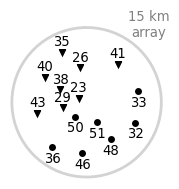

In [408]:
# create figure in NorthPolarStereo projection
#---------------------------------------------
map_projection = ccrs.NorthPolarStereo(central_longitude=210)

lat_range = [71.54, 71.81]
lon_range = [211.05, 211.91]
fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection),figsize=(2.25,2), facecolor='white')
plt.subplots_adjust(wspace=0.05, hspace=0)

# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.set_aspect('equal')
ax.spines['geo'].set_edgecolor('gray')
ax.spines['geo'].set_linewidth(0)
add_coast(ax, scale='10m', color='k', linewidth=0.5, alpha=1, zorder=10)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=9)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.2, zorder=10)



# look on specific date and find buoy pairs within 2 km of one another    
spec_date = datetime(2021, 3, 20, 0, 0)

for bb, buoy in enumerate(buoy_IDs):
    
    if buoy in ['23', '26','29', '35', '38', '40', '41', '43', ]:
#     if buoy in ['35','50']:
#         VA = 'top'
#         pad = -0.007
#     else:
        VA = 'bottom'
        pad = +0.0075
        HA = 'center'
    
    else:
        VA = 'top'
        pad = -0.0075
        HA = 'center'
        
    # which buoys to label (inner / outer network) 
    if marker_dict[buoy]['group'] in ['NW', 'SE', 'LF'] or buoy in ['25', '49']:
        LABEL = ''
        sd = 1 #buoy size multiplication
    else:
        LABEL = f'{buoy}'
        sd = 1 #buoy size multiplication   
        
    # plot point and label
    ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
               ds.latitude.sel(buoyID=buoy).sel(time=spec_date),
               marker = marker_dict[buoy]['shape'],
               facecolor='k', edgecolor='k', lw=0, alpha=1, s=sd*marker_dict[buoy]['size'], 
               transform=ccrs.PlateCarree(), zorder=4)
    
    ax.text(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
            ds.latitude.sel(buoyID=buoy).sel(time=spec_date)+pad,
            LABEL, horizontalalignment = HA, verticalalignment = VA, fontsize=FS, c= 'k',
#             bbox=dict(facecolor='white', alpha=0.8,edgecolor='none', boxstyle='round,pad=0'),
            transform=ccrs.PlateCarree(), zorder=4)

    
# 15 km radius buoy array
#-----------------------------
ax.text(0.9, 0.925, '15 km\narray', fontsize=FS, weight='normal',c='gray', 
        horizontalalignment='center', transform = ax.transAxes, zorder=100)

    
ax.plot(smallnet_lons, smallnet_lats, c='lightgray', zorder=1, lw=2, transform=ccrs.PlateCarree())

print(dist*2/1000)


# save image
#-----------
saveimage = './figures/KeyFigs/FigA/OverviewSICbuoy_SmallSize_v4.png'
if saveimage != False:
    print(f'Saving image as >>> {saveimage}')
    fig.savefig(saveimage, transparent=False, bbox_inches="tight", pad_inches = 0.05, dpi=300)


90th percentile: 0.55
2021: 0.58

Saving image as >>> ./figures/KeyFigs/FigH/MYI_v_time.png


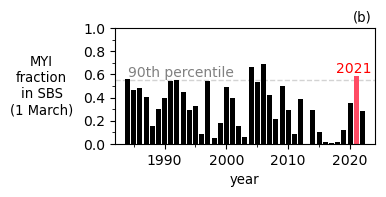

In [200]:
FS = 9.5

fig, ax = plt.subplots(figsize=(3.35,1.5))

# label panel
ax.text(0.95, 1.1, '(b)', fontsize=FS, weight='normal', 
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, zorder=100)

ax.set_ylim(0,1)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.set_ylabel('MYI\nfraction\nin SBS\n(1 March)', rotation=0, fontsize=FS, 
              labelpad=30, verticalalignment='center')


ax.set_xlim(1982,2024)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.set_xlabel('year', rotation=0, fontsize=FS)

# ax.set_xticks(np.arange(1990,2021,5))
# ax.set_xticklabels(np.arange(1990,2021,5), fontsize=FS,)


ax.bar(years, MYI_fractions, color='k')
ax.bar(2021, MYI_fractions[-2], color=[255/255, 75/255, 100/255])

ax.hlines(np.percentile(MYI_fractions,90), 
          ax.get_xlim()[0], ax.get_xlim()[-1], 
          colors='lightgray',linewidths=1, linestyles='dashed', zorder=-1)
print(f'90th percentile: {np.percentile(MYI_fractions,90):.2f}')
print(f'2021: {MYI_fractions[np.where(years==2021)[0][0]]:.2f}\n')

ax.text(2021, 1.05*MYI_fractions[-2], f'2021 ', c='r',
        horizontalalignment='center')

ax.text(1984, 1.05*np.percentile(MYI_fractions,90), f'90th percentile', c='gray',
        horizontalalignment='left')

    

# save image
#-----------
saveimage = './figures/KeyFigs/FigH/MYI_v_time.png'
if saveimage != False:
    print(f'Saving image as >>> {saveimage}')
    fig.savefig(saveimage, transparent=True, bbox_inches="tight", pad_inches = 0.05, dpi=300)


linear regression:
 LinregressResult(slope=-0.006116133325938662, intercept=12.569617510583624, rvalue=-0.3444821779014027, pvalue=0.0317525435572695, stderr=0.0027401800526381114, intercept_stderr=5.488667287155009)


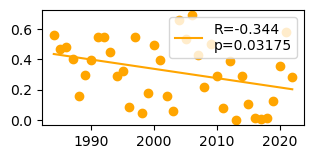

Weak negative trend in MYI fraction over time!

years with greatest detrended values
1: 2006 (MY fraction: 0.392)
2: 2021 (MY fraction: 0.375)
3: 2004 (MY fraction: 0.349)


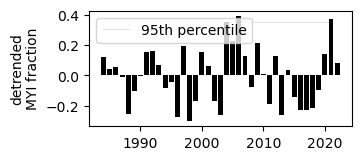

In [35]:

import scipy.stats

X1 = years
X2 = MYI_fractions

fig, ax = plt.subplots(figsize=(3.385,1.5))
result = scipy.stats.linregress(X1, X2)
print(f'linear regression:\n', result)
ax.plot(X1, result.intercept + result.slope * X1, linestyle='solid', c='orange', label=f'R={result.rvalue:.3f}\np={result.pvalue:.5f}')
ax.scatter(X1, X2, c='orange')
ax.legend()
plt.show()

print('Weak negative trend in MYI fraction over time!')

print(f'\nyears with greatest detrended values')
detrended_vals = X2 - (result.intercept + result.slope * X1)
sorted_vals = detrended_vals[np.argsort(detrended_vals)[::-1]]
sorted_years = years[np.argsort(detrended_vals)[::-1]]
for ii in range(3):
    print(f'{ii+1}: {sorted_years[ii]} (MY fraction: {sorted_vals[ii]:.3f})')

fig, ax = plt.subplots(figsize=(3.385,1.5))
ax.set_ylabel('detrended\nMYI fraction')
ax.bar(X1, X2 - (result.intercept + result.slope * X1), color='k')
ax.hlines(np.percentile(X2 - (result.intercept + result.slope * X1), 95), 
          1984, 2021, colors='lightgray',linewidths=0.5,  zorder=-1, label='95th percentile')
ax.legend()
plt.show()
    
# print(all_years[np.argsort(detrended_vals)])

### zoom in


mid_extent = (-19285.12590976479, 421676.5635386811, -2209856.5455738585, -1865956.2481513508)

Saving image as >>> ./figures/KeyFigs/FigA/OverviewSICbuoy_MidSize.png


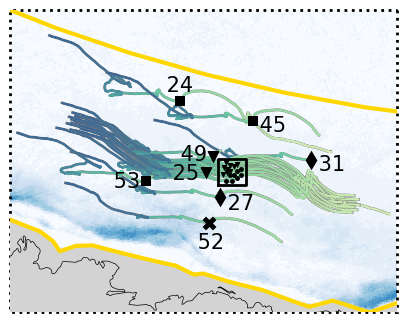

In [55]:
# create figure in NorthPolarStereo projection
#---------------------------------------------
map_projection = ccrs.NorthPolarStereo(central_longitude=205)
# lat_range = [71.25, 72.6]
# lon_range = [206, 211.5]

# lat_range = [71., 72.6]
# lon_range = [208.5, 214.1]

lat_range = [70.4, 73.1]
lon_range = [204.5, 216]
fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection),figsize=(5,5), facecolor='white')
plt.subplots_adjust(wspace=0.05, hspace=0)

# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.set_aspect('equal')
ax.spines['geo'].set_edgecolor('k')
ax.spines['geo'].set_linewidth(2)
ax.spines['geo'].set_linestyle('dotted')
add_coast(ax, scale='10m', color='k', linewidth=0.5, alpha=1, zorder=10)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=9)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.2, zorder=10)


ax.pcolormesh(lon_sic, lat_sic, ma.masked_where(mean_sic>100, mean_sic), 
              vmin = 85, vmax = 100, cmap=icecmap, zorder=0, transform=ccrs.PlateCarree())

# March-April drift tracks
#-------------------------
for buoy in buoy_IDs:
    ax.plot(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)), 
                ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)),
               c='gray', lw=2, alpha=1, transform=ccrs.PlateCarree(), zorder=1)
    ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)), 
                ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)),
               c=days_since_TI, s=0.1, alpha=1,
               vmin=0, vmax=days_since_TI[-1], cmap=lightcmap, transform=ccrs.PlateCarree(), zorder=1)
    
    
# look on specific date and find buoy pairs within 2 km of one another    
spec_date = datetime(2021, 3, 20, 0, 0)

for bb, buoy in enumerate(buoy_IDs):
    
    # horizontal alignments
    if buoy in ['49',]:
        VA = 'bottom'
        HA = 'right'
        Vpad = -0.075
    elif buoy in ['27',]:
        VA = 'center'
        HA = 'left'
        Vpad = -0.075
    elif buoy in ['24',]:
        VA = 'bottom'
        HA = 'center'
        Vpad = 0.05
    elif buoy in ['52',]:
        VA = 'top'
        HA = 'center'
        Vpad = -0.1
    elif buoy in ['31','45']:
        VA = 'center'
        HA = 'left'
        Vpad = -0.05
    else:
        VA = 'center'
        HA = 'right'
        Vpad = 0
        
    # which buoys to label (inner / outer network) 
    if marker_dict[buoy]['group'] in ['NW', 'SE', 'LF'] or buoy in ['25', '49']:
        LABEL = f' {buoy} '
        sd = 2.5#3 #buoy size multiplication
    else:
        LABEL = ''
        sd = 0.5#0.75 #buoy size multiplication   
        
    # plot point and label
    ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
               ds.latitude.sel(buoyID=buoy).sel(time=spec_date),
               marker = marker_dict[buoy]['shape'],
               facecolor='k', lw=0, alpha=1, s=sd*marker_dict[buoy]['size'], transform=ccrs.PlateCarree(), zorder=4)
    ax.text(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
            ds.latitude.sel(buoyID=buoy).sel(time=spec_date) + Vpad,
            LABEL,  horizontalalignment = HA, verticalalignment = VA, fontsize=15, c= 'k',
            transform=ccrs.PlateCarree(), zorder=5)

    
    
#/////////////
# polygons //
#/////////////////////////////////////////////////////////////////////////////////////////////
# coast polygons
ds_mask = xr.open_dataset('./data/coast_mask_regions.nc')
ds_mask.close()
polyR1 = wkt.loads(str(ds_mask.R1_poly_str.values))
polyR2 = wkt.loads(str(ds_mask.R2_poly_str.values))
coast_poly = wkt.loads(str(ds_mask.coast_poly_masked_str.values))
ax.add_geometries([coast_poly], edgecolor='gold', linestyle='solid', facecolor='none',
                  alpha=1, lw=3,  crs= ccrs.PlateCarree(), zorder=10)
ax.add_geometries([polyR1], edgecolor='None', facecolor='lightgray',alpha=1, crs= ccrs.PlateCarree(), zorder=3)
ax.add_geometries([polyR2], edgecolor='None', facecolor='lightgray',alpha=1, crs= ccrs.PlateCarree(), zorder=3)
#/////////////////////////////////////////////////////////////////////////////////////////////


# plot outline of mini region
# mini_extent = (218423.22999176796, 250962.8956463215, -2062180.1672572978, -2032075.9513266578)
mini_extent = (217010.24714027715, 249510.11611265427, -2065219.3247545932, -2035699.802353635)


ax.plot([mini_extent[0],mini_extent[0],mini_extent[1],mini_extent[1],mini_extent[0]], 
        [mini_extent[2],mini_extent[3],mini_extent[3],mini_extent[2],mini_extent[2]], 
        c='k', lw=2, alpha=1, zorder=1)

print(f'\nmid_extent = {ax.get_extent()}\n')

# save image
#-----------
saveimage = './figures/KeyFigs/FigA/OverviewSICbuoy_MidSize.png'
if saveimage != False:
    print(f'Saving image as >>> {saveimage}')
    fig.savefig(saveimage, transparent=False, bbox_inches="tight", pad_inches = 0.05, dpi=300)



In [5]:
def interp_path(LONS, LATS, DAYS, N=10):

# LATS = ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)).values
# LONS = ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)).values
# DAYS = days_since_TI

# N = 10

    lat_interp = np.array([])
    lon_interp = np.array([])
    day_interp = np.array([])

    for ll in range(len(LATS)-1):

        lat_interp = np.append(lat_interp, np.linspace(LATS[ll], LATS[ll+1], N+2))
        lon_interp = np.append(lon_interp, np.linspace(LONS[ll], LONS[ll+1], N+2))
        day_interp = np.append(day_interp, np.linspace(DAYS[ll], DAYS[ll+1], N+2))
        
    return lon_interp, lat_interp, day_interp


lon_interp, lat_interp, day_interp = interp_path(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)).values, 
                                                 ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)).values, 
                                                 days_since_TI, N=10)


mini_extent = (217010.24714027715, 249510.11611265427, -2065219.3247545932, -2035699.802353635)

Saving image as >>> ./figures/KeyFigs/FigA/OverviewSICbuoy_SmallSize.png


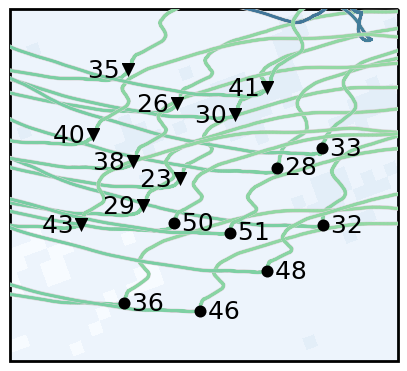

In [57]:
# create figure in NorthPolarStereo projection
#---------------------------------------------
map_projection = ccrs.NorthPolarStereo(central_longitude=205)

# lat_range = [71.585, 71.82]
# lon_range = [211.125, 211.95]

lat_range = [71.56, 71.79]
lon_range = [211.075, 211.9]
fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection),figsize=(5,5), facecolor='white')
plt.subplots_adjust(wspace=0.05, hspace=0)


# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.set_aspect('equal')
ax.spines['geo'].set_edgecolor('k')
ax.spines['geo'].set_linewidth(2)
add_coast(ax, scale='10m', color='k', linewidth=0.5, alpha=1, zorder=10)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=9)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.2, zorder=10)

ax.pcolormesh(lon_sic, lat_sic, ma.masked_where(mean_sic>100, mean_sic), 
              vmin = 85, vmax = 100, cmap=icecmap, zorder=0, transform=ccrs.PlateCarree())

# March-April drift tracks
#-------------------------
date_indices = (buoy_time>=datetime(2021, 3, 1, 12, 0))&(buoy_time<=datetime(2021, 4, 1, 23, 0))

for buoy in buoy_IDs:
    
    
    ax.plot(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)), 
                ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)),
               c='lightgray', lw=3, transform=ccrs.PlateCarree(),zorder=3)
    
    lon_interp, lat_interp, day_interp = interp_path(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)).values, 
                                                 ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)).values, 
                                                 days_since_TI, N=5)
    
    ax.scatter(lon_interp,lat_interp,
               c=day_interp, s=0.8, alpha=1,
               vmin=0, vmax=days_since_TI[-1], cmap=lightcmap, transform=ccrs.PlateCarree(),zorder=3)
    
    
#     ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)), 
#                 ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)),
#                c=days_since_TI, s=1, alpha=1,
#                vmin=0, vmax=days_since_TI[-1], cmap=lightcmap, transform=ccrs.PlateCarree(),zorder=3)

    
# look on specific date and find buoy pairs within 2 km of one another    
spec_date = datetime(2021, 3, 20, 0, 0)

for bb, buoy in enumerate(buoy_IDs):
    
    if buoy in ['41']:
        VA = 'center'
    else:
        VA = 'center'
        
    if marker_dict[buoy]['group'] in ['W']:
        HA = 'right'
    else:
        HA = 'left'
        
    # which buoys to label (inner / outer network) 
    if marker_dict[buoy]['group'] in ['NW', 'SE', 'LF'] or buoy in ['25', '49']:
        LABEL = ''
        sd = 1 #buoy size multiplication
    else:
        LABEL = f' {buoy} '
        sd = 3 #buoy size multiplication   
        
    # plot point and label
    ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
               ds.latitude.sel(buoyID=buoy).sel(time=spec_date),
               marker = marker_dict[buoy]['shape'],
               facecolor='k', edgecolor='k', lw=0, alpha=1, s=sd*marker_dict[buoy]['size'], 
               transform=ccrs.PlateCarree(), zorder=4)
    
    ax.text(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
            ds.latitude.sel(buoyID=buoy).sel(time=spec_date),
            LABEL, horizontalalignment = HA, verticalalignment = VA, fontsize=18, c= 'k',
#             bbox=dict(facecolor='white', alpha=0.8,edgecolor='none', boxstyle='round,pad=0'),
            transform=ccrs.PlateCarree(), zorder=4)

        
print(f'\nmini_extent = {ax.get_extent()}\n')

# save image
#-----------
saveimage = './figures/KeyFigs/FigA/OverviewSICbuoy_SmallSize.png'
if saveimage != False:
    print(f'Saving image as >>> {saveimage}')
    fig.savefig(saveimage, transparent=False, bbox_inches="tight", pad_inches = 0.05, dpi=300)



 - select nearest date before 1984-03-01 >>> 1984-02-26
 - select nearest date before 1985-03-01 >>> 1985-02-26
 - select nearest date before 1986-03-01 >>> 1986-02-26
 - select nearest date before 1987-03-01 >>> 1987-02-26
 - select nearest date before 1988-03-01 >>> 1988-02-26
 - select nearest date before 1989-03-01 >>> 1989-02-26
 - select nearest date before 1990-03-01 >>> 1990-02-26
 - select nearest date before 1991-03-01 >>> 1991-02-26
 - select nearest date before 1992-03-01 >>> 1992-02-26
 - select nearest date before 1993-03-01 >>> 1993-02-26
 - select nearest date before 1994-03-01 >>> 1994-02-26
 - select nearest date before 1995-03-01 >>> 1995-02-26
 - select nearest date before 1996-03-01 >>> 1996-02-26
 - select nearest date before 1997-03-01 >>> 1997-02-26
 - select nearest date before 1998-03-01 >>> 1998-02-26
 - select nearest date before 1999-03-01 >>> 1999-02-26
 - select nearest date before 2000-03-01 >>> 2000-02-26
 - select nearest date before 2001-03-01 >>> 200

## find linear trend in sea ice age

wind:
 LinregressResult(slope=-0.19393077287814134, intercept=395.0602181128498, rvalue=-0.510933160013621, pvalue=0.0012317235955704954, stderr=0.0551512488988816, intercept_stderr=110.41437052474876)


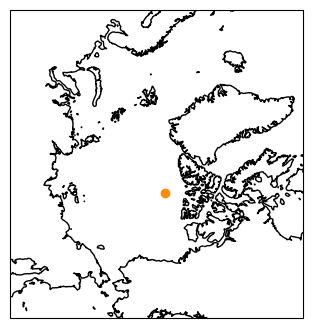

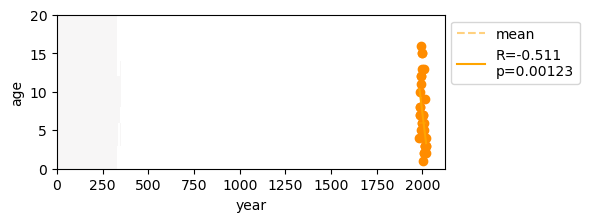

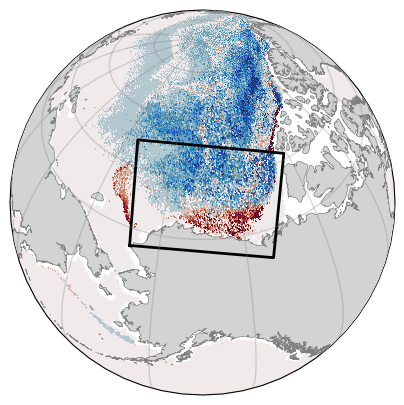

In [107]:
# map_projection = ccrs.NorthPolarStereo(central_longitude=205)
map_projection = ccrs.NearsidePerspective(central_longitude=210, 
                                          central_latitude=73, 
                                          satellite_height=1000000)
# map_projection = ccrs.Orthographic(central_longitude=205.0, central_latitude=80)

fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection),figsize=(5,5))
# ax.set_global()
# lat_range = [69, 80]
# lon_range = [195, 232]
# set map extent, add grid and geo features
#------------------------------------------
# ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())

add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=6)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=5)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.3, zorder=10)


MEAN_AGE = np.nanmean(AGE, axis=2)
MEDIAN_AGE = np.nanmedian(AGE, axis=2)

lightcmap = cmocean.tools.crop_by_percent(cmocean.cm.balance, 10, which='both', N=None)
ax.pcolormesh(lon, lat, 
              age - MEDIAN_AGE,
#               age - MEDIAN_AGE, 
              cmap=lightcmap, vmin=-5,vmax=5,
              transform = ccrs.PlateCarree(), zorder=0)


# # //////////////////
# # sea ice drift //
# #/////////////////////////////////////////////////////////////////////////////////////////////
        
# # open NSIDC-derived drift data
# #------------------------------
# ds_PPD = xr.open_dataset(Clim_PPD)
# ds_PPD.close()
# longrid_ice = ds_PPD.longitude.values
# latgrid_ice = ds_PPD.latitude.values
# u_ice = ds_PPD.u.values
# v_ice = ds_PPD.v.values

# # plot ice drift vectors
# #-----------------------  
# sp = 6
# icevec = ax.quiver(longrid_ice[::sp,::sp], latgrid_ice[::sp,::sp], 
#                    *fix_cartopy_vectors(u_ice[::sp,::sp], v_ice[::sp,::sp], latgrid_ice[::sp,::sp]),
#                    color=[0.5,0.5,0.5], width=0.0025, headwidth=5, headlength=5, headaxislength=5,
#                    scale=120, transform=ccrs.PlateCarree())
# key = ax.quiverkey(icevec, X=0.425, Y=1.05, U=10, label = 'sea-ice drift\n10 $\mathrm{cm\;{s}^{-1}}$', labelpos='N', fontproperties={'size':FS}, transform=ccrs.PlateCarree())
# key.set(zorder = 100)
# #/////////////////////////////////////////////////////////////////////////////////////////////


# # # msl contours
# # #-------------
# # CS = ax.contour(longrid_wind, latgrid_wind, msl_clim, levels = np.arange(1000,1060,1), 
# #                 linewidths=1,
# #                 colors='k', zorder=4, transform=ccrs.PlateCarree())

# # # label contours with manual labels 
# # x_labels = np.array([180,190,200,210,218,225,230])[1::2]
# # y_labels = np.array([80,80,80,79,79,78,75])[1::2]
# # Coords = map_projection.transform_points(ccrs.PlateCarree(), x_labels, y_labels)
# # manual_points=[]
# # for spot in Coords[:,0:2]:
# #     manual_points.append((spot[0],spot[1]))
# # ax.clabel(CS, CS.levels, inline=True, 
# #           inline_spacing=15, 
# #           fontsize=FS, manual=manual_points)

# # # msl contour legend
# # #-------------------
# # ax.text(0.15, 1.1, 'sea level\npressure (hPa)', fontsize=FS, weight='normal', 
# #             horizontalalignment='center', transform = ax.transAxes, zorder=100)
# # ax.plot([0.05,0.25], [1.05,1.05], clip_on=False, c='k', lw = 1.2, transform = ax.transAxes, zorder=100)

            
    
# # #//////////
# # # buoys //
# # #/////////////////////////////////////////////////////////////////////////////////////////////
# # # March-April drift tracks
# # #-------------------------
# # lightcmap = cmocean.tools.crop_by_percent(cmocean.cm.matter, 35, which='max', N=None)
# # lightcmap = cmocean.tools.crop_by_percent(lightcmap, 5, which='min', N=None)

# # for buoy in ds.buoyID.values:
# #     sp=5
# #     ax.plot(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp], 
# #                ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp],
# #                c='k', lw=0.5, transform=ccrs.PlateCarree(),zorder=15)
# # #/////////////////////////////////////////////////////////////////////////////////////////////
    
    
wide_extent = (-504988.9847727559, 909868.0432746647, -2375786.3827168606, -1351863.133394557)

ax.plot([wide_extent[0],wide_extent[0],wide_extent[1],wide_extent[1],wide_extent[0]], 
        [wide_extent[2],wide_extent[3],wide_extent[3],wide_extent[2],wide_extent[2]], 
        c='k', lw=2, alpha=1, transform = ccrs.NorthPolarStereo(central_longitude=205), 
        zorder=10)

Saving image as >>> ./figures/KeyFigs/FigA/Overview_IceAge_buoy_v3.png
(-411742.0508941112, 1076469.5717552726, -2335105.207607886, -997632.5192451527)


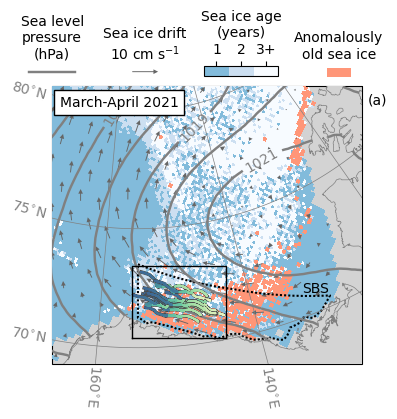

In [466]:

#================================================================
# Data sources of climatological data
Clim_ERA5 = f'/Volumes/Jewell_EasyStore/SIDEx2021/OverviewData/mean_ERA5_Mar-Apr_2021.nc'
Clim_PPD  = f'/Volumes/Jewell_EasyStore/SIDEx2021/OverviewData/mean_PPdrift_Mar-Apr_2021.nc'

# fontsize plot-wide
FS = 10
#================================================================

# ignore warnings about shading style with pcolormesh
warnings.filterwarnings("ignore")

#/////////////////
# start figure //
#/////////////////////////////////////////////////////////////////////////////////////////////

# create figure in NorthPolarStereo projection
#---------------------------------------------
map_projection = ccrs.NorthPolarStereo(central_longitude=205)
lat_range = [69, 80]
lon_range = [195, 232]

# lat_range = [68, 85]
# lon_range = [182, 235]
fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection),figsize=(4,4), facecolor='white')

# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.set_aspect('equal')
ax.spines['geo'].set_edgecolor('k')
ax.spines['geo'].set_facecolor('lightgray')
add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=17)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=16)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), 
         linewidth=0.5, color='gray', alpha=1, zorder=20)
# label gridlines
ax.text(0.13, -0.145, '$\mathrm{160^{\circ}E}$', fontsize=FS, c='gray', horizontalalignment='center', 
        transform = ax.transAxes, clip_on=False, rotation=-95, zorder=100)
ax.text(0.7, -0.15, '$\mathrm{140^{\circ}E}$', fontsize=FS, c='gray', horizontalalignment='center', 
        transform = ax.transAxes, clip_on=False, rotation=-80, zorder=100)
# ax.text(1.035, 0.49, '$\mathrm{120^{\circ}E}$', fontsize=FS, c='gray', horizontalalignment='center', 
#         transform = ax.transAxes, clip_on=False, rotation=-60, zorder=100)
ax.text(-0.075, 0.08, '$\mathrm{70^{\circ}N}$', fontsize=FS, c='gray', horizontalalignment='center', 
        transform = ax.transAxes, clip_on=False, rotation=-10, zorder=100)
ax.text(-0.075, 0.525, '$\mathrm{75^{\circ}N}$', fontsize=FS, c='gray', horizontalalignment='center', 
        transform = ax.transAxes, clip_on=False, rotation=-15, zorder=100)
ax.text(-0.075, 0.95, '$\mathrm{80^{\circ}N}$', fontsize=FS, c='gray', horizontalalignment='center', 
        transform = ax.transAxes, clip_on=False, rotation=-15, zorder=100)


#///////////////////////////
# atmospheric conditions //
#/////////////////////////////////////////////////////////////////////////////////////////////

# open ERA5 data
#---------------
ds_ERA5 = xr.open_dataset(Clim_ERA5)
ds_ERA5.close()
lon_wind, lat_wind = ds_ERA5.longitude.values, ds_ERA5.latitude.values
longrid_wind, latgrid_wind = np.meshgrid(lon_wind, lat_wind)
u10_clim = ds_ERA5.u10.values
v10_clim = ds_ERA5.v10.values
msl_clim = ds_ERA5.msl.values/100
wind_sp_clim = ds_ERA5.speed10.values

# msl contours
#-------------
contour_color = [[0.5,0.5,0.5]]#['gray']#[[0.3,0.3,0.3]]
CS = ax.contour(longrid_wind, latgrid_wind, msl_clim, levels = np.arange(1000,1060,1), 
                linewidths=1.75,
                colors=contour_color, zorder=14, transform=ccrs.PlateCarree())

# label contours with manual labels 
x_labels = np.array([180,190,200,210,218,225,230])[::2]
y_labels = np.array([80,80,80,79,79,78,75])[::2]
Coords = map_projection.transform_points(ccrs.PlateCarree(), x_labels, y_labels)
manual_points=[]
for spot in Coords[:,0:2]:
    manual_points.append((spot[0],spot[1]))
ax.clabel(CS, CS.levels, inline=True, inline_spacing=5, fontsize=FS, manual=manual_points)

# legend
#-------
x_c = 0.0 # center
x_w = 0.15 # width
ax.text(x_c, 1.1, 'Sea level\npressure\n(hPa)', fontsize=FS, weight='normal', 
            horizontalalignment='center', transform = ax.transAxes, zorder=100)
ax.plot([x_c-x_w/2, x_c+x_w/2], [1.05,1.05], clip_on=False, c=contour_color[0], 
        lw = 1.75, transform = ax.transAxes, zorder=100)
#/////////////////////////////////////////////////////////////////////////////////////////////

            
# //////////////////
# sea ice drift //
#/////////////////////////////////////////////////////////////////////////////////////////////
        
# open NSIDC-derived drift data
#------------------------------
ds_PPD = xr.open_dataset(Clim_PPD)
ds_PPD.close()
longrid_ice = ds_PPD.longitude.values
latgrid_ice = ds_PPD.latitude.values
u_ice = ds_PPD.u.values
v_ice = ds_PPD.v.values

# plot ice drift vectors
#-----------------------  
sp = 4
arrow_color = [0.4,0.4,0.4]#'gray'#[0.3,0.3,0.3]
icevec = ax.quiver(longrid_ice[::sp,::sp], latgrid_ice[::sp,::sp], 
                   *fix_cartopy_vectors(u_ice[::sp,::sp], v_ice[::sp,::sp], latgrid_ice[::sp,::sp]),
                   color=arrow_color, width=0.003, headwidth=5, headlength=5, headaxislength=5,
                   scale=120, transform=ccrs.PlateCarree(), zorder=6)
# legend
#-------
x_c = 0.3 # center
key = ax.quiverkey(icevec, X=x_c, Y=1.05, U=10, label = 'Sea ice drift\n10 $\mathrm{cm\;{s}^{-1}}$',
                   labelpos='N', fontproperties={'size':FS}, transform=ccrs.PlateCarree())
key.set(zorder = 100)

#/////////////////////////////////////////////////////////////////////////////////////////////

#////////
# SIC //
#/////////////////////////////////////////////////////////////////////////////////////////////
# icecmap = mpl.cm.Blues(np.linspace(0,1,20))              # cropped cmap
# icecmap = mpl.colors.ListedColormap(icecmap[:-5,:-1][::-1]) # cropped cmap
# sp = 2
# sicc = ax.pcolormesh(lon_sic[::sp,::sp], lat_sic[::sp,::sp], ma.masked_where(mean_sic[::sp,::sp]>100, mean_sic[::sp,::sp]), 
#               vmin = 80, vmax = 100, cmap=icecmap, zorder=3, transform=ccrs.PlateCarree())


# add_colorbar(fig, ax, [sicc], cb_placement='top', cb_orientation='auto', cb_width=0.025, 
#              cb_length_fraction=[0.65, 0.95], cb_pad=0.025, cb_ticks=[80,90,100], cb_ticklabels='auto',
#              cb_extend='neither', cb_label='SIC (%)', labelpad='auto', cb_label_placement='auto', 
#              cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])


#/////////////////////////////////////////////////////////////////////////////////////////////


#////////////
# ice age //
#/////////////////////////////////////////////////////////////////////////////////////////////
MEAN_AGE = np.nanmean(AGE, axis=2)
MEDIAN_AGE = np.nanmedian(AGE, axis=2)

# lightcmap = cmocean.tools.lighten(cmocean.tools.crop_by_percent(cmocean.cm.balance, 20, which='both', N=None), 0.5)
lightcmap = cmocean.tools.lighten(cmocean.tools.crop_by_percent(cmocean.cm.balance, 45, which='both', N=None), 0.9)

# icecmap = mpl.cm.Blues(np.linspace(0,1,10))              # cropped cmap
# icecmap = mpl.colors.ListedColormap(icecmap[:-3,:-1][::-1]) # cropped cmap
# icecmap = cmocean.tools.crop_by_percent(cmocean.cm.ice, 30, which='min')


# cmap = cmocean.tools.crop_by_percent(cmocean.cm.ice, 20, which='min')

icecmap = mpl.cm.Blues(np.linspace(0,1,10))              # cropped cmap
cmap = mpl.colors.ListedColormap(icecmap[:-5,:-1][::-1]) # cropped cmap
cmaplist = [cmap(i) for i in range(cmap.N)]
# cmaplist[0] = mpl.cm.Blues(np.linspace(0,1,10))[-2] # force the first color entry to be grey

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.arange(0.5, 4.5, 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



iceage  = ax.pcolormesh(lon, lat,  ma.masked_where(age<1, ma.masked_where(lon<110, age)), 
                        cmap=cmap, norm=norm, zorder=3, transform=ccrs.PlateCarree())


# legend
#-------
x_c = 0.61 # center
x_w = 0.24 # width
add_colorbar(fig, ax, [iceage], cb_placement='top', cb_orientation='auto', cb_width=0.025, 
             cb_length_fraction=[x_c-x_w/2, x_c+x_w/2], cb_pad=0.025, 
             cb_ticks=[1,2,3], cb_ticklabels=[1,2,'3+'],
             cb_extend='neither', cb_label='Sea ice age\n(years)', labelpad='auto', cb_label_placement='auto', 
             cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])


# ax.pcolormesh(lon, lat, ma.masked_where(age - MEDIAN_AGE < 2, age - MEDIAN_AGE), cmap=lightcmap, vmin=-5,vmax=5,
#               transform = ccrs.PlateCarree(), zorder=0)
# age_anom = ax.pcolormesh(lon, lat,  
#                          age - MEAN_AGE,
# #                          age-trend_age,
# #                          age - (age_intercept + age_slope*2021),
#                          cmap=lightcmap, vmin=-5,vmax=5,
#                          shading='nearest', 
#                          transform = ccrs.PlateCarree(), zorder=4)

old_ice_color = [255/255, 150/255, 120/255]

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["white", old_ice_color])
iceage  = ax.pcolormesh(lon, lat,  ma.masked_where(age < 3,ma.masked_where(age - MEAN_AGE < 1,ma.masked_where(lon<110, age - MEAN_AGE))), 
                        cmap=cmap, vmin=-1,vmax=0, zorder=4, transform=ccrs.PlateCarree())

# legend
#-------
x_c = 0.925 # center
x_w = 0.08 # width
ax.text(x_c, 1.1, 'Anomalously\nold sea ice', fontsize=FS, weight='normal', 
            horizontalalignment='center', transform = ax.transAxes, zorder=100)
ax.add_patch(plt.Rectangle((x_c-x_w/2,1.03),x_w, 0.035, facecolor=old_ice_color,
                              clip_on=False, linewidth = 0, transform = ax.transAxes))


# ax.contourf(lon, lat,  ma.masked_where(lon<110, age - MEAN_AGE), levels = [0.9,20],
#             colors='red', alpha = 0.35, transform = ccrs.PlateCarree(), zorder=4)

# ax.contour(lon, lat,  ma.masked_where(lon<110, age - MEAN_AGE), levels = [1],
#             lw = 2, colors='red', alpha = 0.3, transform = ccrs.PlateCarree(), zorder=4)

# ax.contour(lon, lat,  ma.masked_where(lon<110, smooth_anom), levels = [1],
#             lw = 0.25, colors='r', alpha = 1, transform = ccrs.PlateCarree(), zorder=4)

# add_colorbar(fig, ax, [age_anom], cb_placement='top', cb_orientation='auto', cb_width=0.025, 
#              cb_length_fraction=[0.65, 0.95], cb_pad=0.025, cb_ticks=[-5,0,5], cb_ticklabels='auto',
#              cb_extend='neither', cb_label='1 March ice age\nanomaly (years)', labelpad='auto', cb_label_placement='auto', 
#              cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])


#/////////////////////////////////////////////////////////////////////////////////////////////


#/////////////
# polygons //
#/////////////////////////////////////////////////////////////////////////////////////////////
# outline midsize region
# mid_extent = (119529.81308291278,338626.4456992191,-2137069.862989996,-1933304.0340635064)
mid_extent = (-28927.22991252735, 421676.5635386811, -2209751.362363325, -1865956.2481513508)

ax.plot([mid_extent[0],mid_extent[0],mid_extent[1],mid_extent[1],mid_extent[0]], 
        [mid_extent[2],mid_extent[3],mid_extent[3],mid_extent[2],mid_extent[2]], 
        c='k', 
#         ls='dotted',
#         dashes=[1,1],
        lw=1, alpha=1,zorder=30)

# coast polygons
ds_mask = xr.open_dataset('./data/coast_mask_regions_v3.nc')
ds_mask.close()
polyR1 = wkt.loads(str(ds_mask.R1_poly_str.values))
polyR2 = wkt.loads(str(ds_mask.R2_poly_str.values))
coast_poly = wkt.loads(str(ds_mask.coast_poly_masked_str.values))
perim_coords = np.array(coast_poly.exterior.coords);

# ax.add_geometries([polyR1], edgecolor='None', facecolor='lightgray',alpha=1, crs= ccrs.PlateCarree(), zorder=5)
# ax.add_geometries([polyR2], edgecolor='None', facecolor='lightgray',alpha=1, crs= ccrs.PlateCarree(), zorder=5)

# ax.add_geometries([coast_poly], edgecolor='gold', 
#                   linestyle='solid', facecolor='none',
#                   alpha=1, lw=1.5,  crs= ccrs.PlateCarree(), zorder=10)
ax.plot(perim_coords[:,0], perim_coords[:,1], 
        c='k', linestyle='--', dashes=(1,1), alpha=1, lw=1.5,  
        transform = ccrs.PlateCarree(), zorder=10)

import matplotlib.patheffects as PathEffects
SBSlabel = ax.text(0.85, 0.26, 'SBS', fontsize=FS, weight='normal', color='k',
        horizontalalignment='center', transform = ax.transAxes, zorder=100)
# SBSlabel.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='k')])

#/////////////////////////////////////////////////////////////////////////////////////////////


#//////////
# buoys //
#/////////////////////////////////////////////////////////////////////////////////////////////
# March-April drift tracks
#-------------------------
lightcmap = cmocean.tools.crop_by_percent(cmocean.cm.deep, 35, which='max', N=None)
# lightcmap = cmocean.tools.crop_by_percent(cmocean.cm.gray_r, 35, which='max', N=None)
# cmocean.tools.lighten(cmo.matter, 0.5)

# lightcmap = cmocean.tools.crop_by_percent(lightcmap, 5, which='min', N=None)
# lightcmap = cmocean.tools.crop_by_percent(cmocean.cm.gray_r, 1, which='max', N=None)

for buoy in ds.buoyID.values:
    sp=5
    
    all_lats = ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF))
    all_lons = ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF))
    
#     ax.scatter(all_lons[np.isnan(all_lons) == False][0], 
#                all_lats[np.isnan(all_lats) == False][0],
#                facecolor=[0.4,0.4,0.4], c='k', marker='.',
#                s = 20,
#                alpha=1, transform=ccrs.PlateCarree(),zorder=13)

#     ax.scatter(all_lons[np.isnan(all_lons) == False][-1], 
#                all_lats[np.isnan(all_lats) == False][-1],
#                c='k', marker='x', alpha=1, transform=ccrs.PlateCarree(),zorder=16)
    
#     ax.plot(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp], 
#                ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp],
#                c='k', linestyle='solid', lw=1, alpha=1, transform=ccrs.PlateCarree(),zorder=12)
    
#     ax.plot(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp], 
#                ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp],
#                c='k', lw=2.5, transform=ccrs.PlateCarree(),zorder=15)
    
#     buoytrack = ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)), 
#                 ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)),
#                c=days_since_TI, s=0.1, alpha=1,
#                vmin=0, vmax=days_since_TI[-1], cmap=lightcmap, transform=ccrs.PlateCarree(), zorder=15)

    
    ax.plot(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp], 
               ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp],
               c=[0.3,0.3,0.3], lw=2.5, transform=ccrs.PlateCarree(),zorder=15)
    
    buoytrack = ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)), 
                ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)),
               c=days_since_TI, s=0.1, alpha=1,
               vmin=0, vmax=days_since_TI[-1], cmap=lightcmap, transform=ccrs.PlateCarree(), zorder=15)
    
#/////////////////////////////////////////////////////////////////////////////////////////////

# add_colorbar(fig, ax, [buoytrack], cb_placement='bottom', cb_orientation='auto', cb_width=0.025, 
#              cb_length_fraction=[0.275, 0.55], cb_pad=0.025, cb_ticks=[0,30,60], cb_ticklabels='auto', 
#              cb_extend='neither', cb_label='days from 1 March', labelpad=0.025, cb_label_placement='auto', 
#              cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])


ax.text(0.025, 0.925, 'March-April 2021', fontsize=FS,
        bbox=dict(facecolor='white', edgecolor='k'),
        horizontalalignment='left', transform = ax.transAxes, zorder=100)

# legend
#-------
# x_c = 0.45 # center
# x_w = 0.075 # width
# ax.text(x_c, 1.1, 'Buoy\ntracks', fontsize=FS, weight='normal', 
#             horizontalalignment='center', transform = ax.transAxes, zorder=100)
# ax.plot([x_c-x_w/2, x_c+x_w/2], [1.05,1.05], clip_on=False, c='k', 
#         lw = 1, transform = ax.transAxes, zorder=100)


# label panel
ax.text(1.05, 0.95, '(a)', fontsize=FS, weight='normal', 
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, zorder=100)

# save image
#-----------
saveimage = './figures/KeyFigs/FigA/Overview_IceAge_buoy_v3.png'
if saveimage != False:
    print(f'Saving image as >>> {saveimage}')
    fig.savefig(saveimage, transparent=False, bbox_inches="tight", pad_inches = 0.05, dpi=300)
    
    
print(ax.get_extent())


mid_extent = (-28927.22991252735, 421676.5635386811, -2209751.362363325, -1865956.2481513508)

Saving image as >>> ./figures/KeyFigs/FigA/OverviewSICbuoy_MidSize_v3.png


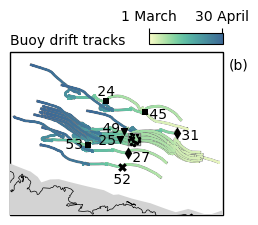

In [463]:

FS = 10

# create figure in NorthPolarStereo projection
#---------------------------------------------
map_projection = ccrs.NorthPolarStereo(central_longitude=205)
# lat_range = [71.25, 72.6]
# lon_range = [206, 211.5]

# lat_range = [71., 72.6]
# lon_range = [208.5, 214.1]

lat_range = [70.4, 73.1]
lon_range = [204.25, 216]
fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection),figsize=(2.75,2.75), facecolor='white')
plt.subplots_adjust(wspace=0.05, hspace=0)

# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.set_aspect('equal')
ax.spines['geo'].set_edgecolor('k')
ax.spines['geo'].set_linewidth(1)
ax.spines['geo'].set_linestyle('solid')
add_coast(ax, scale='10m', color='k', linewidth=0.5, alpha=1, zorder=10)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=9)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.2, zorder=10)



# ax.pcolormesh(lon_sic, lat_sic, ma.masked_where(mean_sic>100, mean_sic), 
#               vmin = 85, vmax = 100, cmap=icecmap, zorder=0, transform=ccrs.PlateCarree())

# March-April drift tracks
#-------------------------
for buoy in buoy_IDs:
    ax.plot(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)), 
                ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)),
               c='gray', lw=2, alpha=1, transform=ccrs.PlateCarree(), zorder=1)
    buoytrack = ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)), 
                ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)),
               c=days_since_TI, s=0.1, alpha=1,
               vmin=0, vmax=days_since_TI[-1], cmap=lightcmap, transform=ccrs.PlateCarree(), zorder=1)
    
# add_colorbar(fig, ax, [buoytrack], cb_placement='top', cb_orientation='auto', cb_width=0.03, 
#              cb_length_fraction=[0.1, 0.35], cb_pad=0.03, cb_ticks=[0,30,60], cb_ticklabels='auto', 
#              cb_extend='neither', cb_label='days from 1 March', labelpad=10, cb_label_placement='auto', 
#              cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])

add_colorbar(fig, ax, [buoytrack], cb_placement='top', cb_orientation='auto', cb_width=0.04, 
             cb_length_fraction=[0.65, 1], cb_pad=0.03, cb_ticks=[0,61], cb_ticklabels=['1 March', '30 April'], 
             cb_extend='neither', cb_label='', labelpad=10, cb_label_placement='auto', 
             cb_tick_placement='auto', cb_labelsize=FS, draw_edges=False, edge_params=['k', 2])
    
    
# look on specific date and find buoy pairs within 2 km of one another    
spec_date = datetime(2021, 3, 20, 0, 0)

for bb, buoy in enumerate(buoy_IDs):
    
    # horizontal alignments
    if buoy in ['49',]:
        VA = 'bottom'
        HA = 'right'
        Vpad = -0.075
    elif buoy in ['27',]:
        VA = 'center'
        HA = 'left'
        Vpad = -0.075
    elif buoy in ['24',]:
        VA = 'bottom'
        HA = 'center'
        Vpad = 0.05
    elif buoy in ['52',]:
        VA = 'top'
        HA = 'center'
        Vpad = -0.1
    elif buoy in ['31','45']:
        VA = 'center'
        HA = 'left'
        Vpad = -0.05
    else:
        VA = 'center'
        HA = 'right'
        Vpad = 0
        
    # which buoys to label (inner / outer network) 
    if marker_dict[buoy]['group'] in ['NW', 'SE', 'LF'] or buoy in ['25', '49']:
        LABEL = f' {buoy} '
        sd = 1#3 #buoy size multiplication
    else:
        LABEL = ''
        sd = 0.25#0.75 #buoy size multiplication   
        
    # plot point and label
    ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
               ds.latitude.sel(buoyID=buoy).sel(time=spec_date),
               marker = marker_dict[buoy]['shape'],
               facecolor='k', lw=0, alpha=1, s=sd*marker_dict[buoy]['size'], transform=ccrs.PlateCarree(), zorder=4)
    ax.text(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
            ds.latitude.sel(buoyID=buoy).sel(time=spec_date) + Vpad,
            LABEL,  horizontalalignment = HA, verticalalignment = VA, fontsize=FS, c= 'k',
            transform=ccrs.PlateCarree(), zorder=5)





#/////////////
# polygons //
#/////////////////////////////////////////////////////////////////////////////////////////////
# coast polygons
ds_mask = xr.open_dataset('./data/coast_mask_regions_v3.nc')
ds_mask.close()
polyR1 = wkt.loads(str(ds_mask.R1_poly_str.values))
polyR2 = wkt.loads(str(ds_mask.R2_poly_str.values))
coast_poly = wkt.loads(str(ds_mask.coast_poly_masked_str.values))
# ax.add_geometries([coast_poly], edgecolor='gold', linestyle='solid', facecolor='none',
#                   alpha=1, lw=2,  crs= ccrs.PlateCarree(), zorder=10)
ax.add_geometries([polyR1], edgecolor='None', facecolor='lightgray',alpha=1, crs= ccrs.PlateCarree(), zorder=3)
ax.add_geometries([polyR2], edgecolor='None', facecolor='lightgray',alpha=1, crs= ccrs.PlateCarree(), zorder=3)
#/////////////////////////////////////////////////////////////////////////////////////////////


# plot outline of mini region
# mini_extent = (218423.22999176796, 250962.8956463215, -2062180.1672572978, -2032075.9513266578)
mini_extent = (220691.81277358267, 245639.9620731582, -2062555.510366325, -2037263.1101553454)

ax.plot([mini_extent[0],mini_extent[0],mini_extent[1],mini_extent[1],mini_extent[0]], 
        [mini_extent[2],mini_extent[3],mini_extent[3],mini_extent[2],mini_extent[2]], 
        c='gray', lw=1, alpha=1, zorder=1)

print(f'\nmid_extent = {ax.get_extent()}\n')


# ~ 150 km diameter buoy array
#-----------------------------
ax.text(0, 1.05, 'Buoy drift tracks', fontsize=FS, weight='normal', 
        horizontalalignment='left', transform = ax.transAxes, zorder=100)



# label panel
ax.text(1.075, 0.925, '(b)', fontsize=FS, weight='normal', 
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, zorder=100)


# save image
#-----------
saveimage = './figures/KeyFigs/FigA/OverviewSICbuoy_MidSize_v3.png'
if saveimage != False:
    print(f'Saving image as >>> {saveimage}')
    fig.savefig(saveimage, transparent=False, bbox_inches="tight", pad_inches = 0.05, dpi=300)




mini_extent = (220691.81277358267, 245639.9620731582, -2062555.510366325, -2037263.1101553454)

Saving image as >>> ./figures/KeyFigs/FigA/OverviewSICbuoy_SmallSize_v3.png


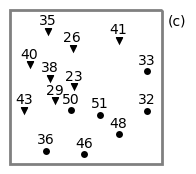

In [465]:

FS = 10

# create figure in NorthPolarStereo projection
#---------------------------------------------
map_projection = ccrs.NorthPolarStereo(central_longitude=205)

# lat_range = [71.585, 71.82]
# lon_range = [211.125, 211.95]

lat_range = [71.58, 71.78]
lon_range = [211.175, 211.8]
fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection),figsize=(2,2), facecolor='white')
plt.subplots_adjust(wspace=0.05, hspace=0)


# set map extent, add grid and geo features
#------------------------------------------
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
ax.set_aspect('equal')
ax.spines['geo'].set_edgecolor('gray')
ax.spines['geo'].set_linewidth(2)
add_coast(ax, scale='10m', color='k', linewidth=0.5, alpha=1, zorder=10)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=9)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.2, zorder=10)

# ax.pcolormesh(lon_sic, lat_sic, ma.masked_where(mean_sic>100, mean_sic), 
#               vmin = 85, vmax = 100, cmap=icecmap, zorder=0, transform=ccrs.PlateCarree())

# March-April drift tracks
#-------------------------
date_indices = (buoy_time>=datetime(2021, 3, 1, 12, 0))&(buoy_time<=datetime(2021, 4, 1, 23, 0))

# for buoy in buoy_IDs:
    
    
#     ax.plot(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)), 
#                 ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)),
#                c='lightgray', lw=3, transform=ccrs.PlateCarree(),zorder=3)
    
#     lon_interp, lat_interp, day_interp = interp_path(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)).values, 
#                                                  ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)).values, 
#                                                  days_since_TI, N=5)
    
#     ax.scatter(lon_interp,lat_interp,
#                c=day_interp, s=0.8, alpha=1,
#                vmin=0, vmax=days_since_TI[-1], cmap=lightcmap, transform=ccrs.PlateCarree(),zorder=3)
    
    
#     ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF)), 
#                 ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF)),
#                c=days_since_TI, s=1, alpha=1,
#                vmin=0, vmax=days_since_TI[-1], cmap=lightcmap, transform=ccrs.PlateCarree(),zorder=3)

    
# look on specific date and find buoy pairs within 2 km of one another    
spec_date = datetime(2021, 3, 20, 0, 0)

for bb, buoy in enumerate(buoy_IDs):
    
#     if buoy in ['35','50']:
#         VA = 'top'
#         pad = -0.007
#     else:
    VA = 'bottom'
    pad = +0.005
        
#     if marker_dict[buoy]['group'] in ['W']:
#         HA = 'right'
#     else:
#         HA = 'left'
        
    HA = 'center'
#     VA = 'bottom'
    
    # which buoys to label (inner / outer network) 
    if marker_dict[buoy]['group'] in ['NW', 'SE', 'LF'] or buoy in ['25', '49']:
        LABEL = ''
        sd = 1 #buoy size multiplication
    else:
        LABEL = f'{buoy}'
        sd = 1 #buoy size multiplication   
        
    # plot point and label
    ax.scatter(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
               ds.latitude.sel(buoyID=buoy).sel(time=spec_date),
               marker = marker_dict[buoy]['shape'],
               facecolor='k', edgecolor='k', lw=0, alpha=1, s=sd*marker_dict[buoy]['size'], 
               transform=ccrs.PlateCarree(), zorder=4)
    
    ax.text(ds.longitude.sel(buoyID=buoy).sel(time=spec_date),
            ds.latitude.sel(buoyID=buoy).sel(time=spec_date)+pad,
            LABEL, horizontalalignment = HA, verticalalignment = VA, fontsize=FS, c= 'k',
#             bbox=dict(facecolor='white', alpha=0.8,edgecolor='none', boxstyle='round,pad=0'),
            transform=ccrs.PlateCarree(), zorder=4)

        
print(f'\nmini_extent = {ax.get_extent()}\n')

# ~ 20 km diamter buoy array
#---------------------------
# ax.text(1, 1.05, '20 km buoy array', fontsize=FS, weight='normal', 
#         horizontalalignment='right', transform = ax.transAxes, zorder=100)


# label panel
ax.text(1.1, 0.925, '(c)', fontsize=FS, weight='normal', 
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, zorder=100)


# save image
#-----------
saveimage = './figures/KeyFigs/FigA/OverviewSICbuoy_SmallSize_v3.png'
if saveimage != False:
    print(f'Saving image as >>> {saveimage}')
    fig.savefig(saveimage, transparent=False, bbox_inches="tight", pad_inches = 0.05, dpi=300)



ice age:
 LinregressResult(slope=-0.07402597402597402, intercept=151.07792207792207, rvalue=-0.3732592530438426, pvalue=0.09559115739752438, stderr=0.04221015819647622, intercept_stderr=84.84280297548659)


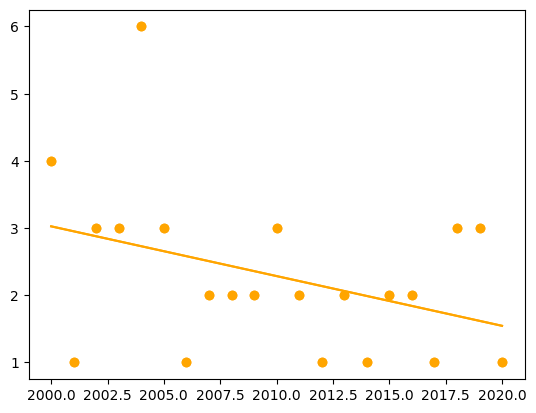

In [179]:
import scipy.stats

X1 = years
X2 = AGE[350,360]

result = scipy.stats.linregress(X1, X2)
print(f'ice age:\n', result)
plt.plot(X1, result.intercept + result.slope * X1, linestyle='solid', c='orange', label=f'R={result.rvalue:.3f}\np={result.pvalue:.5f}')
plt.scatter(X1, X2, c='orange')

plt.plot(X1, result.intercept + result.slope * X1, linestyle='solid', c='orange', label=f'R={result.rvalue:.3f}\np={result.pvalue:.5f}')
plt.scatter(X1, X2, c='orange')


In [180]:
age_intercept = np.zeros(AGE.shape[:2])
age_slope = np.zeros(AGE.shape[:2])
age_rvalue = np.zeros(AGE.shape[:2])
age_pvalue = np.zeros(AGE.shape[:2])

In [181]:
X1 = years

for ii in range(np.shape(AGE)[0]):
    for jj in range(np.shape(AGE)[1]):
        
        X2 = AGE[ii,jj,:]
        result = scipy.stats.linregress(X1, X2)
        
        age_intercept[ii,jj] = result.intercept
        age_slope[ii,jj] = result.slope
        age_rvalue[ii,jj] = result.rvalue
        age_pvalue[ii,jj] = result.pvalue
        
    

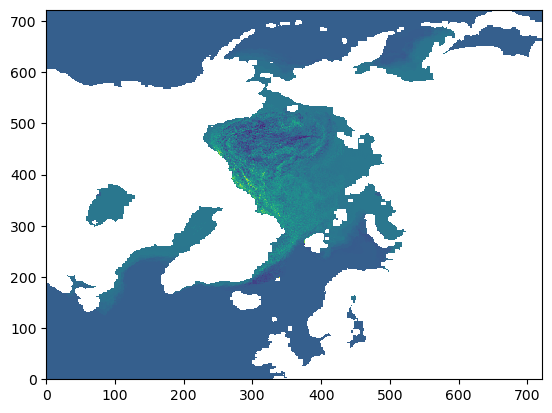

In [182]:
plt.pcolormesh(age_intercept + age_slope*2021)


In [87]:
# create custom cmap
# cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', ['royalblue', 'dodgerblue', 'mediumseagreen', 'gold', 'orange', 'indianred', 'crimson'])
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', ['royalblue', 'dodgerblue', 'mediumpurple',
                                                                    'crimson', 'indianred', 'orange', 'gold', ])
bounds = [0,30,60,90,120,150,180,210]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



In [77]:
days_since_TI 

Float64Index([                 0.0, 0.020833333333333332, 0.041666666666666664,
                            0.0625,  0.08333333333333333,  0.10416666666666667,
                             0.125,  0.14583333333333334,  0.16666666666666666,
                            0.1875,
              ...
                213.77083333333334,   213.79166666666666,             213.8125,
                213.83333333333334,   213.85416666666666,              213.875,
                213.89583333333334,   213.91666666666666,             213.9375,
                213.95833333333334],
             dtype='float64', length=10271)

In [ ]:
# create custom cmap
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', ['royalblue', 'dodgerblue', 'gold', 'orange', 'indianred', 'crimson', 'k'])
bounds = [0,30,60,90,120,150,180,210]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



[None]

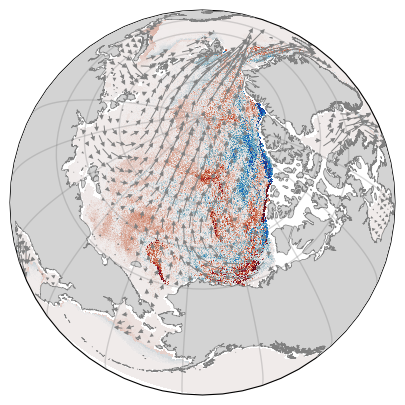

In [159]:
# map_projection = ccrs.NorthPolarStereo(central_longitude=205)
map_projection = ccrs.NearsidePerspective(central_longitude=205, 
                                          central_latitude=80, 
                                          satellite_height=2000000)
# map_projection = ccrs.Orthographic(central_longitude=205.0, central_latitude=80)

fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection),figsize=(5,5))
# ax.set_global()
# lat_range = [69, 80]
# lon_range = [195, 232]
# set map extent, add grid and geo features
#------------------------------------------
# ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())

add_coast(ax, scale='10m', color='gray', linewidth=0.5, alpha=1, zorder=6)
add_land(ax,  scale='50m', color='lightgray', alpha=1, fill_dateline_gap=True, zorder=5)
add_grid(ax, lats=np.arange(70,90,5), lons=np.arange(100,300,20), linewidth=1, color='gray', alpha=0.3, zorder=10)


MEAN_AGE = np.nanmean(AGE, axis=2)
MEDIAN_AGE = np.nanmedian(AGE, axis=2)

lightcmap = cmocean.tools.crop_by_percent(cmocean.cm.balance, 10, which='both', N=None)
ax.pcolormesh(lon, lat, 
              age - (age_intercept + age_slope*2021),
#               age - MEDIAN_AGE, 
              cmap=lightcmap, vmin=-5,vmax=5,
              transform = ccrs.PlateCarree(), zorder=0)


# //////////////////
# sea ice drift //
#/////////////////////////////////////////////////////////////////////////////////////////////
        
# open NSIDC-derived drift data
#------------------------------
ds_PPD = xr.open_dataset(Clim_PPD)
ds_PPD.close()
longrid_ice = ds_PPD.longitude.values
latgrid_ice = ds_PPD.latitude.values
u_ice = ds_PPD.u.values
v_ice = ds_PPD.v.values

# plot ice drift vectors
#-----------------------  
sp = 6
icevec = ax.quiver(longrid_ice[::sp,::sp], latgrid_ice[::sp,::sp], 
                   *fix_cartopy_vectors(u_ice[::sp,::sp], v_ice[::sp,::sp], latgrid_ice[::sp,::sp]),
                   color=[0.5,0.5,0.5], width=0.0025, headwidth=5, headlength=5, headaxislength=5,
                   scale=120, transform=ccrs.PlateCarree())
key = ax.quiverkey(icevec, X=0.425, Y=1.05, U=10, label = 'sea-ice drift\n10 $\mathrm{cm\;{s}^{-1}}$', labelpos='N', fontproperties={'size':FS}, transform=ccrs.PlateCarree())
key.set(zorder = 100)
#/////////////////////////////////////////////////////////////////////////////////////////////


# # msl contours
# #-------------
# CS = ax.contour(longrid_wind, latgrid_wind, msl_clim, levels = np.arange(1000,1060,1), 
#                 linewidths=1,
#                 colors='k', zorder=4, transform=ccrs.PlateCarree())

# # label contours with manual labels 
# x_labels = np.array([180,190,200,210,218,225,230])[1::2]
# y_labels = np.array([80,80,80,79,79,78,75])[1::2]
# Coords = map_projection.transform_points(ccrs.PlateCarree(), x_labels, y_labels)
# manual_points=[]
# for spot in Coords[:,0:2]:
#     manual_points.append((spot[0],spot[1]))
# ax.clabel(CS, CS.levels, inline=True, 
#           inline_spacing=15, 
#           fontsize=FS, manual=manual_points)

# # msl contour legend
# #-------------------
# ax.text(0.15, 1.1, 'sea level\npressure (hPa)', fontsize=FS, weight='normal', 
#             horizontalalignment='center', transform = ax.transAxes, zorder=100)
# ax.plot([0.05,0.25], [1.05,1.05], clip_on=False, c='k', lw = 1.2, transform = ax.transAxes, zorder=100)

            
    
# #//////////
# # buoys //
# #/////////////////////////////////////////////////////////////////////////////////////////////
# # March-April drift tracks
# #-------------------------
# lightcmap = cmocean.tools.crop_by_percent(cmocean.cm.matter, 35, which='max', N=None)
# lightcmap = cmocean.tools.crop_by_percent(lightcmap, 5, which='min', N=None)

# for buoy in ds.buoyID.values:
#     sp=5
#     ax.plot(ds.longitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp], 
#                ds.latitude.sel(buoyID=buoy).sel(time=slice(TI, TF))[::sp],
#                c='k', lw=0.5, transform=ccrs.PlateCarree(),zorder=15)
# #/////////////////////////////////////////////////////////////////////////////////////////////
    
    
# wide_extent = (-411742.0508941112,1076469.5717552726,-2335105.207607886,-997632.5192451527)

# ax.plot([wide_extent[0],wide_extent[0],wide_extent[1],wide_extent[1],wide_extent[0]], 
#         [wide_extent[2],wide_extent[3],wide_extent[3],wide_extent[2],wide_extent[2]], 
#         c='k', lw=2, alpha=1, transform = ccrs.NorthPolarStereo(central_longitude=205), zorder=3)

In [23]:
ice_ds

<xarray.Dataset>
Dimensions:         (x: 722, y: 722, time: 52)
Coordinates:
  * x               (x) float32 -4.518e+06 -4.506e+06 ... 4.506e+06 4.518e+06
  * y               (y) float32 -4.518e+06 -4.506e+06 ... 4.506e+06 4.518e+06
  * time            (time) datetime64[ns] 2021-01-01 2021-01-08 ... 2021-12-24
Data variables:
    crs             int32 ...
    age_of_sea_ice  (time, y, x) uint8 ...
    latitude        (y, x) float32 ...
    longitude       (y, x) float32 ...
Attributes:
    version:       4.1
    release_date:  May 2022
    Conventions:   CF-1.4
    dataset_doi:   10.5067/UTAV7490FEPB